<a href="https://colab.research.google.com/github/StarMindz/OS-Detection/blob/main/OS%20Detection%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  #Mount google drive to access the folder containing the datasets

try: # are we in Google Colab?
    from google.colab import drive
    drive.mount("/content/drive")
    dir = '/content/drive/My Drive' #working directory
except:
    pass

import os
try:
    os.makedirs(dir)
    print("Directory sucessfully made!")
except FileExistsError:
    print("Directory already exist!")
    pass

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Directory already exist!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import all necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the two datasets that are similar

In [ ]:
data_file_path1 = '/content/drive/MyDrive/os1.csv'
data_file_path2 = '/content/drive/MyDrive/os2.csv'

In [ ]:
data1 = pd.read_csv(data_file_path1)
data2 = pd.read_csv(data_file_path2)

## **Data Exploration**

We will concatenate both imported datasets as one dataset using common feature columns

In [ ]:
# Display the first 100 rows of a dataframe named data1
data1.head(100)

cert.alt  cert.altCnt cert.curve  \
0                                                 NaN          NaN        NaN   
1   ['login.live.com', 'loginnet.passport.com', 'm...         17.0        NaN   
2                                                 NaN          NaN        NaN   
3   ['login.live.com', 'loginnet.passport.com', 'm...         17.0        NaN   
4   ['wdcp.microsoft.com', 'spynet2.microsoft.com'...         20.0        NaN   
..                                                ...          ...        ...   
95                                                NaN          NaN        NaN   
96  ['*.telemetry.mozilla.org', 'telemetry.mozilla...          2.0        NaN   
97  ['*.telemetry.mozilla.org', 'telemetry.mozilla...          2.0        NaN   
98  ['*.telemetry.mozilla.org', 'telemetry.mozilla...          2.0        NaN   
99  ['*.big.telemetry.microsoft.com', '*.telemetry...          4.0        NaN   

                                            cert.hash  \
0   ['65:f7:ac:f3:8b:d8:09:37:81:a3:f5:80:b7:45:34...   
1   ['6c:dd:c8:d2:4e:b4:92:15:3f:af:76:5a:b0:77:a7...   
2   ['83:da:05:a9:88:6f:76:58:be:73:ac:f0:a4:93:0c...   
3   ['6c:dd:c8:d2:4e:b4:92:15:3f:af:76:5a:b0:77:a7...   
4   ['d2:e3:98:3b:f4:d9:29:05:d4:8b:1e:53:8b:05:24...   
..                                                ...   
95  ['bf:2e:ef:88:e0:c8:33:6e:13:80:7a:60:6e:af:03...   
96  ['1f:b8:6b:11:68:ec:74:31:54:06:2e:8c:9c:c5:b1...   
97  ['1f:b8:6b:11:68:ec:74:31:54:06:2e:8c:9c:c5:b1...   
98  ['1f:b8:6b:11:68:ec:74:31:54:06:2e:8c:9c:c5:b1...   
99  ['83:da:05:a9:88:6f:76:58:be:73:ac:f0:a4:93:0c...   

                                        cert.issuerCN  \
0   ['microsoft update secure server ca 2.1', 'mic...   
1   ['symantec class 3 ev ssl ca - g3', 'verisign ...   
2   ['microsoft root certificate authority 2011', ...   
3   ['symantec class 3 ev ssl ca - g3', 'verisign ...   
4   ['microsoft secure server ca 2011', 'microsoft...   
..                                                ...   
95  ['microsoft update secure server ca 2.1', 'mic...   
96  ['digicert global root ca', 'digicert sha2 sec...   
97  ['digicert global root ca', 'digicert sha2 sec...   
98  ['digicert global root ca', 'digicert sha2 sec...   
99  ['microsoft root certificate authority 2011', ...   

                                        cert.issuerON  \
0   ['Microsoft Corporation', 'Microsoft Corporati...   
1          ['Symantec Corporation', 'VeriSign, Inc.']   
2   ['Microsoft Corporation', 'Microsoft Corporati...   
3          ['Symantec Corporation', 'VeriSign, Inc.']   
4   ['Microsoft Corporation', 'Microsoft Corporati...   
..                                                ...   
95  ['Microsoft Corporation', 'Microsoft Corporati...   
96                   ['DigiCert Inc', 'DigiCert Inc']   
97                   ['DigiCert Inc', 'DigiCert Inc']   
98                   ['DigiCert Inc', 'DigiCert Inc']   
99  ['Microsoft Corporation', 'Microsoft Corporati...   

                                        cert.notAfter  \
0   ['2018-06-15T17:32:39.000Z', '2027-06-21T17:43...   
1   ['2017-11-20T23:59:59.000Z', '2023-10-30T23:59...   
2   ['2026-10-18T23:05:19.000Z', '2018-04-04T20:46...   
3   ['2017-11-20T23:59:59.000Z', '2023-10-30T23:59...   
4   ['2018-03-21T18:12:51.000Z', '2026-10-18T23:05...   
..                                                ...   
95  ['2018-06-15T17:32:39.000Z', '2027-06-21T17:43...   
96  ['2023-03-08T12:00:00.000Z', '2018-08-29T12:00...   
97  ['2023-03-08T12:00:00.000Z', '2018-08-29T12:00...   
98  ['2023-03-08T12:00:00.000Z', '2018-08-29T12:00...   
99  ['2026-10-18T23:05:19.000Z', '2018-03-21T18:12...   

                                       cert.notBefore  \
0   ['2017-06-15T17:32:39.000Z', '2012-06-21T17:33...   
1   ['2015-11-20T00:00:00.000Z', '2013-10-31T00:00...   
2   ['2011-10-18T22:55:19.000Z', '2017-01-04T20:46...   
3   ['2015-11-20T00:00:00.000Z', '2013-10-31T00:00...   
4   ['2016-12-21T18:12:51.000Z', '2011-10-18T22

In [ ]:
# Display the first 100 rows of a dataframe named data2
data2.head(100)

cert.alt  cert.altCnt cert.curve  \
0                  ['twitter.com', 'www.twitter.com']          2.0        NaN   
1                                                 NaN          NaN        NaN   
2                                                 NaN          NaN        NaN   
3                        ['*.twimg.com', 'twimg.com']          2.0        NaN   
4   ['*.google-analytics.com', 'app-measurement.co...          9.0        NaN   
..                                                ...          ...        ...   
95                                                NaN          NaN        NaN   
96                                                NaN          NaN        NaN   
97                                                NaN          NaN        NaN   
98                                                NaN          NaN        NaN   
99                                                NaN          NaN        NaN   

                                            cert.hash  \
0   ['ad:d5:3f:66:80:fe:66:e3:83:cb:ac:3e:60:92:2e...   
1                                                 NaN   
2                                                 NaN   
3   ['b6:3b:6a:86:05:0e:c7:ca:a7:53:90:80:17:46:33...   
4   ['ac:74:7d:b3:b4:ec:ec:85:2b:aa:23:72:a7:02:57...   
..                                                ...   
95                                                NaN   
96                                                NaN   
97                                                NaN   
98                                                NaN   
99                                                NaN   

                                        cert.issuerCN  \
0   ['symantec class 3 ev ssl ca - g3', 'verisign ...   
1                                                 NaN   
2                                                 NaN   
3   ['digicert sha2 high assurance server ca', 'di...   
4   ['google internet authority g2', 'geotrust glo...   
..                                                ...   
95                                                NaN   
96                                                NaN   
97                                                NaN   
98                                                NaN   
99                                                NaN   

                                 cert.issuerON  \
0   ['Symantec Corporation', 'VeriSign, Inc.']   
1                                          NaN   
2                                          NaN   
3             ['DigiCert Inc', 'DigiCert Inc']   
4   ['Google Inc', 'Equifax', 'GeoTrust Inc.']   
..                                         ...   
95                                         NaN   
96                                         NaN   
97                                         NaN   
98                                         NaN   
99                                         NaN   

                                        cert.notAfter  \
0   ['2016-05-09T23:59:59.000Z', '2023-10-30T23:59...   
1                                                 NaN   
2                                                 NaN   
3   ['2016-05-18T12:00:00.000Z', '2028-10-22T12:00...   
4   ['2015-11-24T00:00:00.000Z', '2018-08-21T04:00...   
..                                                ...   
95                                                NaN   
96                                                NaN   
97                                                NaN   
98                                                NaN   
99                                                NaN   

                                       cert.notBefore  \
0   ['2014-09-10T00:00:00.000Z', '2013-10-31T00:00...   
1                                                 NaN   
2                                                 NaN   
3   ['2015-05-01T00:00:00.000Z', '2013-10-22T12:00...   
4   ['2015-08-26T17:54:31.000Z', '2002-05-21T04:00...   
..                                                ...   
95               

In [ ]:
# Display summary of the structure and essential details of a data1
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32605 entries, 0 to 32604
Columns: 101 entries, cert.alt to uav
dtypes: float64(12), int64(26), object(63)
memory usage: 25.1+ MB


In [ ]:
# Display summary of the structure and essential details of a data2
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20334 entries, 0 to 20333
Data columns (total 96 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   cert.alt                                       9783 non-null   object 
 1   cert.altCnt                                    9783 non-null   float64
 2   cert.curve                                     2855 non-null   object 
 3   cert.hash                                      10563 non-null  object 
 4   cert.issuerCN                                  10563 non-null  object 
 5   cert.issuerON                                  10557 non-null  object 
 6   cert.notAfter                                  10563 non-null  object 
 7   cert.notBefore                                 10563 non-null  object 
 8   cert.publicAlgorithm                           10563 non-null  object 
 9   cert.remainingDays                             105

## **Concatenating common columns of the two datasets**

In [ ]:
# We need to first get the column names of each dataframe
columns_df1 = set(data1.columns)
columns_df2 = set(data2.columns)

In [ ]:
# Display columns of dataframe 1
columns_df1

{'cert.alt',
 'cert.altCnt',
 'cert.curve',
 'cert.hash',
 'cert.issuerCN',
 'cert.issuerON',
 'cert.notAfter',
 'cert.notBefore',
 'cert.publicAlgorithm',
 'cert.remainingDays',
 'cert.serial',
 'cert.subjectCN',
 'cert.subjectON',
 'cert.validDays',
 'certCnt',
 'client.bytes',
 'destination.bytes',
 'destination.ip',
 'destination.mac',
 'destination.packets',
 'destination.port',
 'dstDscp',
 'dstDscpCnt',
 'dstOui',
 'dstOuiCnt',
 'dstPayload8',
 'dstRIR',
 'firstPacket',
 'frame.time_epoch',
 'id',
 'initRTT',
 'ip.dsfield.dscp',
 'ip.dsfield.ecn',
 'ip.flags.df',
 'ip.flags.df.syn',
 'ip.id',
 'ip.len',
 'ip.len.syn',
 'ip.ttl',
 'ip.ttl.client2server',
 'ip.ttl.server2client',
 'ip.ttl.syn',
 'ipProtocol',
 'lastPacket',
 'length',
 'ln',
 'lv',
 'network.bytes',
 'network.community_id',
 'network.packets',
 'osa',
 'osf',
 'osn',
 'packet_directions',
 'protocol',
 'protocolCnt',
 'rootId',
 'server.bytes',
 'source.bytes',
 'source.ip',
 'source.packets',
 'source.port',
 'sr

In [ ]:
# Display columns of dataframe 2
columns_df2

{'cert.alt',
 'cert.altCnt',
 'cert.curve',
 'cert.hash',
 'cert.issuerCN',
 'cert.issuerON',
 'cert.notAfter',
 'cert.notBefore',
 'cert.publicAlgorithm',
 'cert.remainingDays',
 'cert.serial',
 'cert.subjectCN',
 'cert.subjectON',
 'cert.validDays',
 'certCnt',
 'client.bytes',
 'destination.bytes',
 'destination.ip',
 'destination.mac',
 'destination.packets',
 'destination.port',
 'dstOui',
 'dstOuiCnt',
 'dstPayload8',
 'dstRIR',
 'firstPacket',
 'frame.time_epoch',
 'id',
 'initRTT',
 'ip.dsfield.dscp',
 'ip.dsfield.ecn',
 'ip.flags.df',
 'ip.flags.df.syn',
 'ip.id',
 'ip.len',
 'ip.len.syn',
 'ip.ttl',
 'ip.ttl.client2server',
 'ip.ttl.server2client',
 'ip.ttl.syn',
 'ipProtocol',
 'lastPacket',
 'length',
 'ln',
 'lv',
 'network.bytes',
 'network.community_id',
 'network.packets',
 'osa',
 'osf',
 'osn',
 'osv',
 'packet_directions',
 'protocol',
 'protocolCnt',
 'rootId',
 'server.bytes',
 'source.bytes',
 'source.ip',
 'source.packets',
 'source.port',
 'srcOui',
 'srcOuiCnt'

In [ ]:
# Then, we need to find the common columns between the two datasets
# We do this by converting the column names of each dataset into sets and then finding the intersection of these sets.
common_columns = list(columns_df1.intersection(columns_df2))

In [ ]:
# Display common_columns
common_columns

['srcPayload8',
 'destination.ip',
 'osa',
 'uan',
 'tls.handshake.extensions_supported_group.ch',
 'destination.mac',
 'tcp.options.mss_val.syn',
 'tls.handshake.extension.len',
 'tls.record.version.ch',
 'source.packets',
 'dstOuiCnt',
 'network.bytes',
 'cert.notBefore',
 'tcp.window_size_value',
 'tls.handshake.ciphersuite.ch',
 'destination.bytes',
 'length',
 'destination.packets',
 'cert.remainingDays',
 'source.ip',
 'cert.subjectON',
 'tls.handshake.sig_hash_alg.ch',
 'tls.handshake.extensions_ec_point_format.sh',
 'tls.handshake.extensions_length',
 'tcp.flags',
 'destination.port',
 'totDataBytes',
 'tcp.options.timestamp.tsval',
 'cert.validDays',
 'cert.altCnt',
 'frame.time_epoch',
 'tls.handshake.type',
 'tls.handshake.extensions_ec_point_format.ch',
 'tls.handshake.extensions_alpn_str.sh',
 'cert.curve',
 'tls.handshake.version.ch',
 'protocolCnt',
 'ip.dsfield.ecn',
 'ip.ttl.client2server',
 'tls.handshake.extension.type',
 'tls.cipher',
 'cert.notAfter',
 'ip.len.syn'

The above code finds the common columns between two datasets; data1 and data2. The result is a list of column names that are present in both datasets and can be used as the basis for concatenating the datasets.

Before concatenating the datasets, we need to ensure that all common columns have the same data type. To check this, we will randomly pick the first item in dataset1 and dataset2 column 'firstPacket'

In [ ]:
# Check 'firstPacket' data type in data1
type(data1['firstPacket'][0])

numpy.float64

In [ ]:
# Check 'firstPacket' data type in data2
type(data2['firstPacket'][0])

numpy.int64

The above feature has a different data type for both datasets. This means that it will not be possible to concatenate both data types until we make them uniform.

In [ ]:
# We need to check for common columns in both datasets that have different data types. To do this, we will complete the following steps;
# Create a dictionary data1_dtypes to store the data types of each common column in data1
data1_dtypes = data1[common_columns].dtypes.to_dict()

# Create a dictionary data2_dtypes to store the data types of each common column in data2
data2_dtypes = data2[common_columns].dtypes.to_dict()

# Initialise an empty list to store the names of common columns with different data types
columns_with_different_datatypes = []

# Compare the data types of each common column in data1 and data2 and identify any column that have different data types
for column in common_columns:
    if data1_dtypes[column] != data2_dtypes[column]:
        columns_with_different_datatypes.append(column)

# Print the names of common columns in data1 and data2 with different data types
print("Common columns with different data types:", columns_with_different_datatypes)

Common columns with different data types: ['uan', 'lastPacket', 'certCnt', 'firstPacket', 'osn', 'tcp.options.wscale.shift.syn']


In [ ]:
# Check the data types of each common column in data1
data1_dtypes

{'srcPayload8': dtype('O'),
 'destination.ip': dtype('O'),
 'osa': dtype('float64'),
 'uan': dtype('float64'),
 'tls.handshake.extensions_supported_group.ch': dtype('O'),
 'destination.mac': dtype('O'),
 'tcp.options.mss_val.syn': dtype('int64'),
 'tls.handshake.extension.len': dtype('O'),
 'tls.record.version.ch': dtype('O'),
 'source.packets': dtype('int64'),
 'dstOuiCnt': dtype('int64'),
 'network.bytes': dtype('int64'),
 'cert.notBefore': dtype('O'),
 'tcp.window_size_value': dtype('O'),
 'tls.handshake.ciphersuite.ch': dtype('O'),
 'destination.bytes': dtype('int64'),
 'length': dtype('int64'),
 'destination.packets': dtype('int64'),
 'cert.remainingDays': dtype('O'),
 'source.ip': dtype('O'),
 'cert.subjectON': dtype('O'),
 'tls.handshake.sig_hash_alg.ch': dtype('O'),
 'tls.handshake.extensions_ec_point_format.sh': dtype('O'),
 'tls.handshake.extensions_length': dtype('O'),
 'tcp.flags': dtype('O'),
 'destination.port': dtype('int64'),
 'totDataBytes': dtype('int64'),
 'tcp.optio

In [ ]:
# Check the data types of each common column in data2
data2_dtypes

{'srcPayload8': dtype('O'),
 'destination.ip': dtype('O'),
 'osa': dtype('float64'),
 'uan': dtype('O'),
 'tls.handshake.extensions_supported_group.ch': dtype('O'),
 'destination.mac': dtype('O'),
 'tcp.options.mss_val.syn': dtype('int64'),
 'tls.handshake.extension.len': dtype('O'),
 'tls.record.version.ch': dtype('O'),
 'source.packets': dtype('int64'),
 'dstOuiCnt': dtype('int64'),
 'network.bytes': dtype('int64'),
 'cert.notBefore': dtype('O'),
 'tcp.window_size_value': dtype('O'),
 'tls.handshake.ciphersuite.ch': dtype('O'),
 'destination.bytes': dtype('int64'),
 'length': dtype('int64'),
 'destination.packets': dtype('int64'),
 'cert.remainingDays': dtype('O'),
 'source.ip': dtype('O'),
 'cert.subjectON': dtype('O'),
 'tls.handshake.sig_hash_alg.ch': dtype('O'),
 'tls.handshake.extensions_ec_point_format.sh': dtype('O'),
 'tls.handshake.extensions_length': dtype('O'),
 'tcp.flags': dtype('O'),
 'destination.port': dtype('int64'),
 'totDataBytes': dtype('int64'),
 'tcp.options.tim

From the above, we can see that some common columns in the different datasets have different data types. We need a unified datatype for effective concatenating. So, we will be making the following adjustments to the columns to ensure data compatibility before concatenating the datasets.
1. 'uan' should be dropped since it is completely empty in data1
2. 'certCnt' should be float type for both datasets
3. 'osn' should be dropped since it is completely empty in data2
4. 'firstPacket' should be float type for both datasets
5. 'lastPacket' should be float type for both datasets
6. 'tcp.options.wscale.shift.syn' should be float type for both datasets

In [ ]:
# Remove 'uan' and 'osn' columns from both datasets
data1.drop('uan', axis=1, inplace=True)
data2.drop('uan', axis=1, inplace=True)
data1.drop('osn', axis=1, inplace=True)
data2.drop('osn', axis=1, inplace=True)

# Convert columns to the desired data types
data1['tcp.options.wscale.shift.syn'] = data1['tcp.options.wscale.shift.syn'].astype(float)
data1['certCnt'] = data1['certCnt'].astype(float)
data2['firstPacket'] = data2['firstPacket'].astype(float)
data2['lastPacket'] = data2['lastPacket'].astype(float)
data2['tcp.options.wscale.shift.syn'] = data2['tcp.options.wscale.shift.syn'].astype(float)

We dropped both 'uan' and 'osn' features because they are empty in one of the datasets, and they cannot be concatenated since they might not produce the desired results.

We chose float as the data type to be used for 'certCnt,' 'firstPacket,' 'lastPacket' and 'tcp.options.wscale.shift.syn' because float can represent a wider range of values, including fractions and numbers with decimal points, and they are suitable for situations where precision is important. Precision is important to ensure that the stored values remain accurate and consistent. Else, choosing a data type such as using an integer can lead to loss of information, as rounding of decimals inappropriately can affect the accuracy of calculations and analyses.

In [ ]:
# Remove 'uan' and 'osn' columns from common_columns
for item in ['osn', 'uan']:
  common_columns.remove(item)

In [ ]:
# Update data1 and data2 with the newly identified common columns and overwrite both datasets
data1 = data1[common_columns]
data2 = data2[common_columns]

In [ ]:
# Now that we have common columns in both datasets, we can concatenate the datasets based on the common columns
merged_data = pd.concat([data1, data2], ignore_index=True)

In [ ]:
# Display the first few rows of a dataframe named merged_data
merged_data.head()

srcPayload8  destination.ip   osa  \
0  16030300b8010000  134.170.115.55   NaN   
1  16030300ba010000   131.253.61.80  64.0   
2  16030300cb010000   13.78.188.147  64.0   
3  16030300ba010000   131.253.61.80  64.0   
4  16030300be010000   13.82.187.188  64.0   

  tls.handshake.extensions_supported_group.ch    destination.mac  \
0                        ['0x0017', '0x0018']  00:c1:b1:14:eb:31   
1                        ['0x0017', '0x0018']  00:c1:b1:14:eb:31   
2                        ['0x0017', '0x0018']  00:c1:b1:14:eb:31   
3                        ['0x0017', '0x0018']  00:c1:b1:14:eb:31   
4                        ['0x0017', '0x0018']  00:c1:b1:14:eb:31   

   tcp.options.mss_val.syn                        tls.handshake.extension.len  \
0                     1460  [[''], [''], [''], ['1', '29', '5', '6', '2', ...   
1                     1460  [[''], [''], [''], ['19', '5', '6', '2', '20',...   
2                     1460  [[''], [''], [''], ['36', '5', '6', '2', '20',...   
3                     1460  [[''], [''], [''], ['19', '5', '6', '2', '20',...   
4                     1460  [[''], [''], [''], ['23', '5', '6', '2', '20',...   

  tls.record.version.ch  source.packets  dstOuiCnt  ...  source.port  \
0               TLS 1.2              10          1  ...        49176   
1               TLS 1.2              15          1  ...        49434   
2               TLS 1.2              17          1  ...        49442   
3               TLS 1.2              15          1  ...        49443   
4               TLS 1.2              11          1  ...        49444   

                                     ip.dsfield.dscp network.packets  \
0  ['0', '0', '0', '0', '0', '0', '0', '0', '0', ...              20   
1  ['0', '0', '0', '0', '0', '0', '0', '0', '0', ...              30   
2  ['0', '0', '0', '0', '0', '0', '0', '0', '0', ...              31   
3  ['0', '0', '0', '0', '0', '0', '0', '0', '0', ...              30   
4  ['0', '0', '0', '0', '0', '0', '0', '0', '0', ...              19   

             network.community_id  \
0  1:ORoOOut9DIQyatVts6ivpQiGZWQ=   
1  1:X7P6NyZaMg55pP4ASzEPM0qkRoA=   
2  1:8qaSfAX8NoR7nvGZYwgyle9ZrCY=   
3  1:VIwy3DDH210MRzScqApbWG7Yp7s=   
4  1:TnfqZ2jsHlKQOfrB6vKywn3K9L0=   

                                            cert.alt  ipProtocol  \
0                                                NaN           6   
1  ['login.live.com', 'loginnet.passport.com', 'm...           6   
2                                                NaN           6   
3  ['login.live.com', 'loginnet.passport.com', 'm...           6   
4  ['wdcp.microsoft.com', 'spynet2.microsoft.com'...           6   

                           tls.ja3s uav tcp.options.wscale.shift.syn  \
0  a70303593a393dfd863b76d9da6c3ace NaN                          8.0   
1  15381d64ba148f31a70eb87b53085230 NaN                          8.0   
2  d26ba888ffd53c3914cfbd00cf174690 NaN                          8.0   
3  15381d64ba148f31a70eb87b53085230 NaN                          8.0   
4  649d6810e8392f63dc311eecb6b7098b NaN                          8.0   

                                               ip.id  
0  ['0x7499', '0x1059', '0x749a', '0x749b', '0x10...  
1  ['0x12f7', '0x1259', '0x12f8', '0x12f9', '0x12...  
2  ['0x0676', '0x0fa2', '0x0677', '0x0678', '0x0f...  
3  ['0x1308', '0x5dd7', '0x1309', '0x130a', '0x5d...  
4  ['0x64d8', '0x13d4', '0x64d9', '0x64da', '0x13...  

[5 rows x 93 columns]

In [ ]:
# Let us check for the lengths of data1, data2 and confirm that merged_data has the accurate length sum of both datasets
print("Length of data1:", len(data1))
print("Length of data2:", len(data2))
print("Length of merged_data:", len(merged_data))

Length of data1: 32605
Length of data2: 20334
Length of merged_data: 52939


In [ ]:
# Overwrite data saving it as merged_data
data = merged_data.copy()

## **Filtering columns: Selecting only columns containing "tls," "tcp," "ttl," and "ip"**

On advise from industry expert, all features except "tls," "tcp," "ttl," and "ip" were dropped because these four are the features by which the operating system can have an impact.

In [ ]:
# Initialise an empty list to store the filtered columns containing "tls," "tcp," "ttl," or "ip"
filtered_Columns = []

# We look through the columns in data and check if it contains "tls," "tcp," "ttl," or "ip." If yes, store the column into filtered_Columns, else skip
for fc in data.columns:
    if "tls" in fc or "tcp" in fc or "ttl" in fc or "ip" in fc:
        filtered_Columns.append(fc)

# Print filtered_Columns that have "tls," "tcp," "ttl," or "ip"
print(filtered_Columns)

# Print the length of filtered_Columns
print(len(filtered_Columns))

['destination.ip', 'tls.handshake.extensions_supported_group.ch', 'tcp.options.mss_val.syn', 'tls.handshake.extension.len', 'tls.record.version.ch', 'tcp.window_size_value', 'tls.handshake.ciphersuite.ch', 'source.ip', 'tls.handshake.sig_hash_alg.ch', 'tls.handshake.extensions_ec_point_format.sh', 'tls.handshake.extensions_length', 'tcp.flags', 'tcp.options.timestamp.tsval', 'tls.handshake.type', 'tls.handshake.extensions_ec_point_format.ch', 'tls.handshake.extensions_alpn_str.sh', 'tls.handshake.version.ch', 'ip.dsfield.ecn', 'ip.ttl.client2server', 'tls.handshake.extension.type', 'tls.cipher', 'ip.len.syn', 'tls.handshake.version.sh', 'tls.ja3sCnt', 'tcp.window_size_value.syn', 'tls.handshake.extensions.supported_version.ch', 'tcp.offset', 'tls.ja3', 'ip.ttl.server2client', 'tcp.options.sack_perm.syn', 'tcp.options.syn', 'tls.handshake.extensions_alpn_str.ch', 'ip.flags.df', 'ip.len', 'ip.ttl', 'ip.ttl.syn', 'ip.flags.df.syn', 'ip.dsfield.dscp', 'ipProtocol', 'tls.ja3s', 'tcp.options

We need to add our target variable "osf" that will be predicted to the filtered columns

In [ ]:
# Only using the filtered columns and adding our target prediction column
filtered_Columns.append("osf")

# Overwrite data to have only filtered columns
data = data[filtered_Columns]

# Display summary of the structure and essential details of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52939 entries, 0 to 52938
Data columns (total 43 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   destination.ip                                 52939 non-null  object 
 1   tls.handshake.extensions_supported_group.ch    52939 non-null  object 
 2   tcp.options.mss_val.syn                        52939 non-null  int64  
 3   tls.handshake.extension.len                    52939 non-null  object 
 4   tls.record.version.ch                          52939 non-null  object 
 5   tcp.window_size_value                          52939 non-null  object 
 6   tls.handshake.ciphersuite.ch                   52939 non-null  object 
 7   source.ip                                      52939 non-null  object 
 8   tls.handshake.sig_hash_alg.ch                  52939 non-null  object 
 9   tls.handshake.extensions_ec_point_format.sh    529

In [ ]:
# Display summary of descriptive statistics for each numerical column in data
data.describe()

tcp.options.mss_val.syn    ip.len.syn  tls.ja3sCnt  \
count                  52939.0  52939.000000      52939.0   
mean                    1460.0     55.067228          1.0   
std                        0.0      4.400730          0.0   
min                     1460.0     48.000000          1.0   
25%                     1460.0     52.000000          1.0   
50%                     1460.0     52.000000          1.0   
75%                     1460.0     60.000000          1.0   
max                     1460.0     64.000000          1.0   

       tcp.window_size_value.syn  \
count               52939.000000   
mean                26178.640775   
std                 22721.266704   
min                  8192.000000   
25%                  8192.000000   
50%                  8192.000000   
75%                 29200.000000   
max                 65535.000000   

       tls.handshake.extensions.supported_version.ch  \
count                                            0.0   
mean                                             NaN   
std                                              NaN   
min                                              NaN   
25%                                              NaN   
50%                                              NaN   
75%                                              NaN   
max                                              NaN   

       tcp.options.sack_perm.syn    ip.ttl.syn  ip.flags.df.syn  ipProtocol  \
count                    52939.0  52939.000000          52939.0     52939.0   
mean                         1.0    106.285045              1.0         6.0   
std                          0.0     30.302396              0.0         0.0   
min                          1.0     64.000000              1.0         6.0   
25%                          1.0     64.000000              1.0         6.0   
50%                          1.0    128.000000              1.0         6.0   
75%                          1.0    128.000000              1.0         6.0   
max                          1.0    128.000000              1.0         6.0   

       tcp.options.wscale.shift.syn  
count                  52938.000000  
mean                       7.061978  
std                        1.718950  
min                        1.000000  
25%                        7.000000  
50%                        8.000000  
75%                        8.000000  
max                        8.000000

## **Data Cleaning**

Identify the categorical and numerical features

In [ ]:
# Select columns with categorical data types
categorical_features = data.select_dtypes(include=['object', 'category'])

# Select columns with numerical data types
numerical_features = data.select_dtypes(include=['int', 'float'])

In [ ]:
# Display the first few rows of numerical_features
numerical_features.head()

tcp.options.mss_val.syn  ip.len.syn  tls.ja3sCnt  \
0                     1460          52            1   
1                     1460          52            1   
2                     1460          52            1   
3                     1460          52            1   
4                     1460          52            1   

   tcp.window_size_value.syn  tls.handshake.extensions.supported_version.ch  \
0                       8192                                            NaN   
1                       8192                                            NaN   
2                       8192                                            NaN   
3                       8192                                            NaN   
4                       8192                                            NaN   

   tcp.options.sack_perm.syn  ip.ttl.syn  ip.flags.df.syn  ipProtocol  \
0                          1         128                1           6   
1                          1         128                1           6   
2                          1         128                1           6   
3                          1         128                1           6   
4                          1         128                1           6   

   tcp.options.wscale.shift.syn  
0                           8.0  
1                           8.0  
2                           8.0  
3                           8.0  
4                           8.0

In [ ]:
# Display the first few rows of categorical_features
categorical_features.head()

destination.ip tls.handshake.extensions_supported_group.ch  \
0  134.170.115.55                        ['0x0017', '0x0018']   
1   131.253.61.80                        ['0x0017', '0x0018']   
2   13.78.188.147                        ['0x0017', '0x0018']   
3   131.253.61.80                        ['0x0017', '0x0018']   
4   13.82.187.188                        ['0x0017', '0x0018']   

                         tls.handshake.extension.len tls.record.version.ch  \
0  [[''], [''], [''], ['1', '29', '5', '6', '2', ...               TLS 1.2   
1  [[''], [''], [''], ['19', '5', '6', '2', '20',...               TLS 1.2   
2  [[''], [''], [''], ['36', '5', '6', '2', '20',...               TLS 1.2   
3  [[''], [''], [''], ['19', '5', '6', '2', '20',...               TLS 1.2   
4  [[''], [''], [''], ['23', '5', '6', '2', '20',...               TLS 1.2   

                               tcp.window_size_value  \
0  ['8192', '8192', '256', '256', '256', '256', '...   
1  ['8192', '8192', '256', '256', '256', '256', '...   
2  ['8192', '8192', '258', '258', '513', '513', '...   
3  ['8192', '8192', '256', '256', '256', '256', '...   
4  ['8192', '8192', '258', '258', '513', '513', '...   

                        tls.handshake.ciphersuite.ch      source.ip  \
0  ['0xc028', '0x009f', '0x009e', '0x009d', '0x00...   192.168.10.5   
1  ['0xc030', '0xc02f', '0xc028', '0xc027', '0xc0...  192.168.10.14   
2  ['0xc030', '0xc02f', '0xc028', '0xc027', '0xc0...  192.168.10.14   
3  ['0xc030', '0xc02f', '0xc028', '0xc027', '0xc0...  192.168.10.14   
4  ['0xc030', '0xc02f', '0xc028', '0xc027', '0xc0...  192.168.10.14   

                       tls.handshake.sig_hash_alg.ch  \
0  ['0x0601', '0x0603', '0x0401', '0x0501', '0x02...   
1  ['0x0401', '0x0501', '0x0201', '0x0403', '0x05...   
2  ['0x0401', '0x0501', '0x0201', '0x0403', '0x05...   
3  ['0x0401', '0x0501', '0x0201', '0x0403', '0x05...   
4  ['0x0401', '0x0501', '0x0201', '0x0403', '0x05...   

  tls.handshake.extensions_ec_point_format.sh  \
0                                        ['']   
1                                        ['']   
2                                        ['']   
3                                        ['']   
4                                        ['']   

                     tls.handshake.extensions_length  ...  \
0  ['', '', '', '91', '', '', '', '5', '', '', ''...  ...   
1  ['', '', '', '85', '', '', '', '', '13', '', '...  ...   
2  ['', '', '', '102', '', '', '13', '', '', '', ...  ...   
3  ['', '', '', '85', '', '', '', '', '13', '', '...  ...   
4  ['', '', '', '89', '', '', '9', '', '', '', ''...  ...   

                                ip.ttl.server2client  \
0  ['', '112', '', '', '112', '112', '', '112', '...   
1  ['', '114', '', '', '114', '114', '114', '', '...   
2  ['', '107', '', '', '107', '107', '107', '', '...   
3  ['', '115', '', '', '115', '115', '115', '', '...   
4  ['', '109', '', '', '109', '109', '109', '', '...   

                             tcp.options.syn  \
0  ['mss', 'nop', 'ws', 'nop', 'nop', 'sok']   
1  ['mss', 'nop', 'ws', 'nop', 'nop', 'sok']   
2  ['mss', 'nop', 'ws', 'nop', 'nop', 'sok']   
3  ['mss', 'nop', 'ws', 'nop', 'nop', 'sok']   
4  ['mss', 'nop', 'ws', 'nop', 'nop', 'sok']   

  tls.handshake.extensions_alpn_str.ch  \
0                                 ['']   
1                                 ['']   
2                                 ['']   
3                                 ['']   
4                                 ['']   

                                         ip.flags.df  \
0  ['1', '1', '1', '1', '1', '1', '1', '1', '1', ...   
1  ['1', '1', '1', '1', '1', '1', '1', '1', '1', ...   
2  ['1', '1', '1', '1', '1', '1', '1', '1', '1', ...   
3  ['1', '1', '1', '1', '1', '1', '1', '1', '1', ...   
4  ['1', '1', '1', '1', '1', '1', '1', '1', '1', ...   

                                              ip.len  \
0  ['52', '52', '40', '229', '40', '2960', '40', ...   
1  ['52', '52', '40', '231', '1500', '1500', '150...

In [ ]:
# Display the first few rows of data
data.head()

destination.ip tls.handshake.extensions_supported_group.ch  \
0  134.170.115.55                        ['0x0017', '0x0018']   
1   131.253.61.80                        ['0x0017', '0x0018']   
2   13.78.188.147                        ['0x0017', '0x0018']   
3   131.253.61.80                        ['0x0017', '0x0018']   
4   13.82.187.188                        ['0x0017', '0x0018']   

   tcp.options.mss_val.syn                        tls.handshake.extension.len  \
0                     1460  [[''], [''], [''], ['1', '29', '5', '6', '2', ...   
1                     1460  [[''], [''], [''], ['19', '5', '6', '2', '20',...   
2                     1460  [[''], [''], [''], ['36', '5', '6', '2', '20',...   
3                     1460  [[''], [''], [''], ['19', '5', '6', '2', '20',...   
4                     1460  [[''], [''], [''], ['23', '5', '6', '2', '20',...   

  tls.record.version.ch                              tcp.window_size_value  \
0               TLS 1.2  ['8192', '8192', '256', '256', '256', '256', '...   
1               TLS 1.2  ['8192', '8192', '256', '256', '256', '256', '...   
2               TLS 1.2  ['8192', '8192', '258', '258', '513', '513', '...   
3               TLS 1.2  ['8192', '8192', '256', '256', '256', '256', '...   
4               TLS 1.2  ['8192', '8192', '258', '258', '513', '513', '...   

                        tls.handshake.ciphersuite.ch      source.ip  \
0  ['0xc028', '0x009f', '0x009e', '0x009d', '0x00...   192.168.10.5   
1  ['0xc030', '0xc02f', '0xc028', '0xc027', '0xc0...  192.168.10.14   
2  ['0xc030', '0xc02f', '0xc028', '0xc027', '0xc0...  192.168.10.14   
3  ['0xc030', '0xc02f', '0xc028', '0xc027', '0xc0...  192.168.10.14   
4  ['0xc030', '0xc02f', '0xc028', '0xc027', '0xc0...  192.168.10.14   

                       tls.handshake.sig_hash_alg.ch  \
0  ['0x0601', '0x0603', '0x0401', '0x0501', '0x02...   
1  ['0x0401', '0x0501', '0x0201', '0x0403', '0x05...   
2  ['0x0401', '0x0501', '0x0201', '0x0403', '0x05...   
3  ['0x0401', '0x0501', '0x0201', '0x0403', '0x05...   
4  ['0x0401', '0x0501', '0x0201', '0x0403', '0x05...   

  tls.handshake.extensions_ec_point_format.sh  ...  \
0                                        ['']  ...   
1                                        ['']  ...   
2                                        ['']  ...   
3                                        ['']  ...   
4                                        ['']  ...   

                                              ip.len  \
0  ['52', '52', '40', '229', '40', '2960', '40', ...   
1  ['52', '52', '40', '231', '1500', '1500', '150...   
2  ['52', '52', '40', '248', '1500', '1500', '825...   
3  ['52', '52', '40', '231', '1500', '1500', '150...   
4  ['52', '52', '40', '235', '1500', '1500', '136...   

                                              ip.ttl ip.ttl.syn  \
0  ['128', '112', '128', '128', '112', '112', '12...        128   
1  ['128', '114', '128', '128', '114', '114', '11...        128   
2  ['128', '107', '128', '128', '107', '107', '10...        128   
3  ['128', '115', '128', '128', '115', '115', '11...        128   
4  ['128', '109', '128', '128', '109', '109', '10...        128   

  ip.flags.df.syn                                    ip.dsfield.dscp  \
0               1  ['0', '0', '0', '0', '0', '0', '0', '0', '0', ...   
1               1  ['0', '0', '0', '0', '0', '0', '0', '0', '0', ...   
2               1  ['0', '0', '0', '0', '0', '0', '0', '0', '0', ...   
3               1  ['0', '0', '0', '0', '0', '0', '0', '0', '0', ...   
4               1  ['0', '0', '0', '0', '0', '0', '0', '0', '0', ...   

  ipProtocol                          tls.ja3s tcp.options.wscale.shift.syn  \
0          6  a70303593a393dfd863b76d9da6c3ace                          8.0   
1          6  15381d64ba148f31a70eb87b53085230                          8.0   
2          6  d26ba888ffd53c3914cfbd00cf174690                          8.0   
3          6  15381d64ba148f31a70eb87b53085230                          8.0   

Calculate and visualise the percentage of null values in each column. This is to provide insights on the sparsity of the data, or the amount of missing information in the dataset.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the percentage of null values in each column
null_percentages = (data.isnull().sum() / len(data)) * 100

# Print percentage of null values in each column
print(null_percentages)

# Create a bar plot to visualise the percentage of null values
#plt.figure(figsize=(10, 6))
#sns.barplot(x=null_percentages.index, y=null_percentages.values, color='blue')
#plt.xticks(rotation=90)
#plt.xlabel('Columns')
#plt.ylabel('Percentage of Null Values')
#plt.title('Percentage of Null Values in Each Column')
#plt.tight_layout()
#plt.show()

destination.ip                                     0.000000
tls.handshake.extensions_supported_group.ch        0.000000
tcp.options.mss_val.syn                            0.000000
tls.handshake.extension.len                        0.000000
tls.record.version.ch                              0.000000
tcp.window_size_value                              0.000000
tls.handshake.ciphersuite.ch                       0.000000
source.ip                                          0.000000
tls.handshake.sig_hash_alg.ch                      0.000000
tls.handshake.extensions_ec_point_format.sh        0.028334
tls.handshake.extensions_length                    0.000000
tcp.flags                                          0.000000
tcp.options.timestamp.tsval                        0.000000
tls.handshake.type                                 0.000000
tls.handshake.extensions_ec_point_format.ch        0.000000
tls.handshake.extensions_alpn_str.sh              56.294981
tls.handshake.version.ch                

From the above, it is seen that only two features have a significant amount of null values; 'tls.handshake.extensions.supported_version.ch' with 100% null values and 'tls.handshake.extensions_alpn_str.sh' with over 50% null values.

In [ ]:
# Check for columns with more than 50% missing values
missing_columns = null_percentages[null_percentages > 50].index.tolist()

# Print missing columns with more than 50% missing values
print(missing_columns)

# Print length of missing columns with more than 50% missing values
print(len(missing_columns))
for item in missing_columns:
  print(item)

['tls.handshake.extensions_alpn_str.sh', 'tls.handshake.extensions.supported_version.ch']
2
tls.handshake.extensions_alpn_str.sh
tls.handshake.extensions.supported_version.ch


To make an informed decision on which column to drop and keep, more domain understanding of these missing column features is needed.

tls.handshake.extensions.supported_version.ch: This feature represents the supported TLS versions during the handshake process. This extension indicates the TLS protocol versions that the client supports. The server can then use this information to select the highest mutually supported TLS protocol version for the ongoing communication. This feature is entirely empty as it has 100% null values, so it has to be dropped to ensure it does not introduce bias or noise.

tls.handshake.extensions_alpn_str.sh: This feature represents the Application-Layer Protocol Negotiation (ALPN) extension negotiated during the ServerHello phase of the TLS handshake. ALPN determines the application protocol to be used over the secure connection. Different operating systems might support different application protocols. We will keep this feature since it has a workable amount of non-null values; there may be available data that is sufficient for meaningful analysis or modeling.

In [ ]:
# Remove 'tls.handshake.extensions_alpn_str.sh' from missing columns list since we are keeping it

missing_columns.remove('tls.handshake.extensions_alpn_str.sh')

In [ ]:
# Print length of updated missing columns with more than 50% missing values
print(len(missing_columns))

# Check the missing column data
data[missing_columns]

1


tls.handshake.extensions.supported_version.ch
0                                                NaN
1                                                NaN
2                                                NaN
3                                                NaN
4                                                NaN
...                                              ...
52934                                            NaN
52935                                            NaN
52936                                            NaN
52937                                            NaN
52938                                            NaN

[52939 rows x 1 columns]

As seen above, all the values in this column are NaN. Now, we drop the missing values because there is no useful information that can be gotten from it.

In [ ]:
# Drop missing columns that has no useful information
data.drop(columns=missing_columns, inplace=True)

We check for duplicate rows to ensure there are none, and remove them if any to avoid noise and bias

In [ ]:
# Check for duplicates rows
duplicates = data.duplicated()

# Count the number of duplicates
num_duplicates = sum(duplicates)

# Print the number of duplicates
print("Number of duplicates:", num_duplicates)

# Remove duplicates and create a new dataframe without duplicates
data_no_duplicates = data.drop_duplicates()

# Print the number of rows before and after removing duplicates
print("Number of rows before removing duplicates:", len(data))
print("Number of rows after removing duplicates:", len(data_no_duplicates))

Number of duplicates: 392
Number of rows before removing duplicates: 52939
Number of rows after removing duplicates: 52547


In [ ]:
# Overwrite data saving it as data_no_duplicates
data = data_no_duplicates.copy()

In [ ]:
# Display the first few rows of data
data.head()

destination.ip tls.handshake.extensions_supported_group.ch  \
0  134.170.115.55                        ['0x0017', '0x0018']   
1   131.253.61.80                        ['0x0017', '0x0018']   
2   13.78.188.147                        ['0x0017', '0x0018']   
3   131.253.61.80                        ['0x0017', '0x0018']   
4   13.82.187.188                        ['0x0017', '0x0018']   

   tcp.options.mss_val.syn                        tls.handshake.extension.len  \
0                     1460  [[''], [''], [''], ['1', '29', '5', '6', '2', ...   
1                     1460  [[''], [''], [''], ['19', '5', '6', '2', '20',...   
2                     1460  [[''], [''], [''], ['36', '5', '6', '2', '20',...   
3                     1460  [[''], [''], [''], ['19', '5', '6', '2', '20',...   
4                     1460  [[''], [''], [''], ['23', '5', '6', '2', '20',...   

  tls.record.version.ch                              tcp.window_size_value  \
0               TLS 1.2  ['8192', '8192', '256', '256', '256', '256', '...   
1               TLS 1.2  ['8192', '8192', '256', '256', '256', '256', '...   
2               TLS 1.2  ['8192', '8192', '258', '258', '513', '513', '...   
3               TLS 1.2  ['8192', '8192', '256', '256', '256', '256', '...   
4               TLS 1.2  ['8192', '8192', '258', '258', '513', '513', '...   

                        tls.handshake.ciphersuite.ch      source.ip  \
0  ['0xc028', '0x009f', '0x009e', '0x009d', '0x00...   192.168.10.5   
1  ['0xc030', '0xc02f', '0xc028', '0xc027', '0xc0...  192.168.10.14   
2  ['0xc030', '0xc02f', '0xc028', '0xc027', '0xc0...  192.168.10.14   
3  ['0xc030', '0xc02f', '0xc028', '0xc027', '0xc0...  192.168.10.14   
4  ['0xc030', '0xc02f', '0xc028', '0xc027', '0xc0...  192.168.10.14   

                       tls.handshake.sig_hash_alg.ch  \
0  ['0x0601', '0x0603', '0x0401', '0x0501', '0x02...   
1  ['0x0401', '0x0501', '0x0201', '0x0403', '0x05...   
2  ['0x0401', '0x0501', '0x0201', '0x0403', '0x05...   
3  ['0x0401', '0x0501', '0x0201', '0x0403', '0x05...   
4  ['0x0401', '0x0501', '0x0201', '0x0403', '0x05...   

  tls.handshake.extensions_ec_point_format.sh  ...  \
0                                        ['']  ...   
1                                        ['']  ...   
2                                        ['']  ...   
3                                        ['']  ...   
4                                        ['']  ...   

                                              ip.len  \
0  ['52', '52', '40', '229', '40', '2960', '40', ...   
1  ['52', '52', '40', '231', '1500', '1500', '150...   
2  ['52', '52', '40', '248', '1500', '1500', '825...   
3  ['52', '52', '40', '231', '1500', '1500', '150...   
4  ['52', '52', '40', '235', '1500', '1500', '136...   

                                              ip.ttl ip.ttl.syn  \
0  ['128', '112', '128', '128', '112', '112', '12...        128   
1  ['128', '114', '128', '128', '114', '114', '11...        128   
2  ['128', '107', '128', '128', '107', '107', '10...        128   
3  ['128', '115', '128', '128', '115', '115', '11...        128   
4  ['128', '109', '128', '128', '109', '109', '10...        128   

  ip.flags.df.syn                                    ip.dsfield.dscp  \
0               1  ['0', '0', '0', '0', '0', '0', '0', '0', '0', ...   
1               1  ['0', '0', '0', '0', '0', '0', '0', '0', '0', ...   
2               1  ['0', '0', '0', '0', '0', '0', '0', '0', '0', ...   
3               1  ['0', '0', '0', '0', '0', '0', '0', '0', '0', ...   
4               1  ['0', '0', '0', '0', '0', '0', '0', '0', '0', ...   

  ipProtocol                          tls.ja3s tcp.options.wscale.shift.syn  \
0          6  a70303593a393dfd863b76d9da6c3ace                          8.0   
1          6  15381d64ba148f31a70eb87b53085230                          8.0   
2          6  d26ba888ffd53c3914cfbd00cf174690                          8.0   
3          6  15381d64ba148f31a70eb87b53085230                          8.0   

In [ ]:
# Display summary of the structure and essential details of data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52547 entries, 0 to 52938
Data columns (total 42 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   destination.ip                               52547 non-null  object 
 1   tls.handshake.extensions_supported_group.ch  52547 non-null  object 
 2   tcp.options.mss_val.syn                      52547 non-null  int64  
 3   tls.handshake.extension.len                  52547 non-null  object 
 4   tls.record.version.ch                        52547 non-null  object 
 5   tcp.window_size_value                        52547 non-null  object 
 6   tls.handshake.ciphersuite.ch                 52547 non-null  object 
 7   source.ip                                    52547 non-null  object 
 8   tls.handshake.sig_hash_alg.ch                52547 non-null  object 
 9   tls.handshake.extensions_ec_point_format.sh  52532 non-null  object 
 10

From the above, it can be seen that some columns are less than the merged data **52939**. The reason is because there are null values in the column and they will be addressed when we impute missing values.

## **Feature Engineering**


We will generate some important additional features based on the features we currently have in our dataset. Based on the literature reviewed, these new features will be generated from 'tcp.flags' feature.

TCP flags (also known as TCP control bits) within network traffic can provide valuable information that might contribute to detecting the operating system in use. As seen in some literature reviewed, there are 6 flag bits in the TCP header indicating the “purpose” of a segment. One or more of them can be turned on at the same time. The presence and frequency of specific TCP flags (SYN, ACK, FIN, URG, PSH and RST) in the traffic can help differentiate between different operating systems. This can be done by carrying out flag combinations; tcp flag ratios.
Manipulation of TCP flags by generating **tcp flag ratio** features has been a focal point in many OS identification because the specific presence and frequency of TCP flags in network traffic offer distinct behavioral signatures for different operating systems; different operating systems may set TCP flags differently based on their behavior. For example, specific flag combinations during the TCP handshake might be indicative of certain OS types. Combining various flag values (e.g., SYN, ACK, RST) in different ways can contribute to our feature set.

These patterns act as fingerprints, providing quantitative insights into how each OS' network stack operates. When integrated as features in machine learning models, these ratios enable the detection of OS-specific behavior, enhancing accuracy by capturing unique network communication traits and complementing other features.

In [ ]:
# Calculate tcp flag ratios based on flag distributions
tcp_flags = ['FIN', 'SYN', 'RST', 'PSH', 'ACK', 'URG']

for flag in tcp_flags:
    data[f'tcp_flag_{flag.lower()}_ratio'] = data['tcp.flags'].apply(lambda x: x.count(flag)) / len(data)

In [ ]:
# Display the first few rows of data to check tcp flag ratios
data.head()

destination.ip tls.handshake.extensions_supported_group.ch  \
0  134.170.115.55                        ['0x0017', '0x0018']   
1   131.253.61.80                        ['0x0017', '0x0018']   
2   13.78.188.147                        ['0x0017', '0x0018']   
3   131.253.61.80                        ['0x0017', '0x0018']   
4   13.82.187.188                        ['0x0017', '0x0018']   

   tcp.options.mss_val.syn                        tls.handshake.extension.len  \
0                     1460  [[''], [''], [''], ['1', '29', '5', '6', '2', ...   
1                     1460  [[''], [''], [''], ['19', '5', '6', '2', '20',...   
2                     1460  [[''], [''], [''], ['36', '5', '6', '2', '20',...   
3                     1460  [[''], [''], [''], ['19', '5', '6', '2', '20',...   
4                     1460  [[''], [''], [''], ['23', '5', '6', '2', '20',...   

  tls.record.version.ch                              tcp.window_size_value  \
0               TLS 1.2  ['8192', '8192', '256', '256', '256', '256', '...   
1               TLS 1.2  ['8192', '8192', '256', '256', '256', '256', '...   
2               TLS 1.2  ['8192', '8192', '258', '258', '513', '513', '...   
3               TLS 1.2  ['8192', '8192', '256', '256', '256', '256', '...   
4               TLS 1.2  ['8192', '8192', '258', '258', '513', '513', '...   

                        tls.handshake.ciphersuite.ch      source.ip  \
0  ['0xc028', '0x009f', '0x009e', '0x009d', '0x00...   192.168.10.5   
1  ['0xc030', '0xc02f', '0xc028', '0xc027', '0xc0...  192.168.10.14   
2  ['0xc030', '0xc02f', '0xc028', '0xc027', '0xc0...  192.168.10.14   
3  ['0xc030', '0xc02f', '0xc028', '0xc027', '0xc0...  192.168.10.14   
4  ['0xc030', '0xc02f', '0xc028', '0xc027', '0xc0...  192.168.10.14   

                       tls.handshake.sig_hash_alg.ch  \
0  ['0x0601', '0x0603', '0x0401', '0x0501', '0x02...   
1  ['0x0401', '0x0501', '0x0201', '0x0403', '0x05...   
2  ['0x0401', '0x0501', '0x0201', '0x0403', '0x05...   
3  ['0x0401', '0x0501', '0x0201', '0x0403', '0x05...   
4  ['0x0401', '0x0501', '0x0201', '0x0403', '0x05...   

  tls.handshake.extensions_ec_point_format.sh  ...  \
0                                        ['']  ...   
1                                        ['']  ...   
2                                        ['']  ...   
3                                        ['']  ...   
4                                        ['']  ...   

                           tls.ja3s tcp.options.wscale.shift.syn  \
0  a70303593a393dfd863b76d9da6c3ace                          8.0   
1  15381d64ba148f31a70eb87b53085230                          8.0   
2  d26ba888ffd53c3914cfbd00cf174690                          8.0   
3  15381d64ba148f31a70eb87b53085230                          8.0   
4  649d6810e8392f63dc311eecb6b7098b                          8.0   

                                               ip.id      osf  \
0  ['0x7499', '0x1059', '0x749a', '0x749b', '0x10...  windows   
1  ['0x12f7', '0x1259', '0x12f8', '0x12f9', '0x12...  windows   
2  ['0x0676', '0x0fa2', '0x0677', '0x0678', '0x0f...  windows   
3  ['0x1308', '0x5dd7', '0x1309', '0x130a', '0x5d...  windows   
4  ['0x64d8', '0x13d4', '0x64d9', '0x64da', '0x13...  windows   

  tcp_flag_fin_ratio tcp_flag_syn_ratio tcp_flag_rst_ratio tcp_flag_psh_ratio  \
0           0.000000           0.000038           0.000019           0.000190   
1           0.000038           0.000038           0.000000           0.000152   
2           0.000038           0.000038           0.000000           0.000381   
3           0.000038           0.000038           0.000000           0.000152   
4           0.000038           0.000038           0.000000           0.000133   

  tcp_flag_ack_ratio tcp_flag_urg_ratio  
0           0.000362                0.0  
1           0.000552                0.0  
2           0.000571                0.0  
3           0.000552                0.0  
4           0.000343                0.0  

[5 rows x 48 columns]

## **Train Test Split**

In [ ]:
# Separate the features (X) from the target variable (y), where 'osf' is the column name of the target variable
X = data.drop(['osf'], axis=1)
y = data['osf']

# Now, X contains all the features (input data) and y contains the labels (output data)

In [ ]:
from sklearn.model_selection import train_test_split

# We split the data into training and testing sets; 80% for training and 20% for testing as common practice
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# The 'test_size' parameter determines the proportion of data to be used for testing; in this case, we chose 20%
# The 'random_state' parameter ensures reproducibility of the split

## **Data Visualisation**

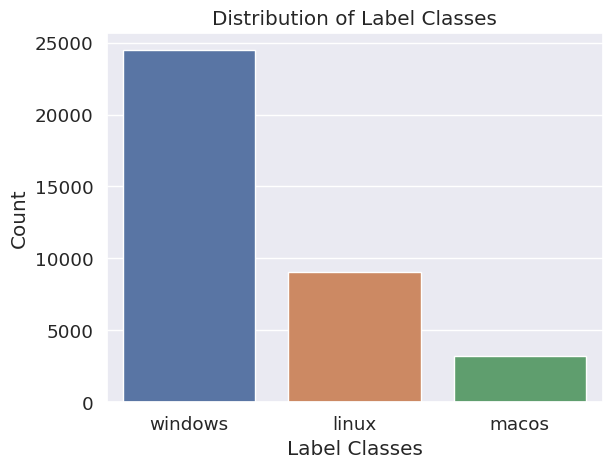

In [ ]:
# Count the occurrences of each label class
label_counts = y_train.value_counts()

# Create a bar plot
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.xlabel('Label Classes')
plt.ylabel('Count')
plt.title('Distribution of Label Classes')
plt.show()

Based on the plot above, we can see that the data is imbalanced. We will need to carryout resampling later before model training to prevent overfitting towards the majority class.

In [ ]:
# Identify categorical and numerical feature names
categorical_features = list(X_train.select_dtypes(include=['object', 'category']).columns)
numerical_features = list(X_train.select_dtypes(include=['int', 'float']).columns)

print(numerical_features)
print('\n')
print(categorical_features)

['tcp.options.mss_val.syn', 'ip.len.syn', 'tls.ja3sCnt', 'tcp.window_size_value.syn', 'tcp.options.sack_perm.syn', 'ip.ttl.syn', 'ip.flags.df.syn', 'ipProtocol', 'tcp.options.wscale.shift.syn', 'tcp_flag_fin_ratio', 'tcp_flag_syn_ratio', 'tcp_flag_rst_ratio', 'tcp_flag_psh_ratio', 'tcp_flag_ack_ratio', 'tcp_flag_urg_ratio']


['destination.ip', 'tls.handshake.extensions_supported_group.ch', 'tls.handshake.extension.len', 'tls.record.version.ch', 'tcp.window_size_value', 'tls.handshake.ciphersuite.ch', 'source.ip', 'tls.handshake.sig_hash_alg.ch', 'tls.handshake.extensions_ec_point_format.sh', 'tls.handshake.extensions_length', 'tcp.flags', 'tcp.options.timestamp.tsval', 'tls.handshake.type', 'tls.handshake.extensions_ec_point_format.ch', 'tls.handshake.extensions_alpn_str.sh', 'tls.handshake.version.ch', 'ip.dsfield.ecn', 'ip.ttl.client2server', 'tls.handshake.extension.type', 'tls.cipher', 'tls.handshake.version.sh', 'tcp.offset', 'tls.ja3', 'ip.ttl.server2client', 'tcp.options.syn', 

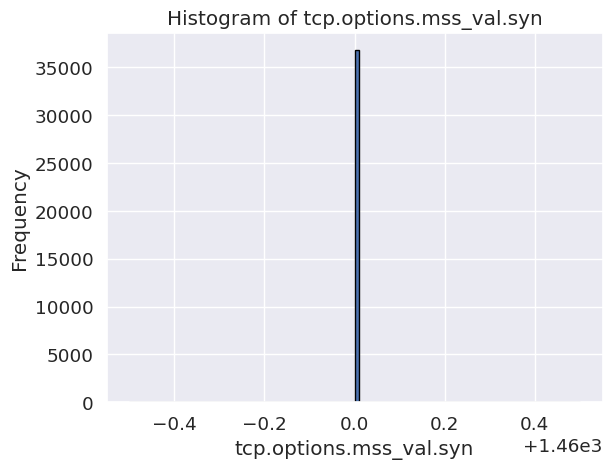

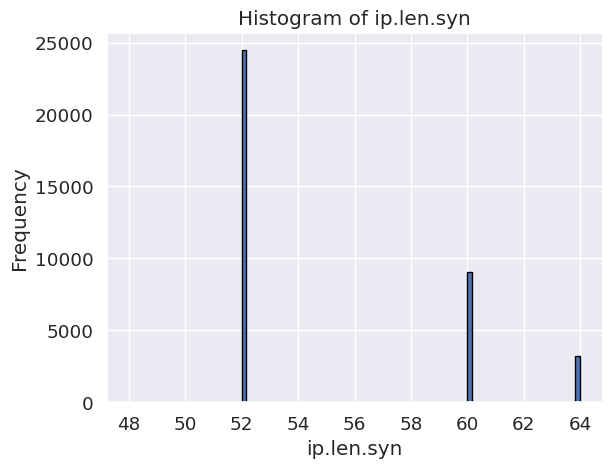

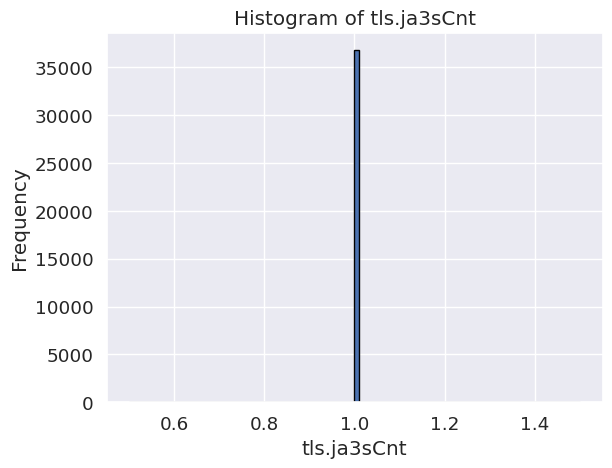

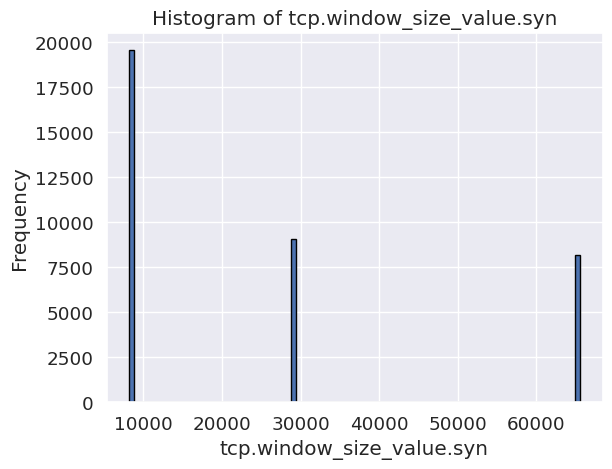

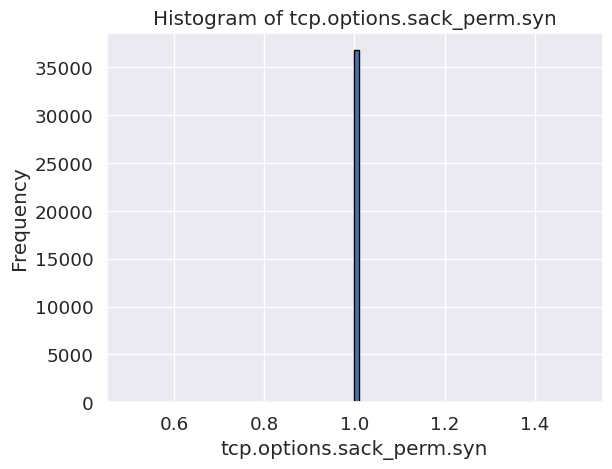

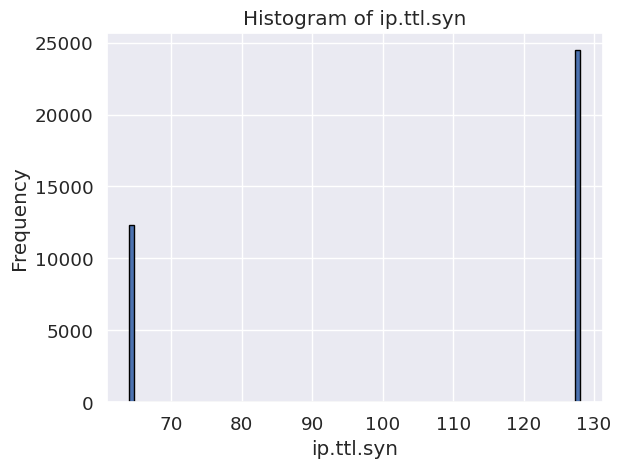

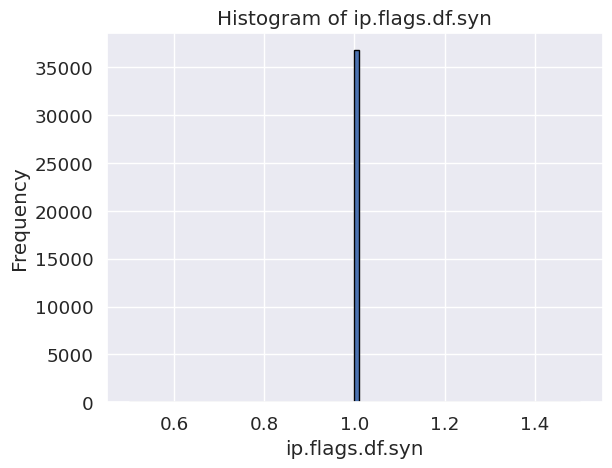

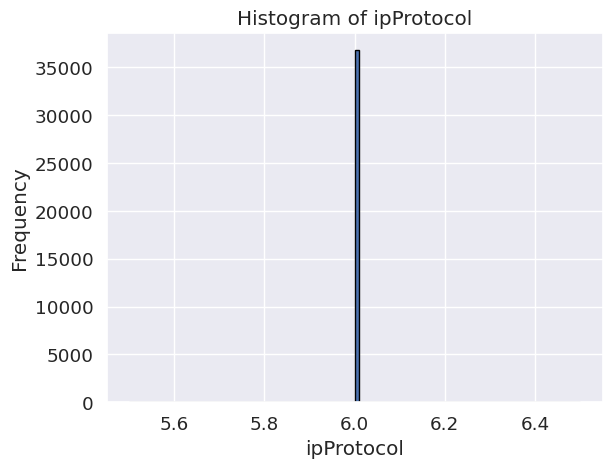

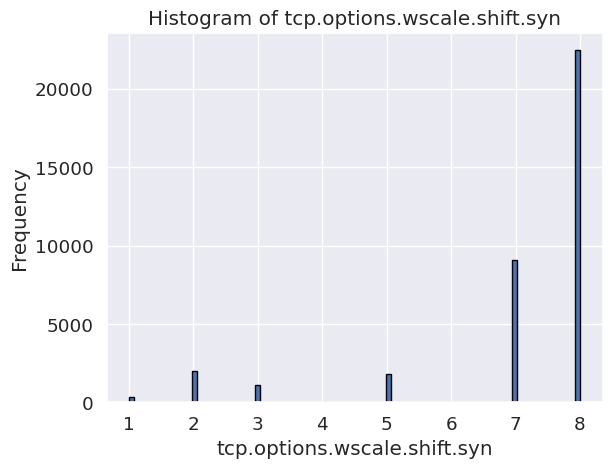

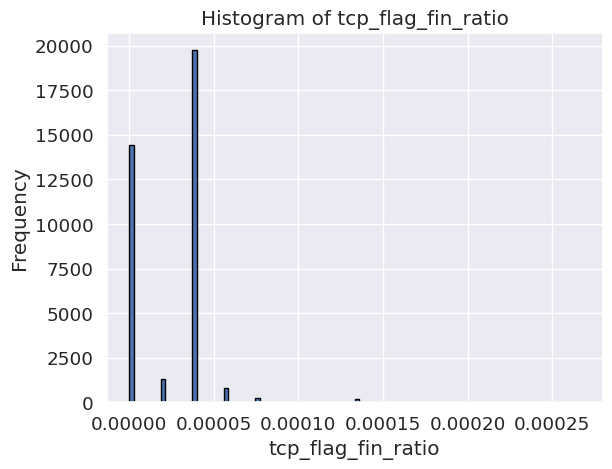

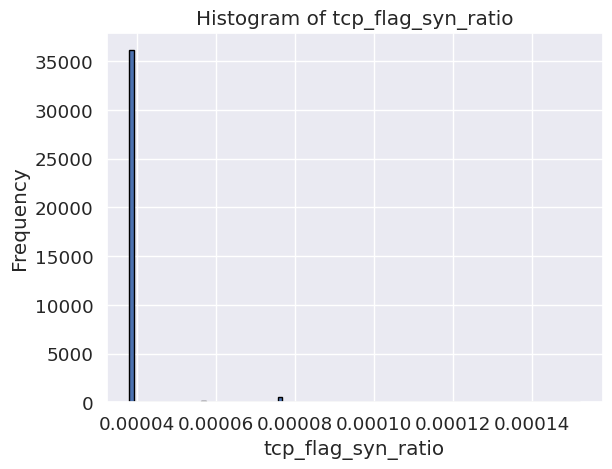

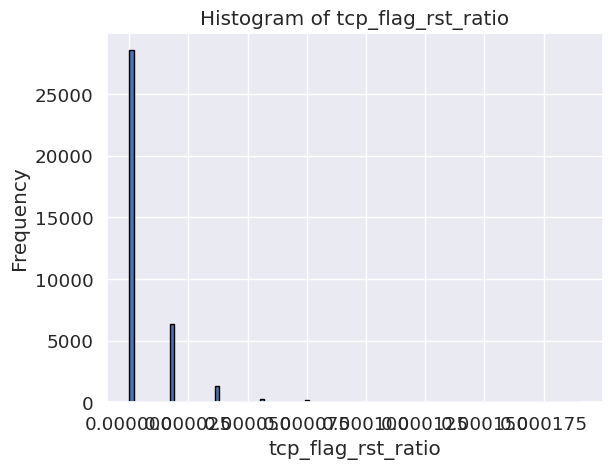

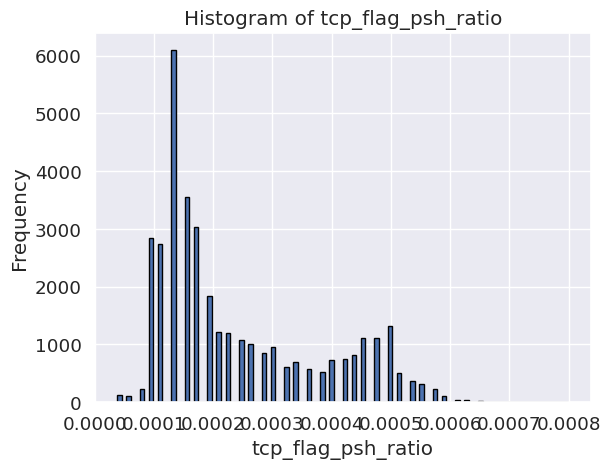

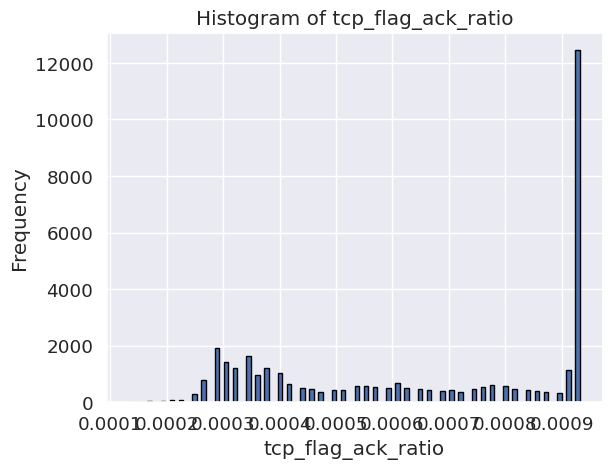

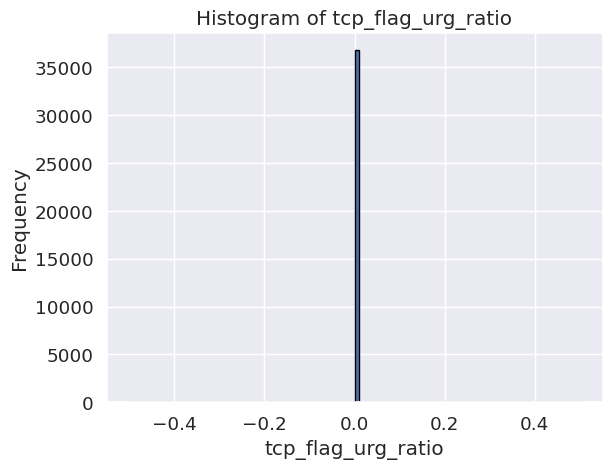

In [ ]:
# Create a histogram for each numerical feature to view the patterns and scales
for feature in numerical_features:
    plt.hist(X_train[feature], bins=100, edgecolor='black')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {feature}')
    plt.show()

From the histograms above, we can observe that the features have different scales. Some features like 'tcp_flag_ack_ratio' have a very small scale when compared to other features like 'tcp.window_size_value.syn' which have larger scale. Therefore, there is need for standardisation (feature scaling) to transform the features into a common scale. This will be done later before model training.

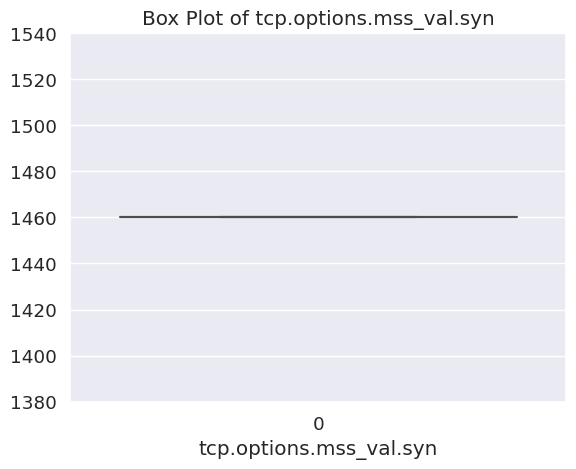

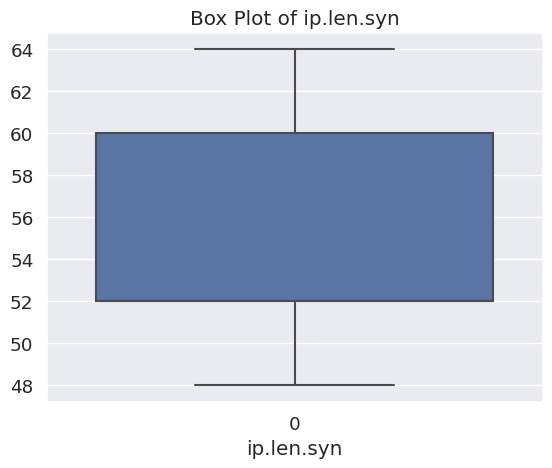

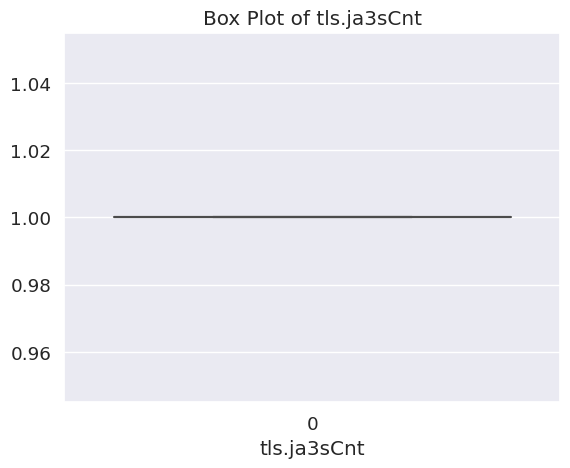

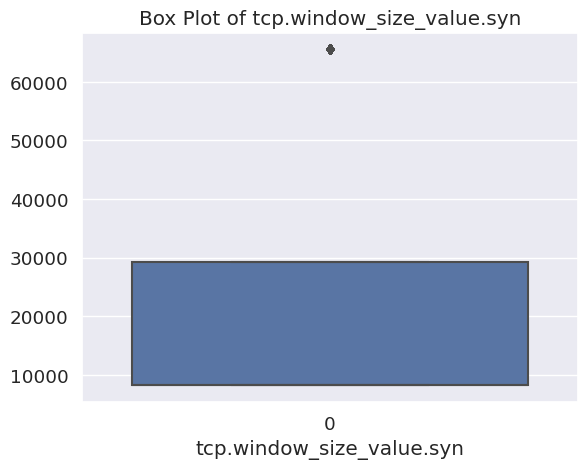

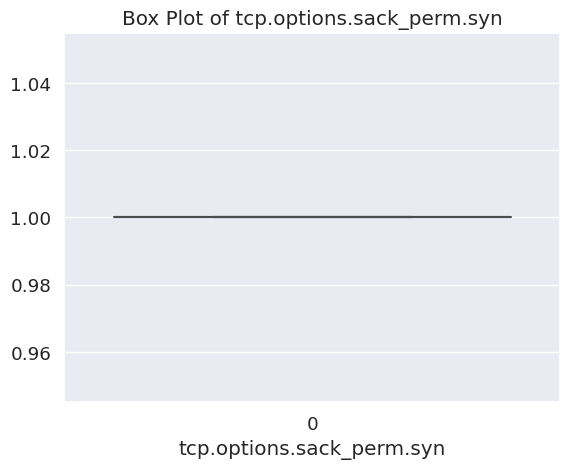

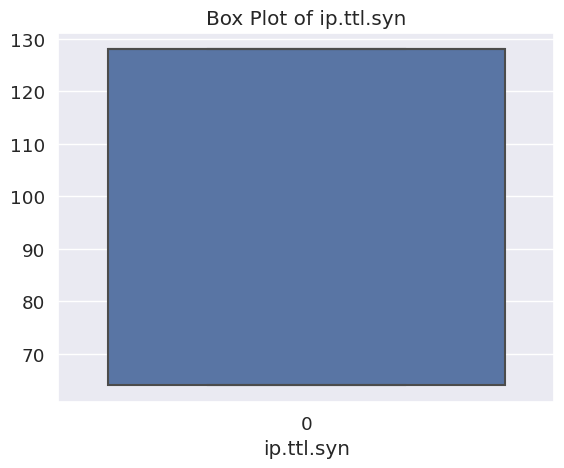

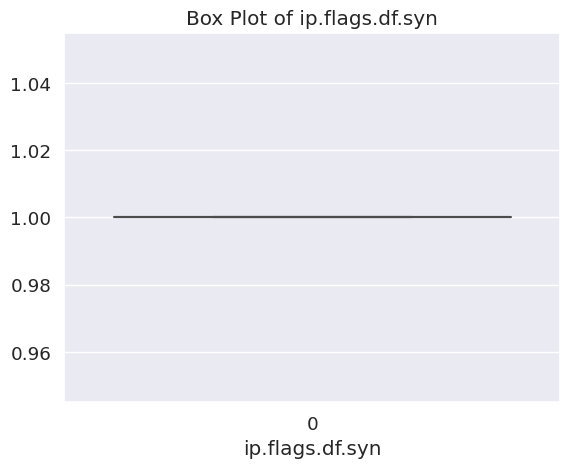

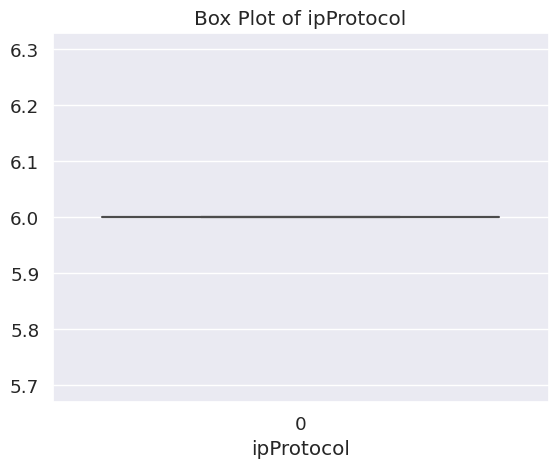

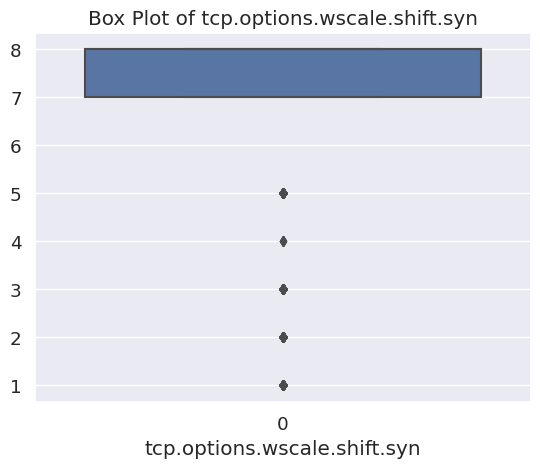

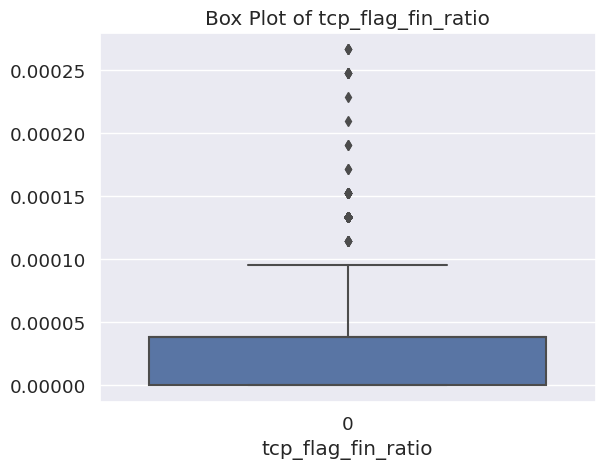

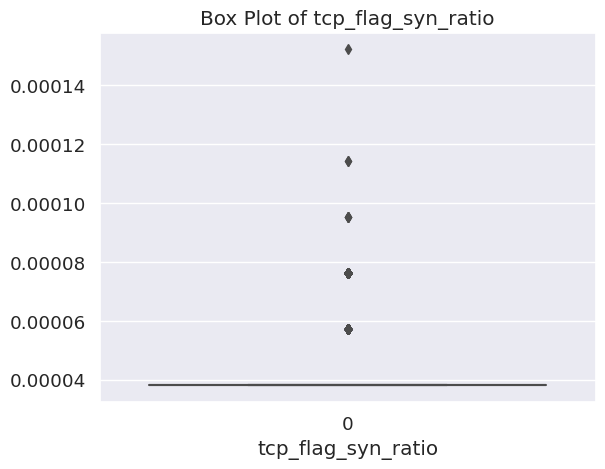

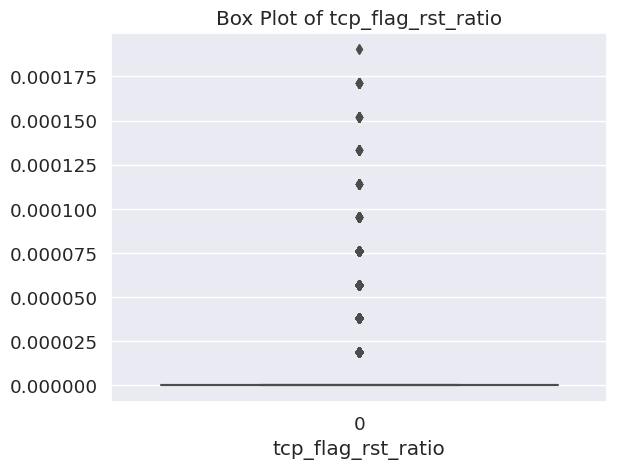

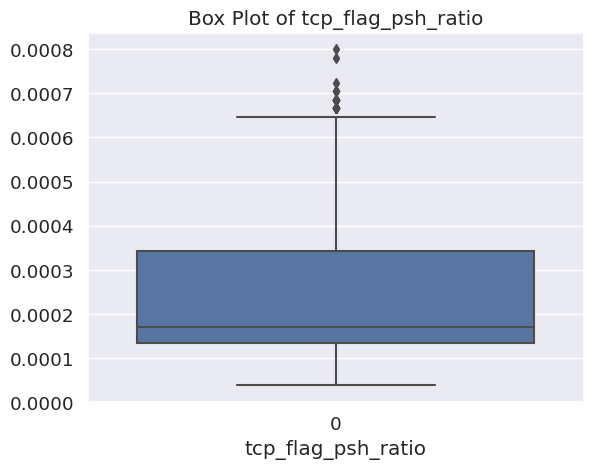

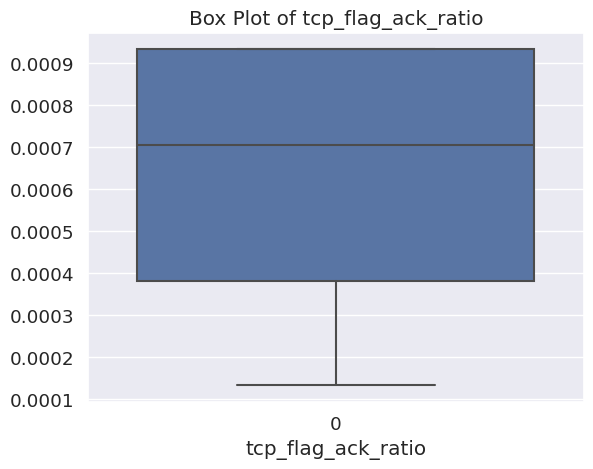

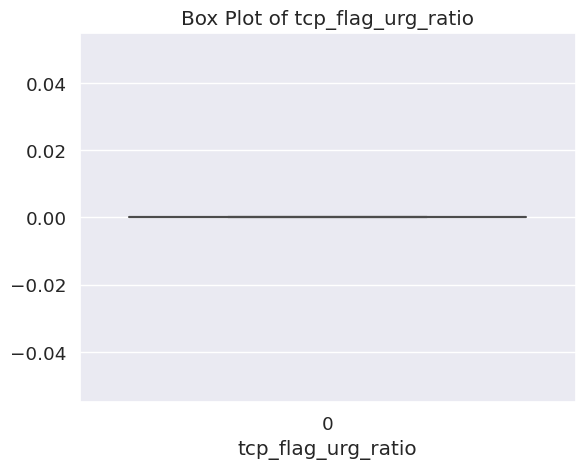

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create box plots for each numerical feature
for feature in numerical_features:
    sns.boxplot(data=X_train[feature])
    plt.xlabel(feature)
    plt.title(f'Box Plot of {feature}')
    plt.show()

The above box plots indicates the presence of potential outliers in our dataset.

The data points that fall beyond the whiskers (horizontal bar) are the potential outliers, and the outliers will be handled later.

## **Data Imputation**

Now, it is time to impute missing values in  the training data

In [ ]:
# Check for total missing, NULL, and NaN values
missing_data = pd.DataFrame({'total_missing': X_train.isnull().sum(),
                             'total_nan': X_train.isna().sum(),
                             'total_null': [X_train[col].isnull().sum() for col in X_train.columns]})

# Get the number of missing data points per column
missing_values_count = X_train.isnull().sum()

print(missing_data)
print('\n\n')
print(missing_values_count)

                                             total_missing  total_nan  \
destination.ip                                           0          0   
tls.handshake.extensions_supported_group.ch              0          0   
tcp.options.mss_val.syn                                  0          0   
tls.handshake.extension.len                              0          0   
tls.record.version.ch                                    0          0   
tcp.window_size_value                                    0          0   
tls.handshake.ciphersuite.ch                             0          0   
source.ip                                                0          0   
tls.handshake.sig_hash_alg.ch                            0          0   
tls.handshake.extensions_ec_point_format.sh             10         10   
tls.handshake.extensions_length                          0          0   
tcp.flags                                                0          0   
tcp.options.timestamp.tsval                        

### **Handling Missing Values**
As seen above, there are missing values that needs to be addressed in the dataset.

In [ ]:
# View categorical and numerical feature names

print(numerical_features)
print('\n')
print(categorical_features)

['tcp.options.mss_val.syn', 'ip.len.syn', 'tls.ja3sCnt', 'tcp.window_size_value.syn', 'tcp.options.sack_perm.syn', 'ip.ttl.syn', 'ip.flags.df.syn', 'ipProtocol', 'tcp.options.wscale.shift.syn', 'tcp_flag_fin_ratio', 'tcp_flag_syn_ratio', 'tcp_flag_rst_ratio', 'tcp_flag_psh_ratio', 'tcp_flag_ack_ratio', 'tcp_flag_urg_ratio']


['destination.ip', 'tls.handshake.extensions_supported_group.ch', 'tls.handshake.extension.len', 'tls.record.version.ch', 'tcp.window_size_value', 'tls.handshake.ciphersuite.ch', 'source.ip', 'tls.handshake.sig_hash_alg.ch', 'tls.handshake.extensions_ec_point_format.sh', 'tls.handshake.extensions_length', 'tcp.flags', 'tcp.options.timestamp.tsval', 'tls.handshake.type', 'tls.handshake.extensions_ec_point_format.ch', 'tls.handshake.extensions_alpn_str.sh', 'tls.handshake.version.ch', 'ip.dsfield.ecn', 'ip.ttl.client2server', 'tls.handshake.extension.type', 'tls.cipher', 'tls.handshake.version.sh', 'tcp.offset', 'tls.ja3', 'ip.ttl.server2client', 'tcp.options.syn', 

As a common practice, we will **impute categorical features with the mode**, which is the most frequent value in the feature. Mode imputation is also preferred if the data is an object.

For the **numerical feature**, we will **impute using KNN imputation**. KNN (k-nearest neighbors) imputation is a suitable technique for our dataset because it leverages the relationships between data points to fill in missing values. In network traffic data where observations are often correlated, KNN imputation can provide more accurate imputations by considering the similarity between instances.

In the context of predicting operating systems based on network features, the behavior of a network traffic record is likely to be influenced by similar records in terms of source, destination, protocol, and other attributes. By imputing missing values using KNN, we can capture the inherent structure of the data, helping to maintain the integrity of the relationships between features and the underlying patterns that may exist. This is particularly important in network data where the interactions between features can be complex and non-linear like my dataset.

KNN imputation considers the values of neighboring data points, making it suitable for filling in missing values in a way that aligns with the characteristics of the data. It can lead to more accurate and robust predictions, which is critical in the context of predicting operating systems from network features, where the quality of the features can greatly impact the model's performance

**KNN and Mode Imputation Justification**

Using KNN imputation for numerical features and mode imputation for categorical features in the context of predicting operating system based on network traffic information is a good choice because it allows us to fill in missing values with values that are typical or common for each feature type.

This helps ensure that the imputed data reflects the expected patterns and distributions in network traffic data, making it easier to accurately predict operating systems using the available **information**.

In [ ]:
# Perform imputation for the numerical data
from sklearn.impute import KNNImputer

# Initialise the KNNImputer with the desired number of neighbors, where n_neighbors can be adjusted as needed
knn_imputer = KNNImputer(n_neighbors=5)

# Fit and transform the imputer on our data
X_train_imputed = knn_imputer.fit_transform(X_train[numerical_features])
X_test_imputed = knn_imputer.transform(X_test[numerical_features])

In [ ]:
train_imputed = X_train.copy()
train_imputed[numerical_features] = X_train_imputed

In [ ]:
test_imputed = X_test.copy()
test_imputed[numerical_features] = X_test_imputed

In [ ]:
# Perform imputation for the categorical data (train_imputed)

# Perform mode imputation on categorical columns
train_imputed[categorical_features] = X_train[categorical_features].fillna(X_train[categorical_features].mode().iloc[0])

# Check the result
train_imputed[categorical_features]

destination.ip tls.handshake.extensions_supported_group.ch  \
47289    104.244.42.1                        ['0x0017', '0x0018']   
40822   104.244.42.65                        ['0x0017', '0x0018']   
33140  66.119.144.157                        ['0x0017', '0x0018']   
31569    106.11.93.16    ['0x001d', '0x0017', '0x0018', '0x0019']   
50206  216.137.63.138              ['0x0017', '0x0018', '0x0019']   
...               ...                                         ...   
11421    23.203.87.43    ['0x001d', '0x0017', '0x0018', '0x0019']   
45095    104.244.42.1                        ['0x0017', '0x0018']   
38521  134.170.58.190                        ['0x0017', '0x0018']   
860    148.251.52.222    ['0x001d', '0x0017', '0x0018', '0x0019']   
15987   162.213.33.50                                        ['']   

                             tls.handshake.extension.len  \
47289  [[''], [''], [''], ['16', '5', '6', '2', '20',...   
40822  [[''], [''], [''], ['16', '5', '6', '2', '20',...   
33140  [[''], [''], [''], ['29', '5', '6', '2', '20',...   
31569  [[''], [''], [''], ['15', '0', '1', '10', '2',...   
50206  [[''], [''], [''], ['18', '1', '8', '2', '176'...   
...                                                  ...   
11421  [[''], [''], [''], ['25', '0', '1', '10', '2',...   
45095  [[''], [''], [''], ['16', '5', '6', '2', '20',...   
38521  [[''], [''], [''], ['29', '5', '6', '2', '20',...   
860    [[''], [''], [''], ['29', '0', '1', '10', '2',...   
15987  [[''], [''], [''], ['27', '1', '10'], [''], ['...   

      tls.record.version.ch  \
47289               TLS 1.2   
40822               TLS 1.2   
33140               TLS 1.2   
31569               TLS 1.0   
50206               TLS 1.0   
...                     ...   
11421               TLS 1.0   
45095               TLS 1.2   
38521               TLS 1.2   
860                 TLS 1.0   
15987               SSL 3.0   

                                   tcp.window_size_value  \
47289  ['65535', '14600', '1024', '1024', '62', '62',...   
40822  ['65535', '14600', '1024', '1024', '62', '62',...   
33140  ['8192', '8192', '260', '260', '260', '260', '...   
31569  ['8192', '8192', '65340', '65340', '65535', '6...   
50206  ['29200', '14480', '229', '229', '61', '61', '...   
...                                                  ...   
11421  ['29200', '28960', '229', '229', '939', '939',...   
45095  ['65535', '14600', '1024', '1024', '62', '62',...   
38521  ['8192', '8192', '260', '260', '260', '260', '...   
860    ['8192', '29200', '256', '256', '237', '237', ...   
15987  ['29200', '28960', '229', '229', '235', '235',...   

                            tls.handshake.ciphersuite.ch      source.ip  \
47289  ['0xc028', '0xc027', '0xc014', '0xc013', '0x00...      10.0.0.11   
40822  ['0xc028', '0x009f', '0x009e', '0x009d', '0x00...      10.0.0.18   
33140  ['0xc028', '0x009f', '0x009e', '0x009d', '0x00...      10.0.0.16   
31569  ['0xc02b', '0xc02f', '0xcca9', '0xcca8', '0xc0...   192.168.10.9   
50206  ['0xc02b', '0xc02f', '0xc00a', '0xc009', '0xc0...       10.0.0.7   
...                                                  ...            ...   
11421  ['0xc02b', '0xc02f', '0xcca9', '0xcca8', '0xc0...  192.168.10.12   
45095  ['0xc028', '0xc027', '0xc014', '0xc013', '0x00...      10.0.0.11   
38521  ['0xc028', '0x009f', '0x009e', '0x009d', '0x00...      10.0.0.12   
860    ['0xc02b', '0xc02f', '0xcca9', '0xcca8', '0xc0...  192.168.10.14   
15987  ['0x0033', '0x0067', '0x0045', '0x0039', '0x00...  192.168.10.51   

                           tls.handshake.sig_hash_alg.ch  \
47289  ['0x0601', '0x0603', '0x0401', '0x0501', '0x02...   
40822  ['0x0601', '0x0603', '0x0401', '0x0501', '0x02...   
33140  ['0x0601', '0x0603', '0x0401', '0x0501', '0x02...   
31569  ['0x0403', '0x0503', '0x0603', '0x0804', '0x08...   
50206  ['0x0401', '0x0501', '0x0601', '0x0201', '0x04...   
...                                                  ...   
11421  ['0x0403', '0x0503', '0x0603', '0x0

In [ ]:
# Perform imputation for the categorical data (test_imputed)

# Perform mode imputation on categorical columns
test_imputed[categorical_features] = X_test[categorical_features].fillna(X_test[categorical_features].mode().iloc[0])

# Check the result
test_imputed[categorical_features]

destination.ip tls.handshake.extensions_supported_group.ch  \
46527   104.244.42.129                        ['0x0017', '0x0018']   
41958  212.179.154.216              ['0x0017', '0x0018', '0x0019']   
47982    216.58.219.46                        ['0x0017', '0x0018']   
10939   216.58.219.234    ['0x001d', '0x0017', '0x0018', '0x0019']   
35159   199.59.149.230                        ['0x0017', '0x0018']   
...                ...                                         ...   
15236     142.0.197.68    ['0x001d', '0x0017', '0x0018', '0x0019']   
50267  212.179.154.251              ['0x0017', '0x0018', '0x0019']   
21506  109.232.194.252    ['0x001d', '0x0017', '0x0018', '0x0019']   
19011    162.213.33.50                                        ['']   
2103      104.16.85.20    ['0x001d', '0x0017', '0x0018', '0x0019']   

                             tls.handshake.extension.len  \
46527  [[''], [''], [''], ['16', '5', '6', '2', '20',...   
41958  [[''], [''], [''], ['20', '1', '8', '2', '212'...   
47982  [[''], [''], [''], ['1', '28', '0', '0', '22',...   
10939  [[''], [''], [''], ['24', '0', '1', '10', '2',...   
35159  [[''], [''], [''], ['16', '5', '6', '2', '20',...   
...                                                  ...   
15236  [[''], [''], [''], ['19', '0', '1', '10', '2',...   
50267  [[''], [''], [''], ['20', '8', '2', '12', '0']...   
21506  [[''], [''], [''], ['22', '0', '1', '10', '2',...   
19011  [[''], [''], [''], [''], ['27', '1', '10'], ['...   
2103   [[''], [''], [''], ['21', '0', '1', '10', '2',...   

      tls.record.version.ch  \
46527               TLS 1.2   
41958               TLS 1.0   
47982               TLS 1.0   
10939               TLS 1.0   
35159               TLS 1.2   
...                     ...   
15236               TLS 1.0   
50267               TLS 1.0   
21506               TLS 1.0   
19011               SSL 3.0   
2103                TLS 1.0   

                                   tcp.window_size_value  \
46527  ['65535', '14600', '1024', '1024', '62', '62',...   
41958  ['29200', '28960', '229', '229', '235', '235',...   
47982  ['8192', '65535', '64240', '64240', '65535', '...   
10939  ['8192', '42780', '258', '258', '343', '343', ...   
35159  ['65535', '14600', '1024', '1024', '62', '62',...   
...                                                  ...   
15236  ['8192', '29200', '256', '256', '60', '60', '6...   
50267  ['65535', '28960', '4128', '4128', '235', '235...   
21506  ['8192', '29200', '256', '256', '60', '60', '6...   
19011  ['29200', '29200', '28960', '229', '229', '235...   
2103   ['8192', '29200', '256', '256', '30', '30', '3...   

                            tls.handshake.ciphersuite.ch      source.ip  \
46527  ['0xc028', '0xc027', '0xc014', '0xc013', '0x00...      10.0.0.11   
41958  ['0xc02b', '0xc02f', '0x009e', '0xc00a', '0xc0...       10.0.0.9   
47982  ['0xc02b', '0xc02f', '0x009e', '0xcc14', '0xcc...      10.0.2.15   
10939  ['0xc02b', '0xc02f', '0xcca9', '0xcca8', '0xc0...   192.168.10.5   
35159  ['0xc028', '0x009f', '0x009e', '0x009d', '0x00...      10.0.0.16   
...                                                  ...            ...   
15236  ['0xc02b', '0xc02f', '0xcca9', '0xcca8', '0xc0...   192.168.10.5   
50267  ['0x00ff', '0xc024', '0xc023', '0xc00a', '0xc0...      10.0.0.11   
21506  ['0xc02b', '0xc02f', '0xcca9', '0xcca8', '0xc0...  192.168.10.15   
19011  ['0x0033', '0x0067', '0x0045', '0x0039', '0x00...  192.168.10.51   
2103   ['0xc02b', '0xc02f', '0xcca9', '0xcca8', '0xc0...   192.168.10.5   

                           tls.handshake.sig_hash_alg.ch  \
46527  ['0x0601', '0x0603', '0x0401', '0x0501', '0x02...   
41958  ['0x0401', '0x0501', '0x0601', '0x0201', '0x04...   
47982  ['0x0601', '0x0603', '0x0501', '0x0503', '0x04...   
10939  ['0x0403', '0x0503', '0x0603', '0x0804', '0x08...   
35159  ['0x0601', '0x0603', '0x0401', '0x0501', '0x02...   
...                                                  ...   
15236  ['0x0403', '0x0503', '0x

In [ ]:
# Check the count of missing values again to confirm that they are all imputed
missing_values_count = train_imputed.isnull().sum()
missing_values_count

destination.ip                                 0
tls.handshake.extensions_supported_group.ch    0
tcp.options.mss_val.syn                        0
tls.handshake.extension.len                    0
tls.record.version.ch                          0
tcp.window_size_value                          0
tls.handshake.ciphersuite.ch                   0
source.ip                                      0
tls.handshake.sig_hash_alg.ch                  0
tls.handshake.extensions_ec_point_format.sh    0
tls.handshake.extensions_length                0
tcp.flags                                      0
tcp.options.timestamp.tsval                    0
tls.handshake.type                             0
tls.handshake.extensions_ec_point_format.ch    0
tls.handshake.extensions_alpn_str.sh           0
tls.handshake.version.ch                       0
ip.dsfield.ecn                                 0
ip.ttl.client2server                           0
tls.handshake.extension.type                   0
tls.cipher          

Now, let us check before and after performing data imputation to confirm if the distribution has been affected; where before is 'X_train' and after is 'train_imputed.'

In [ ]:
train_imputed.describe()

tcp.options.mss_val.syn    ip.len.syn  tls.ja3sCnt  \
count                  36782.0  36782.000000      36782.0   
mean                    1460.0     55.030069          1.0   
std                        0.0      4.391355          0.0   
min                     1460.0     48.000000          1.0   
25%                     1460.0     52.000000          1.0   
50%                     1460.0     52.000000          1.0   
75%                     1460.0     60.000000          1.0   
max                     1460.0     64.000000          1.0   

       tcp.window_size_value.syn  tcp.options.sack_perm.syn    ip.ttl.syn  \
count               36782.000000                    36782.0  36782.000000   
mean                26099.858382                        1.0    106.573868   
std                 22755.659324                        0.0     30.202949   
min                  8192.000000                        1.0     64.000000   
25%                  8192.000000                        1.0     64.000000   
50%                  8192.000000                        1.0    128.000000   
75%                 29200.000000                        1.0    128.000000   
max                 65535.000000                        1.0    128.000000   

       ip.flags.df.syn  ipProtocol  tcp.options.wscale.shift.syn  \
count          36782.0     36782.0                  36782.000000   
mean               1.0         6.0                      7.066456   
std                0.0         0.0                      1.721062   
min                1.0         6.0                      1.000000   
25%                1.0         6.0                      7.000000   
50%                1.0         6.0                      8.000000   
75%                1.0         6.0                      8.000000   
max                1.0         6.0                      8.000000   

       tcp_flag_fin_ratio  tcp_flag_syn_ratio  tcp_flag_rst_ratio  \
count        36782.000000        36782.000000        36782.000000   
mean             0.000024            0.000039            0.000006   
std              0.000022            0.000005            0.000013   
min              0.000000            0.000038            0.000000   
25%              0.000000            0.000038            0.000000   
50%              0.000038            0.000038            0.000000   
75%              0.000038            0.000038            0.000000   
max              0.000266            0.000152            0.000190   

       tcp_flag_psh_ratio  tcp_flag_ack_ratio  tcp_flag_urg_ratio  
count        36782.000000        36782.000000             36782.0  
mean             0.000240            0.000658                 0.0  
std              0.000138            0.000259                 0.0  
min              0.000038            0.000133                 0.0  
25%              0.000133            0.000381                 0.0  
50%              0.000171            0.000704                 0.0  
75%              0.000343            0.000932                 0.0  
max              0.000799            0.000932                 0.0

In [ ]:
X_train.describe()

tcp.options.mss_val.syn    ip.len.syn  tls.ja3sCnt  \
count                  36782.0  36782.000000      36782.0   
mean                    1460.0     55.030069          1.0   
std                        0.0      4.391355          0.0   
min                     1460.0     48.000000          1.0   
25%                     1460.0     52.000000          1.0   
50%                     1460.0     52.000000          1.0   
75%                     1460.0     60.000000          1.0   
max                     1460.0     64.000000          1.0   

       tcp.window_size_value.syn  tcp.options.sack_perm.syn    ip.ttl.syn  \
count               36782.000000                    36782.0  36782.000000   
mean                26099.858382                        1.0    106.573868   
std                 22755.659324                        0.0     30.202949   
min                  8192.000000                        1.0     64.000000   
25%                  8192.000000                        1.0     64.000000   
50%                  8192.000000                        1.0    128.000000   
75%                 29200.000000                        1.0    128.000000   
max                 65535.000000                        1.0    128.000000   

       ip.flags.df.syn  ipProtocol  tcp.options.wscale.shift.syn  \
count          36782.0     36782.0                  36781.000000   
mean               1.0         6.0                      7.066529   
std                0.0         0.0                      1.721029   
min                1.0         6.0                      1.000000   
25%                1.0         6.0                      7.000000   
50%                1.0         6.0                      8.000000   
75%                1.0         6.0                      8.000000   
max                1.0         6.0                      8.000000   

       tcp_flag_fin_ratio  tcp_flag_syn_ratio  tcp_flag_rst_ratio  \
count        36782.000000        36782.000000        36782.000000   
mean             0.000024            0.000039            0.000006   
std              0.000022            0.000005            0.000013   
min              0.000000            0.000038            0.000000   
25%              0.000000            0.000038            0.000000   
50%              0.000038            0.000038            0.000000   
75%              0.000038            0.000038            0.000000   
max              0.000266            0.000152            0.000190   

       tcp_flag_psh_ratio  tcp_flag_ack_ratio  tcp_flag_urg_ratio  
count        36782.000000        36782.000000             36782.0  
mean             0.000240            0.000658                 0.0  
std              0.000138            0.000259                 0.0  
min              0.000038            0.000133                 0.0  
25%              0.000133            0.000381                 0.0  
50%              0.000171            0.000704                 0.0  
75%              0.000343            0.000932                 0.0  
max              0.000799            0.000932                 0.0

Comparing the statistical descriptions for both X_train and train_imputed, we can see little to no difference indicating that the imputation methods chosen are good since there are no major changes in the data distribution.

In [ ]:
# Now, we overwrite the main dataframe
X_train = train_imputed.copy()
X_test = test_imputed.copy()

In [ ]:
# Store the value of both y_train and y_test as pickup points to be used during model optimisation
y_train_memory = y_train.copy()
y_test_memory = y_test.copy()

In [ ]:
X_train.head()

destination.ip tls.handshake.extensions_supported_group.ch  \
47289    104.244.42.1                        ['0x0017', '0x0018']   
40822   104.244.42.65                        ['0x0017', '0x0018']   
33140  66.119.144.157                        ['0x0017', '0x0018']   
31569    106.11.93.16    ['0x001d', '0x0017', '0x0018', '0x0019']   
50206  216.137.63.138              ['0x0017', '0x0018', '0x0019']   

       tcp.options.mss_val.syn  \
47289                   1460.0   
40822                   1460.0   
33140                   1460.0   
31569                   1460.0   
50206                   1460.0   

                             tls.handshake.extension.len  \
47289  [[''], [''], [''], ['16', '5', '6', '2', '20',...   
40822  [[''], [''], [''], ['16', '5', '6', '2', '20',...   
33140  [[''], [''], [''], ['29', '5', '6', '2', '20',...   
31569  [[''], [''], [''], ['15', '0', '1', '10', '2',...   
50206  [[''], [''], [''], ['18', '1', '8', '2', '176'...   

      tls.record.version.ch  \
47289               TLS 1.2   
40822               TLS 1.2   
33140               TLS 1.2   
31569               TLS 1.0   
50206               TLS 1.0   

                                   tcp.window_size_value  \
47289  ['65535', '14600', '1024', '1024', '62', '62',...   
40822  ['65535', '14600', '1024', '1024', '62', '62',...   
33140  ['8192', '8192', '260', '260', '260', '260', '...   
31569  ['8192', '8192', '65340', '65340', '65535', '6...   
50206  ['29200', '14480', '229', '229', '61', '61', '...   

                            tls.handshake.ciphersuite.ch     source.ip  \
47289  ['0xc028', '0xc027', '0xc014', '0xc013', '0x00...     10.0.0.11   
40822  ['0xc028', '0x009f', '0x009e', '0x009d', '0x00...     10.0.0.18   
33140  ['0xc028', '0x009f', '0x009e', '0x009d', '0x00...     10.0.0.16   
31569  ['0xc02b', '0xc02f', '0xcca9', '0xcca8', '0xc0...  192.168.10.9   
50206  ['0xc02b', '0xc02f', '0xc00a', '0xc009', '0xc0...      10.0.0.7   

                           tls.handshake.sig_hash_alg.ch  \
47289  ['0x0601', '0x0603', '0x0401', '0x0501', '0x02...   
40822  ['0x0601', '0x0603', '0x0401', '0x0501', '0x02...   
33140  ['0x0601', '0x0603', '0x0401', '0x0501', '0x02...   
31569  ['0x0403', '0x0503', '0x0603', '0x0804', '0x08...   
50206  ['0x0401', '0x0501', '0x0601', '0x0201', '0x04...   

      tls.handshake.extensions_ec_point_format.sh  ... ipProtocol  \
47289                                        ['']  ...        6.0   
40822                                        ['']  ...        6.0   
33140                                        ['']  ...        6.0   
31569                             ['0', '1', '2']  ...        6.0   
50206                                        ['']  ...        6.0   

                               tls.ja3s tcp.options.wscale.shift.syn  \
47289  70b9168e9fd446fb5ac938f381785e62                          8.0   
40822  70b9168e9fd446fb5ac938f381785e62                          8.0   
33140  80b3a14bccc8598a1f3bbe83e71f735f                          8.0   
31569  2d1eb5817ece335c24904f516ad5da12                          8.0   
50206  d199ba0af2b08e204c73d6d81a1fd260                          7.0   

                                                   ip.id tcp_flag_fin_ratio  \
47289  ['0x56de', '0x0000', '0x56df', '0x56e0', '0xf0...           0.000000   
40822  ['0x0762', '0x0000', '0x0763', '0x0764', '0x88...           0.000000   
33140  ['0x737f', '0x0f65', '0x7380', '0x7381', '0x0f...           0.000038   
31569  ['0x7401', '0x7401', '0x7406', '0x7407', '0x9a...           0.000038   
50206  ['0xaf8a', '0x0000', '0xaf8b', '0xaf8c', '0x8b...           0.000038   

      tcp_flag_syn_ratio tcp_flag_rst_ratio tcp_flag_psh_ratio  \
47289           0.000038           0.000000           0.000495   
40822           0.000038           0.000000           0.000457   
33140           0.000038           0.000000           0.000133   
31569           0.000038           0.000019           0.000171   
50206           0.0

In [ ]:
X_test.head()

destination.ip tls.handshake.extensions_supported_group.ch  \
46527   104.244.42.129                        ['0x0017', '0x0018']   
41958  212.179.154.216              ['0x0017', '0x0018', '0x0019']   
47982    216.58.219.46                        ['0x0017', '0x0018']   
10939   216.58.219.234    ['0x001d', '0x0017', '0x0018', '0x0019']   
35159   199.59.149.230                        ['0x0017', '0x0018']   

       tcp.options.mss_val.syn  \
46527                   1460.0   
41958                   1460.0   
47982                   1460.0   
10939                   1460.0   
35159                   1460.0   

                             tls.handshake.extension.len  \
46527  [[''], [''], [''], ['16', '5', '6', '2', '20',...   
41958  [[''], [''], [''], ['20', '1', '8', '2', '212'...   
47982  [[''], [''], [''], ['1', '28', '0', '0', '22',...   
10939  [[''], [''], [''], ['24', '0', '1', '10', '2',...   
35159  [[''], [''], [''], ['16', '5', '6', '2', '20',...   

      tls.record.version.ch  \
46527               TLS 1.2   
41958               TLS 1.0   
47982               TLS 1.0   
10939               TLS 1.0   
35159               TLS 1.2   

                                   tcp.window_size_value  \
46527  ['65535', '14600', '1024', '1024', '62', '62',...   
41958  ['29200', '28960', '229', '229', '235', '235',...   
47982  ['8192', '65535', '64240', '64240', '65535', '...   
10939  ['8192', '42780', '258', '258', '343', '343', ...   
35159  ['65535', '14600', '1024', '1024', '62', '62',...   

                            tls.handshake.ciphersuite.ch     source.ip  \
46527  ['0xc028', '0xc027', '0xc014', '0xc013', '0x00...     10.0.0.11   
41958  ['0xc02b', '0xc02f', '0x009e', '0xc00a', '0xc0...      10.0.0.9   
47982  ['0xc02b', '0xc02f', '0x009e', '0xcc14', '0xcc...     10.0.2.15   
10939  ['0xc02b', '0xc02f', '0xcca9', '0xcca8', '0xc0...  192.168.10.5   
35159  ['0xc028', '0x009f', '0x009e', '0x009d', '0x00...     10.0.0.16   

                           tls.handshake.sig_hash_alg.ch  \
46527  ['0x0601', '0x0603', '0x0401', '0x0501', '0x02...   
41958  ['0x0401', '0x0501', '0x0601', '0x0201', '0x04...   
47982  ['0x0601', '0x0603', '0x0501', '0x0503', '0x04...   
10939  ['0x0403', '0x0503', '0x0603', '0x0804', '0x08...   
35159  ['0x0601', '0x0603', '0x0401', '0x0501', '0x02...   

      tls.handshake.extensions_ec_point_format.sh  ... ipProtocol  \
46527                                        ['']  ...        6.0   
41958                                        ['']  ...        6.0   
47982                                       ['0']  ...        6.0   
10939                                       ['0']  ...        6.0   
35159                                        ['']  ...        6.0   

                               tls.ja3s tcp.options.wscale.shift.syn  \
46527  2ddef404aaed643edd1975073aedcbab                          8.0   
41958  29cc2b00a1a6ebc9008fb960b0d32ca0                          7.0   
47982  e9e773f799cd1dfd28842f705547f202                          8.0   
10939  ab41313cfec25328b20865eb1388e0a2                          8.0   
35159  5a450169db1f168548fb87aa841fe743                          8.0   

                                                   ip.id tcp_flag_fin_ratio  \
46527  ['0x554f', '0x0000', '0x5551', '0x5552', '0x9b...           0.000000   
41958  ['0x434d', '0x7be1', '0x434e', '0x434f', '0x7b...           0.000038   
47982  ['0x32ff', '0x9322', '0x3301', '0x3303', '0x93...           0.000038   
10939  ['0x516f', '0xc616', '0x5174', '0x5178', '0xc6...           0.000000   
35159  ['0x147d', '0x0000', '0x147e', '0x147f', '0xbe...           0.000000   

      tcp_flag_syn_ratio tcp_flag_rst_ratio tcp_flag_psh_ratio  \
46527           0.000038                0.0           0.000457   
41958           0.000038                0.0           0.000228   
47982           0.000038                0.0           0.000228   
10939           0.000038                0.0           0.000362   
35159         

## **Check Outliers**

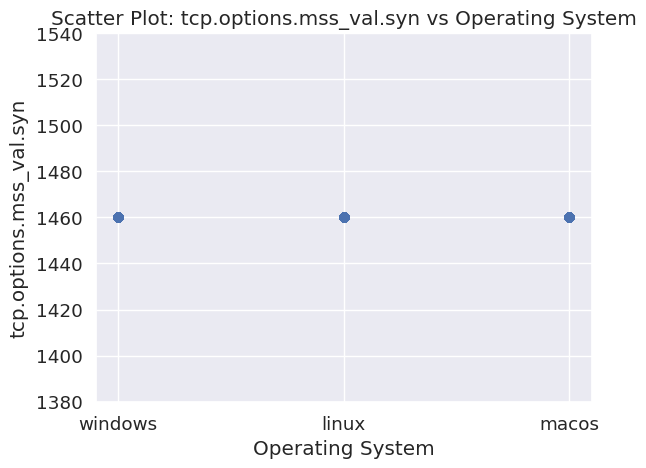

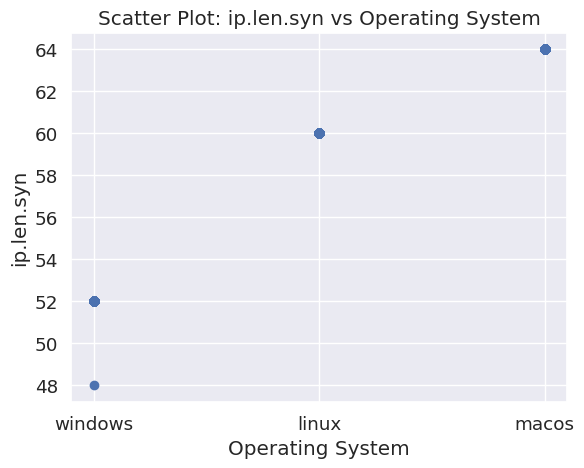

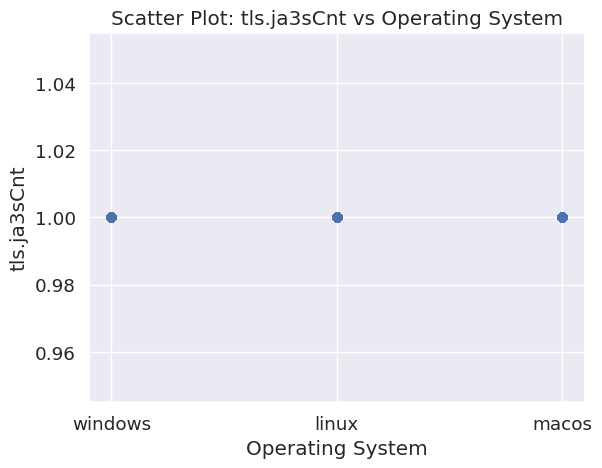

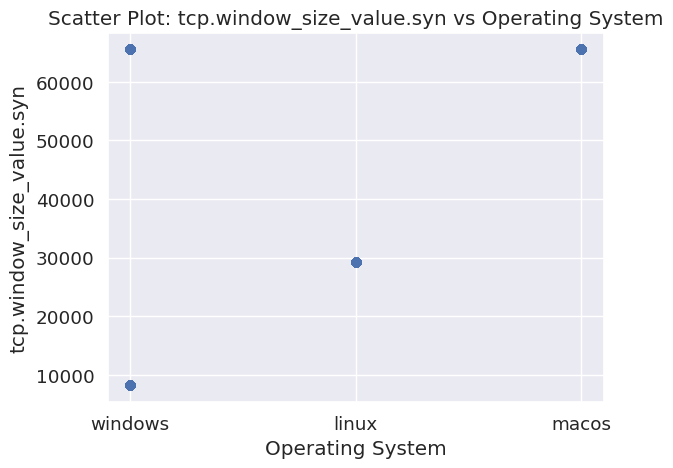

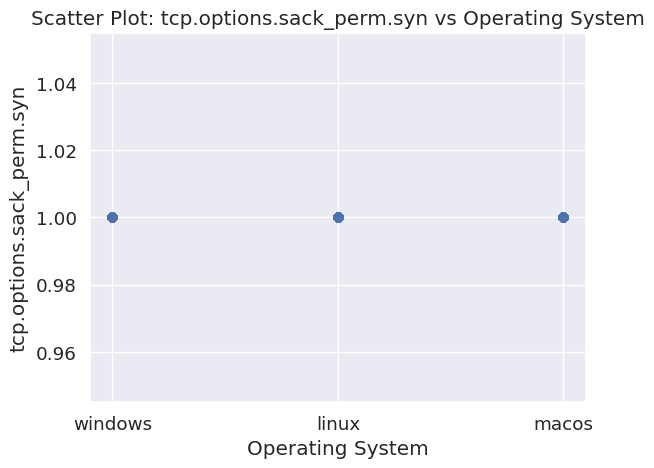

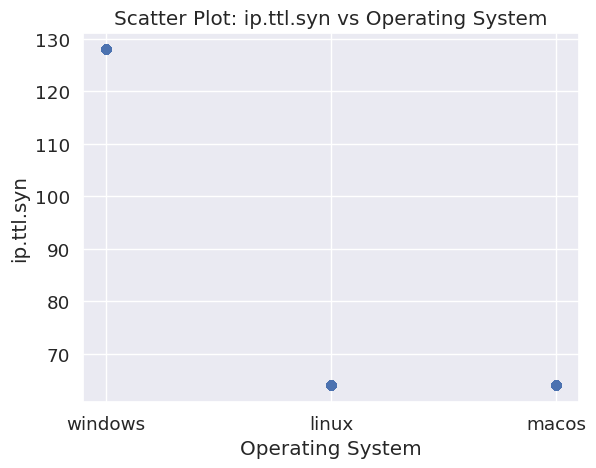

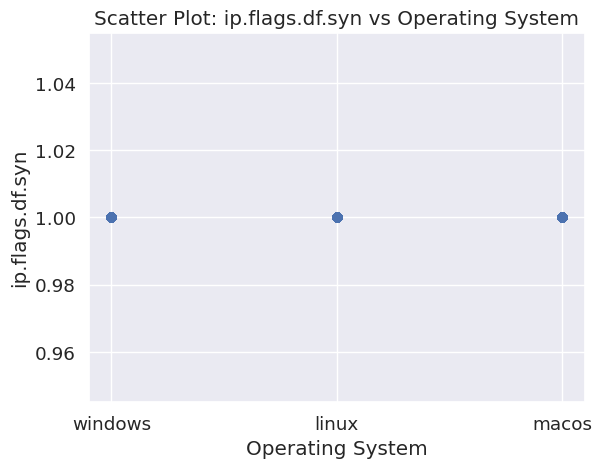

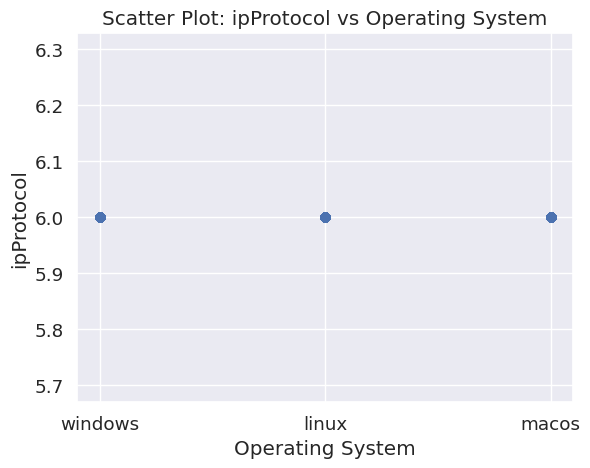

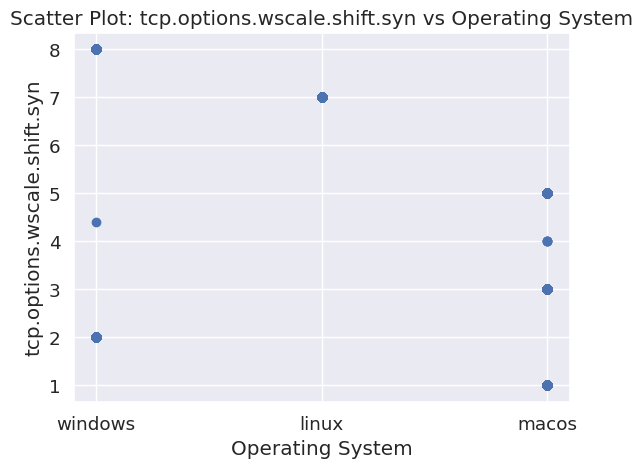

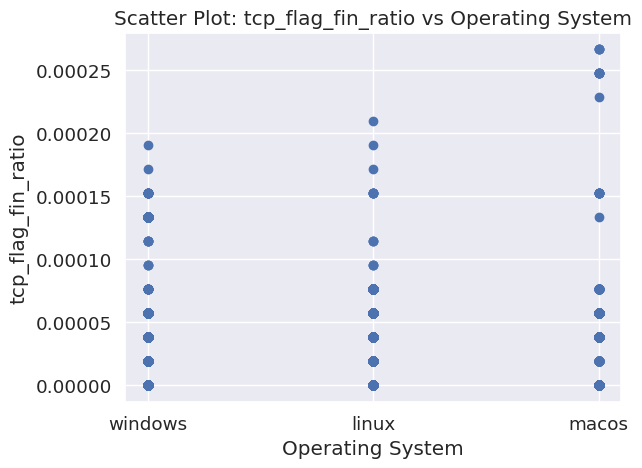

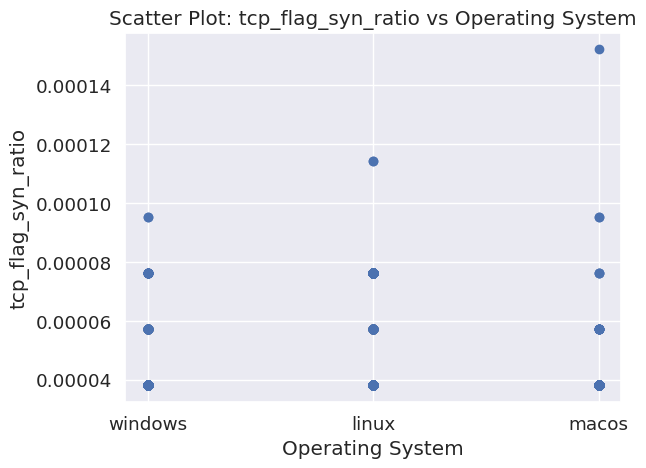

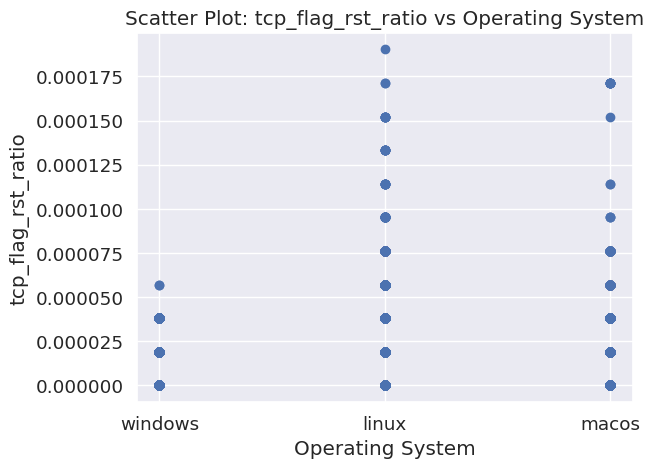

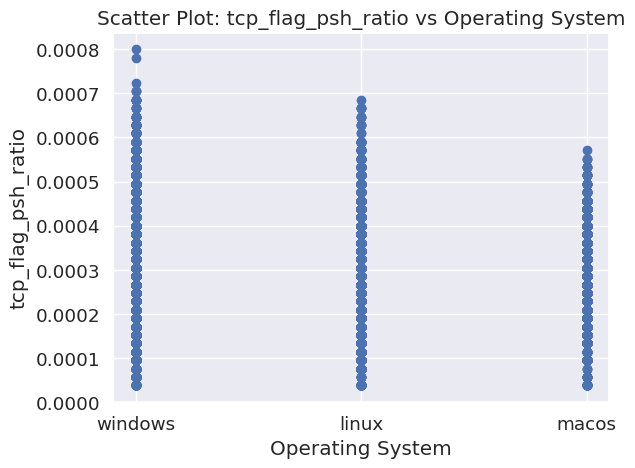

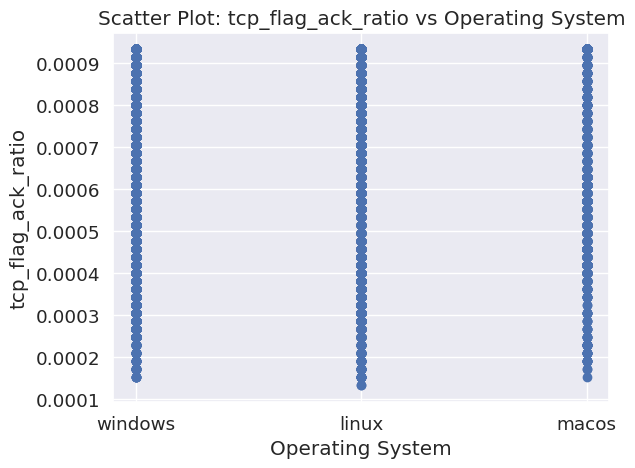

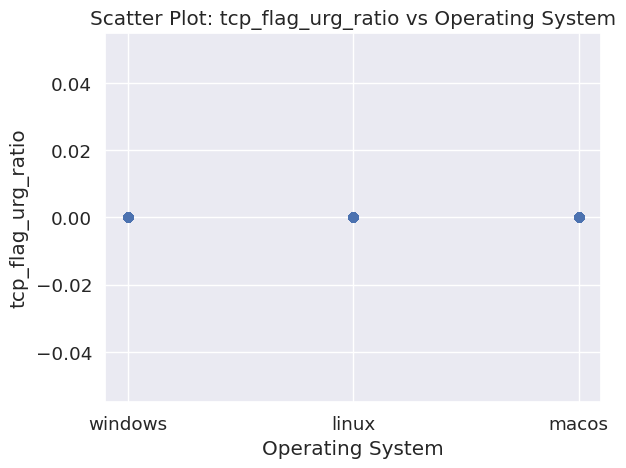

In [ ]:
# We create scatter plots for numerical features

for feature in numerical_features:
    plt.scatter(y_train, X_train[feature])
    plt.xlabel('Operating System')
    plt.ylabel(feature)
    plt.title('Scatter Plot: {} vs Operating System'.format(feature))
    plt.show()

###Now, let us detect outliers using Interquartile Range (IQR)

In [ ]:
# Calculate the first quartile (Q1) of the numerical features in X_train
Q1 = X_train[numerical_features].quantile(0.25)

# Calculate the third quartile (Q3) of the numerical features in X_train
Q3 = X_train[numerical_features].quantile(0.75)

# Calculate the interquartile range (IQR) between the first quartile (Q1) and the third quartile (Q3) of the numerical features in X_train
IQR = Q3 - Q1

# Define a threshold multiplier for the IQR
threshold_multiplier = 1.5

# Calculate the lower and upper bounds for outlier detection
lower_bound = Q1 - threshold_multiplier * IQR
upper_bound = Q3 + threshold_multiplier * IQR

# Count the number of outliers for each feature
outliers_count = ((X_train[numerical_features] < lower_bound) | (X_train[numerical_features] > upper_bound)).sum()

# Print the number of outliers for each feature
print(outliers_count)

tcp.options.mss_val.syn            0
ip.len.syn                         0
tls.ja3sCnt                        0
tcp.window_size_value.syn       8161
tcp.options.sack_perm.syn          0
ip.ttl.syn                         0
ip.flags.df.syn                    0
ipProtocol                         0
tcp.options.wscale.shift.syn    5247
tcp_flag_fin_ratio               217
tcp_flag_syn_ratio               642
tcp_flag_rst_ratio              8215
tcp_flag_psh_ratio                26
tcp_flag_ack_ratio                 0
tcp_flag_urg_ratio                 0
dtype: int64


**Reason for using IQR for outlier detection**

IQR is robust against extreme values and outliers. It considers the spread of the middle 50% of the data, making it more suitable for data that don't follow a normal distribution. Our dataset doesn't follow normal distribution as seen from the previous visualisations.

Due to the nature of our dataset and the amount of outliers identified, we have chosen not to remove the outliers because most of what we identified as outliers may not be outliers, as it may have missed some key data points.

For now, we will not remove any outliers until we have completed our first training to see if they have a negative impact on our training.

## **Data Preprocessing**

In [ ]:
# Check numerical and categorical feature names
print(numerical_features)
print ('\n')
print(categorical_features)

['tcp.options.mss_val.syn', 'ip.len.syn', 'tls.ja3sCnt', 'tcp.window_size_value.syn', 'tcp.options.sack_perm.syn', 'ip.ttl.syn', 'ip.flags.df.syn', 'ipProtocol', 'tcp.options.wscale.shift.syn', 'tcp_flag_fin_ratio', 'tcp_flag_syn_ratio', 'tcp_flag_rst_ratio', 'tcp_flag_psh_ratio', 'tcp_flag_ack_ratio', 'tcp_flag_urg_ratio']


['destination.ip', 'tls.handshake.extensions_supported_group.ch', 'tls.handshake.extension.len', 'tls.record.version.ch', 'tcp.window_size_value', 'tls.handshake.ciphersuite.ch', 'source.ip', 'tls.handshake.sig_hash_alg.ch', 'tls.handshake.extensions_ec_point_format.sh', 'tls.handshake.extensions_length', 'tcp.flags', 'tcp.options.timestamp.tsval', 'tls.handshake.type', 'tls.handshake.extensions_ec_point_format.ch', 'tls.handshake.extensions_alpn_str.sh', 'tls.handshake.version.ch', 'ip.dsfield.ecn', 'ip.ttl.client2server', 'tls.handshake.extension.type', 'tls.cipher', 'tls.handshake.version.sh', 'tcp.offset', 'tls.ja3', 'ip.ttl.server2client', 'tcp.options.syn', 

In [ ]:
# Check the length of both numerical and categorical features
print("Numerical features length",len(numerical_features))
print("Categorical features length",len(categorical_features))

Numerical features length 15
Categorical features length 32


Next, we carryout standardisation of the numerical features.

###**Handle Numerical features**

#### **StandardScaler for Standardisation**

Standardisation is a good choice for this problem domain, particularly in the presence of outliers because it scales the numerical features to have a mean of approximately 0 and a standard deviation of approximately 1.

This process centers the data around zero, making it less sensitive to the impact of outliers, which might be common in network traffic information. By reducing the scale differences between features, standardisation ensures that no single feature dominates the others during model training, leading to more stable and reliable predictions.

Additionally, standardisation is suitable for algorithms that assume normally distributed features, which can be relevant in this domain where many features might follow a bell-shaped distribution.

**Note that we are not using MinMaxScaler (normalisation) because we have not removed outliers, and MinMaxScaler works with extreme values (minimum and maximum). Therefore, using MinMaxScaler without removing outliers may lead to error, as it is sensitive to outliers and may use the outliers for its calculation. Consequently, the decision to use StandardScaler.**

In [ ]:
from sklearn.preprocessing import StandardScaler
# Create the StandardScaler instance
scaler = StandardScaler()

# Below checks for the numerical_features in X_train, fits, transforms it and saves it back as the same feature
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])

# Transform the test data using the scaler fitted on the training data
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [ ]:
X_train[numerical_features].head()

tcp.options.mss_val.syn  ip.len.syn  tls.ja3sCnt  \
47289                      0.0   -0.690017          0.0   
40822                      0.0   -0.690017          0.0   
33140                      0.0   -0.690017          0.0   
31569                      0.0   -0.690017          0.0   
50206                      0.0    1.131769          0.0   

       tcp.window_size_value.syn  tcp.options.sack_perm.syn  ip.ttl.syn  \
47289                   1.733005                        0.0    0.709415   
40822                   1.733005                        0.0    0.709415   
33140                  -0.786974                        0.0    0.709415   
31569                  -0.786974                        0.0    0.709415   
50206                   0.136238                        0.0   -1.409612   

       ip.flags.df.syn  ipProtocol  tcp.options.wscale.shift.syn  \
47289              0.0         0.0                      0.542430   
40822              0.0         0.0                      0.542430   
33140              0.0         0.0                      0.542430   
31569              0.0         0.0                      0.542430   
50206              0.0         0.0                     -0.038614   

       tcp_flag_fin_ratio  tcp_flag_syn_ratio  tcp_flag_rst_ratio  \
47289           -1.101399           -0.128745           -0.443289   
40822           -1.101399           -0.128745           -0.443289   
33140            0.663853           -0.128745           -0.443289   
31569            0.663853           -0.128745            1.036164   
50206            0.663853           -0.128745           -0.443289   

       tcp_flag_psh_ratio  tcp_flag_ack_ratio  tcp_flag_urg_ratio  
47289            1.840357            1.058350                 0.0  
40822            1.565288            1.058350                 0.0  
33140           -0.772799           -1.363070                 0.0  
31569           -0.497730           -0.996189                 0.0  
50206           -0.497730            0.764844                 0.0

In [ ]:
X_test[numerical_features].head()

tcp.options.mss_val.syn  ip.len.syn  tls.ja3sCnt  \
46527                      0.0   -0.690017          0.0   
41958                      0.0    1.131769          0.0   
47982                      0.0   -0.690017          0.0   
10939                      0.0   -0.690017          0.0   
35159                      0.0   -0.690017          0.0   

       tcp.window_size_value.syn  tcp.options.sack_perm.syn  ip.ttl.syn  \
46527                   1.733005                        0.0    0.709415   
41958                   0.136238                        0.0   -1.409612   
47982                  -0.786974                        0.0    0.709415   
10939                  -0.786974                        0.0    0.709415   
35159                   1.733005                        0.0    0.709415   

       ip.flags.df.syn  ipProtocol  tcp.options.wscale.shift.syn  \
46527              0.0         0.0                      0.542430   
41958              0.0         0.0                     -0.038614   
47982              0.0         0.0                      0.542430   
10939              0.0         0.0                      0.542430   
35159              0.0         0.0                      0.542430   

       tcp_flag_fin_ratio  tcp_flag_syn_ratio  tcp_flag_rst_ratio  \
46527           -1.101399           -0.128745           -0.443289   
41958            0.663853           -0.128745           -0.443289   
47982            0.663853           -0.128745           -0.443289   
10939           -1.101399           -0.128745           -0.443289   
35159           -1.101399           -0.128745           -0.443289   

       tcp_flag_psh_ratio  tcp_flag_ack_ratio  tcp_flag_urg_ratio  
46527            1.565288            1.058350                 0.0  
41958           -0.085126            0.104457                 0.0  
47982           -0.085126            0.397962                 0.0  
10939            0.877616            1.058350                 0.0  
35159            2.115426            1.058350                 0.0

###**Handling Categorical Features**

First, we remove ID-like columns and high cardinality columns to ensure that we can learn from the values.

These are features that have unique values that there is little to nothing that we can learn from because there is no pattern that can be formed. Removing them also helps address overfitting.

In [ ]:
# Calculate unique value counts for each categorical column
unique_value_counts = X_train[categorical_features].nunique()

# Identify ID-like columns based on data distribution.
# We look through the categorical features and check if the unique_value_counts equal to number of rows, then it is stored into id_like_columns
id_like_columns = [col for col in categorical_features if unique_value_counts[col] == len(X_train)]

# Remove ID-like columns from the categorical_features list
categorical_features = [col for col in categorical_features if col not in id_like_columns]

# Calculate the percentage of unique values for each categorical column
unique_value_percentages = (unique_value_counts / len(X_train)) * 100

# Define a threshold for high cardinality columns (e.g., 90% unique values)
high_cardinality_threshold = 90

# Identify high cardinality columns based on unique value percentages
# We look through the categorical features and check if the unique_value_percentages is greater than high_cardinality_threshold, then it is stored into high_cardinality_columns
high_cardinality_columns = [col for col in categorical_features if unique_value_percentages[col] > high_cardinality_threshold]

# Remove high cardinality columns from the categorical_features list
categorical_features = [col for col in categorical_features if col not in high_cardinality_columns]

# Print the remaining categorical features after removing ID-like and high cardinality columns
print("Remaining categorical features:", categorical_features)

Remaining categorical features: ['destination.ip', 'tls.handshake.extensions_supported_group.ch', 'tls.handshake.extension.len', 'tls.record.version.ch', 'tcp.window_size_value', 'tls.handshake.ciphersuite.ch', 'source.ip', 'tls.handshake.sig_hash_alg.ch', 'tls.handshake.extensions_ec_point_format.sh', 'tls.handshake.extensions_length', 'tcp.flags', 'tcp.options.timestamp.tsval', 'tls.handshake.type', 'tls.handshake.extensions_ec_point_format.ch', 'tls.handshake.extensions_alpn_str.sh', 'tls.handshake.version.ch', 'ip.dsfield.ecn', 'ip.ttl.client2server', 'tls.handshake.extension.type', 'tls.cipher', 'tls.handshake.version.sh', 'tcp.offset', 'tls.ja3', 'ip.ttl.server2client', 'tcp.options.syn', 'tls.handshake.extensions_alpn_str.ch', 'ip.flags.df', 'ip.len', 'ip.ttl', 'ip.dsfield.dscp', 'tls.ja3s']


In [ ]:
len(categorical_features)

31

Considering how large the list of categorical features are, we will focus on just four (4) important categorical features based on domain knowledge for a start so we are not overwhelmed with the large amount of features.

These categorical features are:
1. **tls.ja3:** JA3 is a method to fingerprint TLS clients based on their specific cryptographic parameters during the handshake. It can offer insights into the unique TLS client configurations used by various operating systems.
2. **tls.handshake.ciphersuite.ch:** The cipher suite selection during the TLS handshake depends on the cryptographic capabilities of the client and server. Different operating systems may have specific preferences for cipher suites.
3. **tcp.options.syn:** The SYN flag is used in the TCP handshake process to initiate a connection. Certain operating systems might have specific behaviors or implementations related to SYN packets.
4. **tls.record.version.ch:** This feature indicates the TLS version used during communication. Some operating systems might be more inclined to use specific TLS versions or have different implementations of TLS.

These features can be used for predicting the operating system because they exhibit significant variability among different operating systems, have domain relevance in terms of network traffic behavior, and show a strong correlation with the target variable (operating system).

By including these features in the predictive model, it is likely to achieve better classification performance and accurate predictions of the operating system based on network traffic information.

In [ ]:
# Now, we store the selected categorical features
selected_categorical_features = ['tls.ja3', 'tls.handshake.ciphersuite.ch', 'tcp.options.syn', 'tls.record.version.ch']

In [ ]:
X_train[selected_categorical_features].head()

tls.ja3  \
47289  4cafc7a0acf83a49317ca199b2f25c82   
40822  9ebde3c14286077a87a6fea2f2b7a93e   
33140  9ebde3c14286077a87a6fea2f2b7a93e   
31569  0ffee3ba8e615ad22535e7f771690a28   
50206  dda6c525431b3259dac349220160cdcb   

                            tls.handshake.ciphersuite.ch  \
47289  ['0xc028', '0xc027', '0xc014', '0xc013', '0x00...   
40822  ['0xc028', '0x009f', '0x009e', '0x009d', '0x00...   
33140  ['0xc028', '0x009f', '0x009e', '0x009d', '0x00...   
31569  ['0xc02b', '0xc02f', '0xcca9', '0xcca8', '0xc0...   
50206  ['0xc02b', '0xc02f', '0xc00a', '0xc009', '0xc0...   

                                 tcp.options.syn tls.record.version.ch  
47289  ['mss', 'nop', 'ws', 'nop', 'nop', 'sok']               TLS 1.2  
40822  ['mss', 'nop', 'ws', 'nop', 'nop', 'sok']               TLS 1.2  
33140  ['mss', 'nop', 'ws', 'nop', 'nop', 'sok']               TLS 1.2  
31569  ['mss', 'nop', 'ws', 'nop', 'nop', 'sok']               TLS 1.0  
50206          ['mss', 'sok', 'ts', 'nop', 'ws']               TLS 1.0

In [ ]:
# Loop through each selected categorical feature to check for unique feature for label encoding
for feature in selected_categorical_features:
    unique_values = X_train[feature].nunique()

# Print the number of unique values
    print(f"Number of unique values for '{feature}': {unique_values}")

Number of unique values for 'tls.ja3': 67
Number of unique values for 'tls.handshake.ciphersuite.ch': 32
Number of unique values for 'tcp.options.syn': 4
Number of unique values for 'tls.record.version.ch': 3


Now, we will adjust the X_train and X_test datasets to contain only this selected set of categorical features alongside the numerical features

In [ ]:
# Now, we combine the selected_categorical_features and numerical features for X_train and X_test
# Note that we have not worked on numerical features, only categorical features
X_train = X_train[selected_categorical_features + numerical_features]
X_test = X_test[selected_categorical_features + numerical_features]

In [ ]:
X_train[selected_categorical_features]

tls.ja3  \
47289  4cafc7a0acf83a49317ca199b2f25c82   
40822  9ebde3c14286077a87a6fea2f2b7a93e   
33140  9ebde3c14286077a87a6fea2f2b7a93e   
31569  0ffee3ba8e615ad22535e7f771690a28   
50206  dda6c525431b3259dac349220160cdcb   
...                                 ...   
11421  0ffee3ba8e615ad22535e7f771690a28   
45095  4cafc7a0acf83a49317ca199b2f25c82   
38521  9ebde3c14286077a87a6fea2f2b7a93e   
860    0ffee3ba8e615ad22535e7f771690a28   
15987  5e210b6334ca4b89669c36c5e72018f3   

                            tls.handshake.ciphersuite.ch  \
47289  ['0xc028', '0xc027', '0xc014', '0xc013', '0x00...   
40822  ['0xc028', '0x009f', '0x009e', '0x009d', '0x00...   
33140  ['0xc028', '0x009f', '0x009e', '0x009d', '0x00...   
31569  ['0xc02b', '0xc02f', '0xcca9', '0xcca8', '0xc0...   
50206  ['0xc02b', '0xc02f', '0xc00a', '0xc009', '0xc0...   
...                                                  ...   
11421  ['0xc02b', '0xc02f', '0xcca9', '0xcca8', '0xc0...   
45095  ['0xc028', '0xc027', '0xc014', '0xc013', '0x00...   
38521  ['0xc028', '0x009f', '0x009e', '0x009d', '0x00...   
860    ['0xc02b', '0xc02f', '0xcca9', '0xcca8', '0xc0...   
15987  ['0x0033', '0x0067', '0x0045', '0x0039', '0x00...   

                                 tcp.options.syn tls.record.version.ch  
47289  ['mss', 'nop', 'ws', 'nop', 'nop', 'sok']               TLS 1.2  
40822  ['mss', 'nop', 'ws', 'nop', 'nop', 'sok']               TLS 1.2  
33140  ['mss', 'nop', 'ws', 'nop', 'nop', 'sok']               TLS 1.2  
31569  ['mss', 'nop', 'ws', 'nop', 'nop', 'sok']               TLS 1.0  
50206          ['mss', 'sok', 'ts', 'nop', 'ws']               TLS 1.0  
...                                          ...                   ...  
11421          ['mss', 'sok', 'ts', 'nop', 'ws']               TLS 1.0  
45095  ['mss', 'nop', 'ws', 'nop', 'nop', 'sok']               TLS 1.2  
38521  ['mss', 'nop', 'ws', 'nop', 'nop', 'sok']               TLS 1.2  
860    ['mss', 'nop', 'ws', 'nop', 'nop', 'sok']               TLS 1.0  
15987          ['mss', 'sok', 'ts', 'nop', 'ws']               SSL 3.0  

[36782 rows x 4 columns]

In [ ]:
X_test[selected_categorical_features]

tls.ja3  \
46527  78273d33877a36c0c30e3fb7578ee9e7   
41958  7f1a450a61ae884708af3dfc029f9ea5   
47982  9a7b51089c089491dbc4879218db549c   
10939  0ffee3ba8e615ad22535e7f771690a28   
35159  9ebde3c14286077a87a6fea2f2b7a93e   
...                                 ...   
15236  0ffee3ba8e615ad22535e7f771690a28   
50267  618ee2509ef52bf0b8216e1564eea909   
21506  0ffee3ba8e615ad22535e7f771690a28   
19011  5e210b6334ca4b89669c36c5e72018f3   
2103   0ffee3ba8e615ad22535e7f771690a28   

                            tls.handshake.ciphersuite.ch  \
46527  ['0xc028', '0xc027', '0xc014', '0xc013', '0x00...   
41958  ['0xc02b', '0xc02f', '0x009e', '0xc00a', '0xc0...   
47982  ['0xc02b', '0xc02f', '0x009e', '0xcc14', '0xcc...   
10939  ['0xc02b', '0xc02f', '0xcca9', '0xcca8', '0xc0...   
35159  ['0xc028', '0x009f', '0x009e', '0x009d', '0x00...   
...                                                  ...   
15236  ['0xc02b', '0xc02f', '0xcca9', '0xcca8', '0xc0...   
50267  ['0x00ff', '0xc024', '0xc023', '0xc00a', '0xc0...   
21506  ['0xc02b', '0xc02f', '0xcca9', '0xcca8', '0xc0...   
19011  ['0x0033', '0x0067', '0x0045', '0x0039', '0x00...   
2103   ['0xc02b', '0xc02f', '0xcca9', '0xcca8', '0xc0...   

                                         tcp.options.syn tls.record.version.ch  
46527          ['mss', 'nop', 'ws', 'nop', 'nop', 'sok']               TLS 1.2  
41958                  ['mss', 'sok', 'ts', 'nop', 'ws']               TLS 1.0  
47982          ['mss', 'nop', 'ws', 'nop', 'nop', 'sok']               TLS 1.0  
10939          ['mss', 'nop', 'ws', 'nop', 'nop', 'sok']               TLS 1.0  
35159          ['mss', 'nop', 'ws', 'nop', 'nop', 'sok']               TLS 1.2  
...                                                  ...                   ...  
15236          ['mss', 'nop', 'ws', 'nop', 'nop', 'sok']               TLS 1.0  
50267  ['mss', 'nop', 'ws', 'nop', 'nop', 'ts', 'sok'...               TLS 1.0  
21506          ['mss', 'nop', 'ws', 'nop', 'nop', 'sok']               TLS 1.0  
19011                  ['mss', 'sok', 'ts', 'nop', 'ws']               SSL 3.0  
2103           ['mss', 'nop', 'ws', 'nop', 'nop', 'sok']               TLS 1.0  

[15765 rows x 4 columns]

In [ ]:
# Label encoding of categorical features
from sklearn.preprocessing import LabelEncoder
# Create LabelEncoder instances for each categorical feature
encoder_ciphersuite = LabelEncoder()
encoder_ja3 = LabelEncoder()
encoder_record_version = LabelEncoder()
encoder_tcp_options = LabelEncoder()

#Create a duplicate first
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

# Convert 'tls.ja3' from hash to strings because label encoding is applied to categorical variables represented as strings or text labels
X_train_copy['tls.ja3'] = X_train['tls.ja3'].astype(str)
X_test_copy['tls.ja3'] = X_test['tls.ja3'].astype(str)

# Fit and transform training data
X_train_copy['tls.handshake.ciphersuite.ch'] = encoder_ciphersuite.fit_transform(X_train['tls.handshake.ciphersuite.ch'])
X_train_copy['tls.ja3'] = encoder_ja3.fit_transform(X_train['tls.ja3'])
X_train_copy['tls.record.version.ch'] = encoder_record_version.fit_transform(X_train['tls.record.version.ch'])
X_train_copy['tcp.options.syn'] = encoder_tcp_options.fit_transform(X_train['tcp.options.syn'])

# Transform test data using the same encoders
X_test_copy['tls.handshake.ciphersuite.ch'] = encoder_ciphersuite.transform(X_test['tls.handshake.ciphersuite.ch'])
X_test_copy['tls.ja3'] = encoder_ja3.fit_transform(X_test['tls.ja3'])
X_test_copy['tls.record.version.ch'] = encoder_record_version.transform(X_test['tls.record.version.ch'])
X_test_copy['tcp.options.syn'] = encoder_tcp_options.transform(X_test['tcp.options.syn'])

In [ ]:

X_train = X_train_copy.copy()
X_test = X_test_copy.copy()

In [ ]:
X_train[selected_categorical_features]

tls.ja3  tls.handshake.ciphersuite.ch  tcp.options.syn  \
47289       30                            16                1   
40822       49                            12                1   
33140       49                            12                1   
31569        6                            26                1   
50206       59                            24                3   
...        ...                           ...              ...   
11421        6                            26                3   
45095       30                            16                1   
38521       49                            12                1   
860          6                            26                1   
15987       34                             1                3   

       tls.record.version.ch  
47289                      2  
40822                      2  
33140                      2  
31569                      1  
50206                      1  
...                      ...  
11421                      1  
45095                      2  
38521                      2  
860                        1  
15987                      0  

[36782 rows x 4 columns]

In [ ]:
X_test[selected_categorical_features]

tls.ja3  tls.handshake.ciphersuite.ch  tcp.options.syn  \
46527       33                            16                1   
41958       35                            19                3   
47982       38                            23                1   
10939        5                            26                1   
35159       39                            12                1   
...        ...                           ...              ...   
15236        5                            26                1   
50267       27                             3                2   
21506        5                            26                1   
19011       26                             1                3   
2103         5                            26                1   

       tls.record.version.ch  
46527                      2  
41958                      1  
47982                      1  
10939                      1  
35159                      2  
...                      ...  
15236                      1  
50267                      1  
21506                      1  
19011                      0  
2103                       1  

[15765 rows x 4 columns]

From the above, we can see that the 'selected_categorical_features' are now represented in numbers and easy to understand.

## **Resampling**

From the distribution of label classes, it shows that the dataset is imbalanced with a lot of Windows OS than Linux and MacOS. We will need to resample it before using it for training. Resampling technique will be used to address the issue of class imbalance in a dataset which may lead to biased model training, as the model may become overly biased and overfit towards the majority class (Windows OS). This will help improve the model performance, as it can be trained on a more representative set of data, allowing it to learn patterns and characteristics of the classes more effectively.

**Downsampling (Undersampling)** the windows class to the size of the smallest class (macos) will greatly decrease the amount of data we have to learn from.

**Upsampling (Oversampling)** the macos and linux to the size of the windows may also not be a good decision because when the gap in the number of samples between classes is substantial, it can lead to overfitting and potential loss of generalisation ability of our model. It may also introduce noise and bias into the training data.

Downsampling the majority class and upsampling the minority class can help preserve valuable information in the dataset. Downsampling ensures that the model is not overwhelmed by the majority class, while upsampling provides more representative samples of the minority class.

In [ ]:
# Let us combine back X_train and y_train into train_data

train_data = X_train.copy()

train_data['osf'] = y_train.copy()

In [ ]:
# Now, we separate the data into three separate dataframes based on the different classes
df_windows = train_data[train_data['osf'] == 'windows']
df_linux = train_data[train_data['osf'] == 'linux']
df_macos = train_data[train_data['osf'] == 'macos']

# Let us downsample the "Windows" class to the size of the "Linux" class using random sampling without replacement.
df_windows_downsampled = df_windows.sample(len(df_linux), replace=False)

# Let us upsample the "MacOS" class to the size of the "Linux" class using random sampling with replacement.
df_macos_upsampled = df_macos.sample(len(df_linux), replace=True)

# Let us concatenate the downsampled "Windows" dataframe, upsampled "MacOS" dataframe, and the original "Linux" dataframe to create the balanced dataset.
balanced_data = pd.concat([df_windows_downsampled, df_macos_upsampled, df_linux])

# Let us shuffle the rows of the balanced dataset to randomise the order.
balanced_data = balanced_data.sample(frac=1).reset_index(drop=True)
balanced_data.head()

tls.ja3  tls.handshake.ciphersuite.ch  tcp.options.syn  \
0       60                             0                2   
1        6                            26                1   
2       49                            12                1   
3        6                            26                3   
4       63                            25                3   

   tls.record.version.ch  tcp.options.mss_val.syn  ip.len.syn  tls.ja3sCnt  \
0                      1                      0.0    2.042662          0.0   
1                      1                      0.0   -0.690017          0.0   
2                      2                      0.0   -0.690017          0.0   
3                      1                      0.0    1.131769          0.0   
4                      1                      0.0    1.131769          0.0   

   tcp.window_size_value.syn  tcp.options.sack_perm.syn  ip.ttl.syn  \
0                   1.733005                        0.0   -1.409612   
1                  -0.786974                        0.0    0.709415   
2                   1.733005                        0.0    0.709415   
3                   0.136238                        0.0   -1.409612   
4                   0.136238                        0.0   -1.409612   

   ip.flags.df.syn  ipProtocol  tcp.options.wscale.shift.syn  \
0              0.0         0.0                     -2.362792   
1              0.0         0.0                      0.542430   
2              0.0         0.0                      0.542430   
3              0.0         0.0                     -0.038614   
4              0.0         0.0                     -0.038614   

   tcp_flag_fin_ratio  tcp_flag_syn_ratio  tcp_flag_rst_ratio  \
0            1.546479           -0.128745           -0.443289   
1           -1.101399           -0.128745           -0.443289   
2           -1.101399           -0.128745           -0.443289   
3           -1.101399           -0.128745           -0.443289   
4            0.663853           -0.128745           -0.443289   

   tcp_flag_psh_ratio  tcp_flag_ack_ratio  tcp_flag_urg_ratio      osf  
0           -0.085126            0.104457                 0.0    macos  
1            1.702823            1.058350                 0.0  windows  
2            1.290219            0.984973                 0.0  windows  
3            1.015150            1.058350                 0.0    linux  
4           -0.772799           -0.776059                 0.0    linux

In [ ]:
# Check to ensure no missing value was introduced during resampling
missing_values = balanced_data.isnull().sum()
print(missing_values)

tls.ja3                         0
tls.handshake.ciphersuite.ch    0
tcp.options.syn                 0
tls.record.version.ch           0
tcp.options.mss_val.syn         0
ip.len.syn                      0
tls.ja3sCnt                     0
tcp.window_size_value.syn       0
tcp.options.sack_perm.syn       0
ip.ttl.syn                      0
ip.flags.df.syn                 0
ipProtocol                      0
tcp.options.wscale.shift.syn    0
tcp_flag_fin_ratio              0
tcp_flag_syn_ratio              0
tcp_flag_rst_ratio              0
tcp_flag_psh_ratio              0
tcp_flag_ack_ratio              0
tcp_flag_urg_ratio              0
osf                             0
dtype: int64


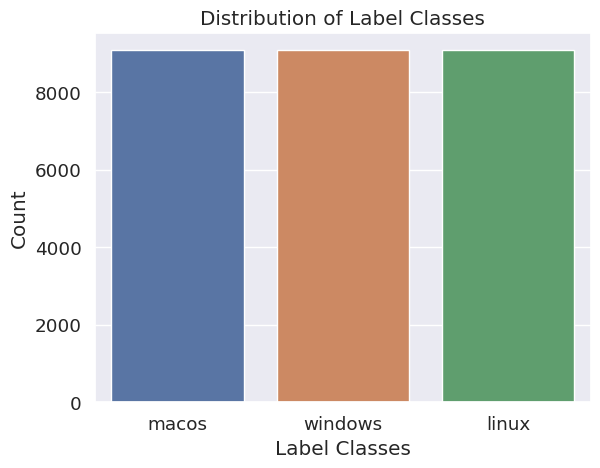

In [ ]:
# Now, we can visualise the distribution of our label classes again
# Count the occurrences of each label class
label_counts = balanced_data['osf'].value_counts()

# Create a bar plot
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.xlabel('Label Classes')
plt.ylabel('Count')
plt.title('Distribution of Label Classes')
plt.show()

As seen in the above bar plot, all label classes (Windows, Linux and MacOS) are now evenly distributed.

In [ ]:
# Display the first few rows of a dataframe named balanced_data
balanced_data.head()

tls.ja3  tls.handshake.ciphersuite.ch  tcp.options.syn  \
0       60                             0                2   
1        6                            26                1   
2       49                            12                1   
3        6                            26                3   
4       63                            25                3   

   tls.record.version.ch  tcp.options.mss_val.syn  ip.len.syn  tls.ja3sCnt  \
0                      1                      0.0    2.042662          0.0   
1                      1                      0.0   -0.690017          0.0   
2                      2                      0.0   -0.690017          0.0   
3                      1                      0.0    1.131769          0.0   
4                      1                      0.0    1.131769          0.0   

   tcp.window_size_value.syn  tcp.options.sack_perm.syn  ip.ttl.syn  \
0                   1.733005                        0.0   -1.409612   
1                  -0.786974                        0.0    0.709415   
2                   1.733005                        0.0    0.709415   
3                   0.136238                        0.0   -1.409612   
4                   0.136238                        0.0   -1.409612   

   ip.flags.df.syn  ipProtocol  tcp.options.wscale.shift.syn  \
0              0.0         0.0                     -2.362792   
1              0.0         0.0                      0.542430   
2              0.0         0.0                      0.542430   
3              0.0         0.0                     -0.038614   
4              0.0         0.0                     -0.038614   

   tcp_flag_fin_ratio  tcp_flag_syn_ratio  tcp_flag_rst_ratio  \
0            1.546479           -0.128745           -0.443289   
1           -1.101399           -0.128745           -0.443289   
2           -1.101399           -0.128745           -0.443289   
3           -1.101399           -0.128745           -0.443289   
4            0.663853           -0.128745           -0.443289   

   tcp_flag_psh_ratio  tcp_flag_ack_ratio  tcp_flag_urg_ratio      osf  
0           -0.085126            0.104457                 0.0    macos  
1            1.702823            1.058350                 0.0  windows  
2            1.290219            0.984973                 0.0  windows  
3            1.015150            1.058350                 0.0    linux  
4           -0.772799           -0.776059                 0.0    linux

In [ ]:
# Overwrite train data
train_data = balanced_data.copy()

In [ ]:
# Separate them again
X_train = train_data.drop('osf', axis = 1)
y_train = train_data.osf

Carryout Label Encoding of target (osf)

In [ ]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

## **Feature Selection**

###**Using correlation for feature selection**

This will help choose features that have high correlation with the label

In [ ]:
import numpy as np
train_data['osf'] = y_train
# Calculate the correlation matrix
correlation_matrix = train_data.corr()
y = 'osf'

# Set the threshold for feature selection based on correlation
threshold = 0.1

# Create a mask of features with correlation above the threshold
# It checks the absolute value of the correlation with the y axis for each column; if it is greater than the threshold, it displays True, else, False
correlation_mask = np.abs(correlation_matrix[y].values) > threshold

# Get the indices of selected features; it only picks the indices of the true value
selected_indices = np.where(correlation_mask)[0]

# Get the names of selected features; it displays the feature name of selected_indices in the order of its true value
selected_features = list(train_data.columns[selected_indices])

# Print the selected features
print(selected_features)
print(len(selected_features))

# Remove the target from the list of selected features
selected_features.remove('osf')
print(selected_features)
print(len(selected_features))

['tls.ja3', 'tcp.options.syn', 'tls.record.version.ch', 'ip.len.syn', 'tcp.window_size_value.syn', 'ip.ttl.syn', 'tcp.options.wscale.shift.syn', 'tcp_flag_syn_ratio', 'osf']
9
['tls.ja3', 'tcp.options.syn', 'tls.record.version.ch', 'ip.len.syn', 'tcp.window_size_value.syn', 'ip.ttl.syn', 'tcp.options.wscale.shift.syn', 'tcp_flag_syn_ratio']
8


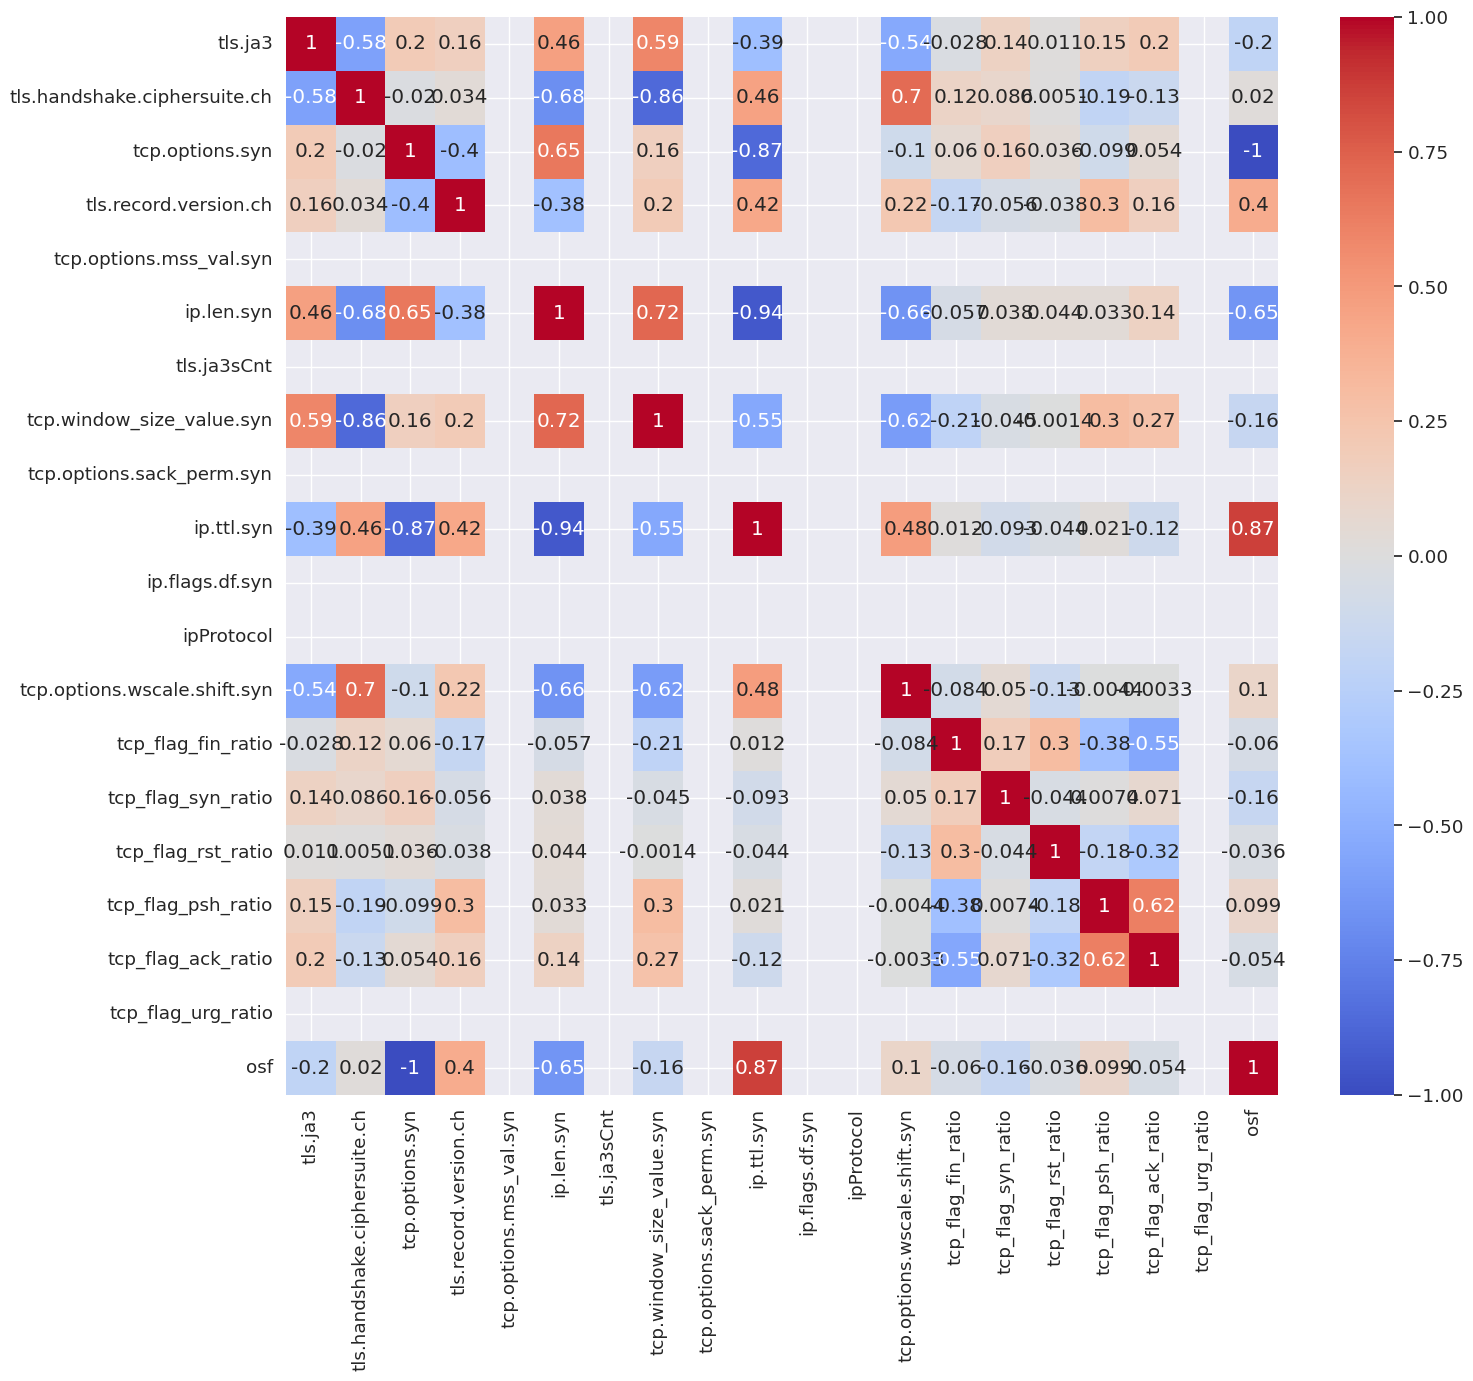

In [ ]:
# Correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(16, 14))

# Create a custom colormap with distinct colors for selected features
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Create the correlation heatmap using seaborn's heatmap function
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Display the plot
plt.show()

As observed from the above correlation heatmap, the higher the correlation value, the more intense the color of the interesting cells.

Only features with correlation values against the target of greater than or equal to 0.1 were chosen in our feature selection as seen from the heatmap

In [ ]:
correlation_matrix

tls.ja3  tls.handshake.ciphersuite.ch  \
tls.ja3                       1.000000                     -0.581735   
tls.handshake.ciphersuite.ch -0.581735                      1.000000   
tcp.options.syn               0.198978                     -0.019888   
tls.record.version.ch         0.163101                      0.034500   
tcp.options.mss_val.syn            NaN                           NaN   
ip.len.syn                    0.463895                     -0.680678   
tls.ja3sCnt                        NaN                           NaN   
tcp.window_size_value.syn     0.588618                     -0.862648   
tcp.options.sack_perm.syn          NaN                           NaN   
ip.ttl.syn                   -0.392998                      0.458838   
ip.flags.df.syn                    NaN                           NaN   
ipProtocol                         NaN                           NaN   
tcp.options.wscale.shift.syn -0.535885                      0.703652   
tcp_flag_fin_ratio           -0.028180                      0.120308   
tcp_flag_syn_ratio            0.136327                      0.086250   
tcp_flag_rst_ratio            0.010779                      0.005119   
tcp_flag_psh_ratio            0.153551                     -0.191599   
tcp_flag_ack_ratio            0.197926                     -0.134181   
tcp_flag_urg_ratio                 NaN                           NaN   
osf                          -0.198978                      0.019888   

                              tcp.options.syn  tls.record.version.ch  \
tls.ja3                              0.198978               0.163101   
tls.handshake.ciphersuite.ch        -0.019888               0.034500   
tcp.options.syn                      1.000000              -0.403007   
tls.record.version.ch               -0.403007               1.000000   
tcp.options.mss_val.syn                   NaN                    NaN   
ip.len.syn                           0.654654              -0.375250   
tls.ja3sCnt                               NaN                    NaN   
tcp.window_size_value.syn            0.161715               0.196887   
tcp.options.sack_perm.syn                 NaN                    NaN   
ip.ttl.syn                          -0.866025               0.422712   
ip.flags.df.syn                           NaN                    NaN   
ipProtocol                                NaN                    NaN   
tcp.options.wscale.shift.syn        -0.103588               0.223255   
tcp_flag_fin_ratio                   0.060363              -0.168231   
tcp_flag_syn_ratio                   0.157594              -0.055766   
tcp_flag_rst_ratio                   0.035702              -0.038205   
tcp_flag_psh_ratio                  -0.098641               0.297075   
tcp_flag_ack_ratio                   0.053548               0.161995   
tcp_flag_urg_ratio                        NaN                    NaN   
osf                                 -1.000000               0.403007   

                              tcp.options.mss_val.syn  ip.len.syn  \
tls.ja3                                           NaN    0.463895   
tls.handshake.ciphersuite.ch                      NaN   -0.680678   
tcp.options.syn                                   NaN    0.654654   
tls.record.version.ch                             NaN   -0.375250   
tcp.options.mss_val.syn                           NaN         NaN   
ip.len.syn                                        NaN    1.000000   
tls.ja3sCnt                                       NaN         NaN   
tcp.window_size_value.syn                         NaN    0.720733   
tcp.options.sack_perm.syn                         NaN         NaN   
ip.ttl.syn                                        NaN   -0.944911   
ip.flags.df.syn                                   NaN         NaN   
ipProtocol                                        NaN         NaN   
tcp.options.wscale.shift.syn                      NaN   -0.661232   
tcp_flag_fin_ratio                     

In [ ]:
correlation_mask

array([ True, False,  True,  True, False,  True, False,  True, False,
        True, False, False,  True, False,  True, False, False, False,
       False,  True])

In [ ]:
np.where(correlation_mask)[0]

array([ 0,  2,  3,  5,  7,  9, 12, 14, 19])

In [ ]:
# Call this feature selection as first
X_train_first = X_train[selected_features]
X_test_first = X_test[selected_features]

###Using Principal Component Analysis (PCA)

In [ ]:
from sklearn.decomposition import PCA
# Initialise PCA with the number of components
components = 10
pca = PCA(n_components=components)

# Fit PCA on the data
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
# Convert PCA-transformed data to a dataframe
X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(components)])
X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f'PC{i+1}' for i in range(components)])

In [ ]:
columns=[f'PC{i+1}' for i in range(components)]
print (columns)

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']


In [ ]:
# Call this feature selection as second
X_train_second = X_train_pca_df
X_test_second = X_test_pca_df

##**Model Selection**

Random Forest (RF), Support Vector Machine (SVM) and Gradient Boosting Machine (GBM) classifier models will be used for training.

**Random Forest** which is an ensemble learning technique, is particularly well-suited for our problem domain of predicting operating systems based on network traffic information. This is because it is robust against noise and outliers, which is essential when dealing with real-world network data that might have inconsistencies. RF's ensemble approach reduces overfitting, which means it doesn't memorise the training data but rather generalises well to unseen data. This model handles both numerical and categorical features well, making it a perfect choice for our dataset. Operating systems could exhibit varying behaviors in network traffic, and RF's ability to capture non-linear relationships ensures it's well-equipped to identify these intricate patterns.

**Support Vector Machine** is another perfect model for our task due to its efficacy in handling high-dimensional data like network features.
It is able to discern clear boundaries between different operating systems based on network attributes and by selecting the optimal hyperplane that maximises the margin between classes. SVM's capability to find complex decision boundaries helps to differentiate these behaviors accurately. Given that SVM aims to maximise the margin between classes, it can effectively separate different operating system behaviors in our dataset. SVM can handle high-dimensional data and find the best way to separate classes.

**Gradient Boosting Machine** is another viable choice, particularly if the variations of network traffic data can strongly impact the prediction of operating systems. Gradient Boosting combines the strengths of multiple decision trees to create a powerful model. The iterative nature of GBM allows it to uncover intricate patterns within the data. Gradient Boosting can capture non linear and complicated patterns effectively. It is proficient in handling mixed data types and can handle the kind of feature engineering that we have performed on our dataset. GBM's ensemble approach can lead to highly accurate predictions, reducing bias in the model, which makes it better at capturing subtle differences between operating systems.

We chose not to train with some other popular models like Naive Bayes Classification, and K Nearest Neighbors. Our reasons can be seen below:

**Naive Bayes Classifier** assumes that the features are conditionally independent given the class label. However, in network traffic data, features might not be independent, as different features can be related to each other due to the nature of network protocols. This Naive Bayes  assumption does not hold true for our dataset, and this could lead to suboptimal performance.

**K-Nearest Neighbors (KNN)** relies on finding similar instances based on distance metrics. In the context of network traffic data, and particularly our dataset, the dimensionality of the feature space is high, and the concept of "distance" between instances might not be well-defined. High dimensionality can lead to the "curse of dimensionality," where distance-based algorithms like KNN become less effective and computationally expensive. Also, KNN will not work well if the data is imbalanced, as it will be biased toward the majority class.

##**Model training**

In [ ]:

#We create an array for storing all the performance metric for each iteration of model training that we do

graph_data = {}

###Train using the first set of features from correlation

--- Random Forest Classifier ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[ 3850     0     0]
 [    0  1406     0]
 [    0     0 10509]]


--- Support Vector Machine ---
Accuracy: 0.9999365683476055
Precision: 0.999936584819081
Recall: 0.9999365683476055
F1 Score: 0.9999365611832534
Confusion Matrix:
 [[ 3850     0     0]
 [    1  1405     0]
 [    0     0 10509]]


--- Gradient Boosting Machine ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[ 3850     0     0]
 [    0  1406     0]
 [    0     0 10509]]




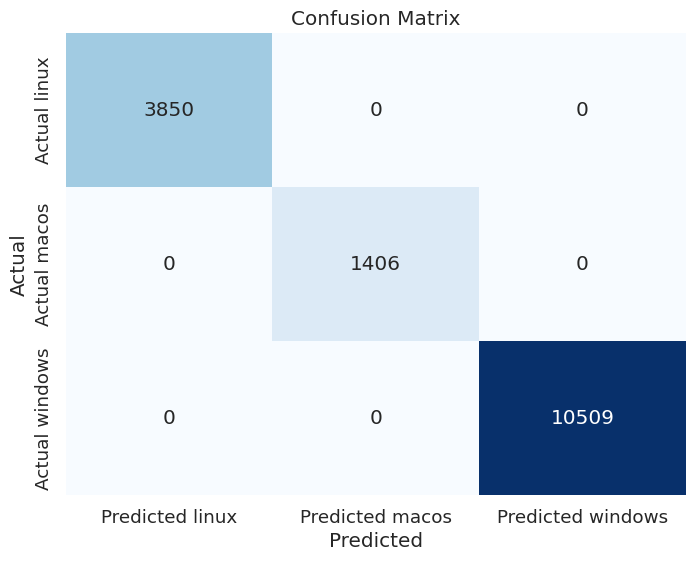

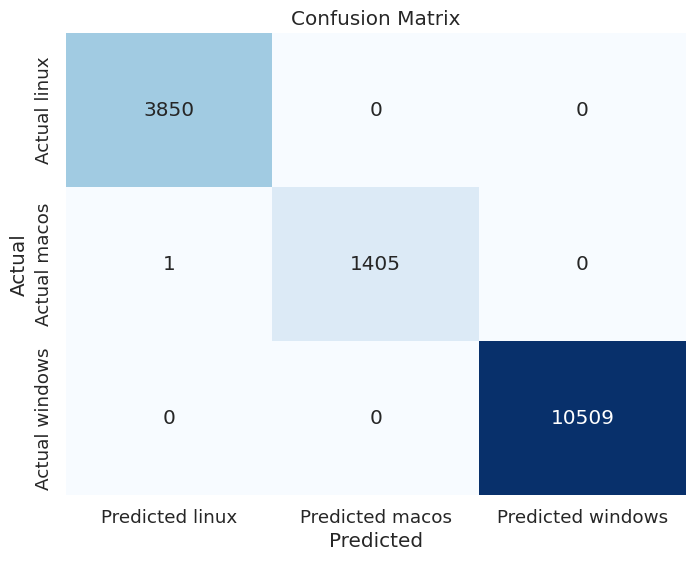

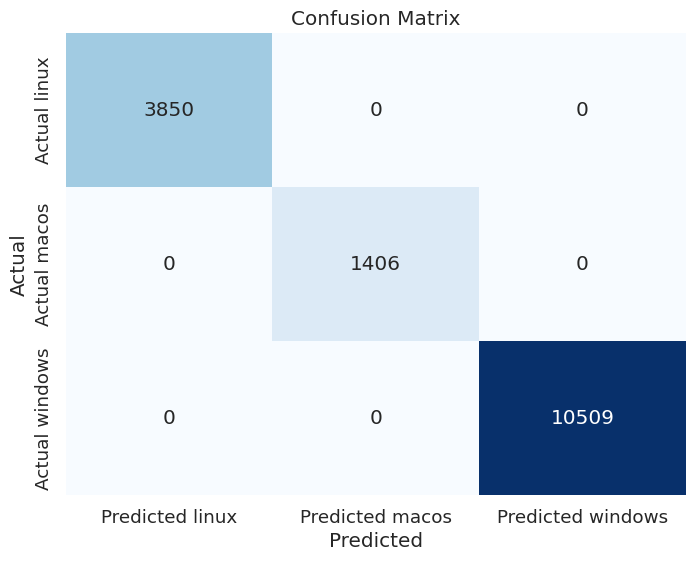

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_first, y_train)
rf_predictions = rf_classifier.predict(X_test_first)

# Gradient Boosting Machine
gbm_classifier = GradientBoostingClassifier()
gbm_classifier.fit(X_train_first, y_train)
gbm_predictions = gbm_classifier.predict(X_test_first)

# Support Vector Machine
svm_classifier = SVC()
svm_classifier.fit(X_train_first, y_train)
svm_predictions = svm_classifier.predict(X_test_first)

# Evaluation Metrics
def evaluate_model(predictions, model_name):
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')
    confusion = confusion_matrix(y_test, predictions)

    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:\n", confusion)
    print("\n")

    #Store performance
    graph_data['corr_features'] = [accuracy, precision, recall, f1]
    #Create heatmap for confusion matrix
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)  # Adjust the font size for clarity
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted linux', 'Predicted macos', 'Predicted windows'],
                yticklabels=['Actual linux', 'Actual macos', 'Actual windows'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')

evaluate_model(rf_predictions, "Random Forest Classifier")
evaluate_model(svm_predictions, "Support Vector Machine")
evaluate_model(gbm_predictions, "Gradient Boosting Machine")

###Train using the second set of features from PCA

--- Random Forest Classifier ---
Accuracy: 0.9999365683476055
Precision: 0.999936584819081
Recall: 0.9999365683476055
F1 Score: 0.9999365611832534
Confusion Matrix:
 [[ 3850     0     0]
 [    1  1405     0]
 [    0     0 10509]]


--- Support Vector Machine ---
Accuracy: 0.9997462733904218
Precision: 0.9997465367288852
Recall: 0.9997462733904218
F1 Score: 0.9997461585422615
Confusion Matrix:
 [[ 3850     0     0]
 [    4  1402     0]
 [    0     0 10509]]


--- Gradient Boosting Machine ---
Accuracy: 0.9597843323818586
Precision: 0.9654704905598027
Recall: 0.9597843323818586
F1 Score: 0.955460769451204
Confusion Matrix:
 [[ 3850     0     0]
 [  634   772     0]
 [    0     0 10509]]




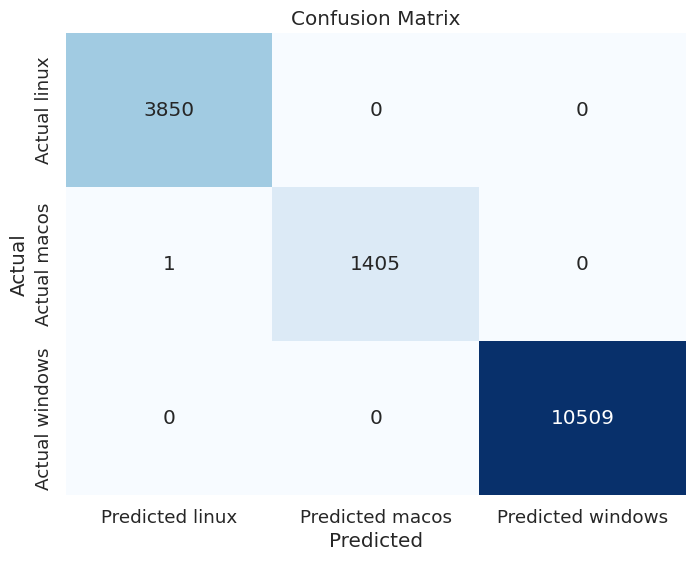

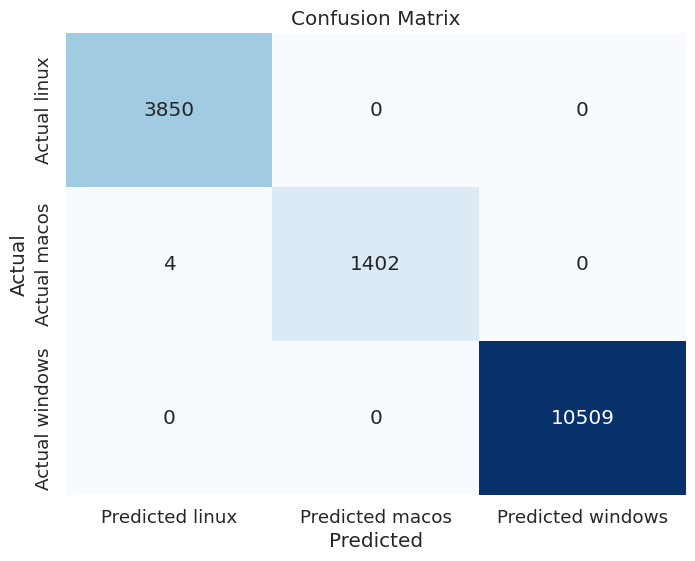

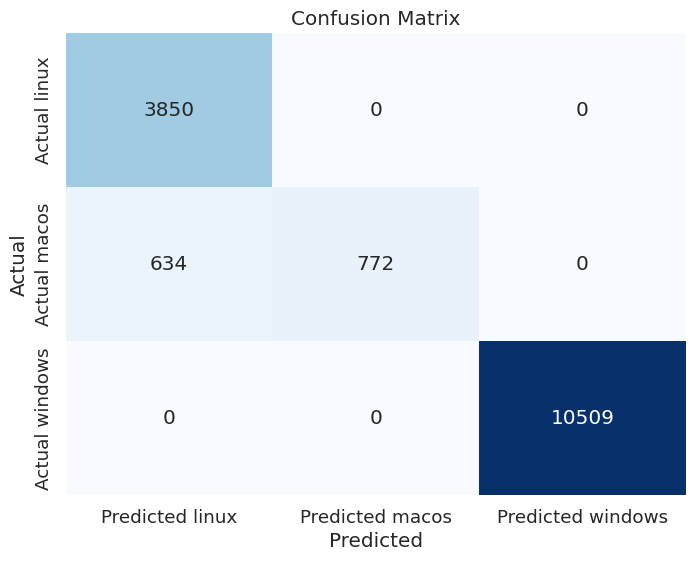

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_second, y_train)
rf_predictions = rf_classifier.predict(X_test_second)

# Gradient Boosting Machine
gbm_classifier = GradientBoostingClassifier()
gbm_classifier.fit(X_train_second, y_train)
gbm_predictions = gbm_classifier.predict(X_test_second)

# Support Vector Machine
svm_classifier = SVC()
svm_classifier.fit(X_train_second, y_train)
svm_predictions = svm_classifier.predict(X_test_second)

# Evaluation Metrics
def evaluate_model(predictions, model_name):
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')
    confusion = confusion_matrix(y_test, predictions)

    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:\n", confusion)
    print("\n")

    #Store performance
    graph_data['pca_features'] = [accuracy, precision, recall, f1]

    #Create heatmap for confusion matrix
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)  # Adjust the font size for clarity
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted linux', 'Predicted macos', 'Predicted windows'],
                yticklabels=['Actual linux', 'Actual macos', 'Actual windows'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
evaluate_model(rf_predictions, "Random Forest Classifier")
evaluate_model(svm_predictions, "Support Vector Machine")
evaluate_model(gbm_predictions, "Gradient Boosting Machine")

#**Model Optimisation**

As seen in the result above, the model is too good to be true; this could possibly be a sign of overfitting.

It was observed that tls.ja3 feature is a high cardinality feature.  It is like a unique identifier, so there are chances of getting an entire different (new) values in future dataset. Therefore, label encoding may not be ideal since it may lead to overfitting as observed above.

The performance of the models are very high, but those models may perform poorly in future datasets since it appears like all the given fingerprint (tls.ja3 identifiers) were memorised, and we want what the operating system each identifies with, without learning a pattern that will help for generalisation.

####First step will be to drop the tls.ja3 feature and observe the changes

In [ ]:
# Pick up from after imputation, also pick up y memories

# Now, we overwrite the main dataframe
X_train = train_imputed.copy()
X_test = test_imputed.copy()

# Pick the y memories
y_train = y_train_memory.copy()
y_test = y_test_memory.copy()

In [ ]:
# Standardisation
from sklearn.preprocessing import StandardScaler
# Create the StandardScaler instance
scaler = StandardScaler()
# Below checks for the numerical_features in X_train, fits, transforms it and saves it back as the same feature
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])

# Transform the test data using the scaler fitted on the training data
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [ ]:
# We will not include tls.ja3 in selected_feature

# Now, we store the selected categorical features
selected_categorical_features = ['tls.handshake.ciphersuite.ch', 'tcp.options.syn', 'tls.record.version.ch']

In [ ]:
# We then combine the selected_categorical_features and numerical features for X_train and X_test

# Note that we have not worked on numerical features, only categorical features
X_train = X_train[selected_categorical_features + numerical_features]
X_test = X_test[selected_categorical_features + numerical_features]

In [ ]:
# Label encoding of categorical features
from sklearn.preprocessing import LabelEncoder
# Create LabelEncoder instances for each categorical feature
encoder_ciphersuite = LabelEncoder()
encoder_record_version = LabelEncoder()
encoder_tcp_options = LabelEncoder()

#Create a duplicate first
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

# Fit and transform training data
X_train_copy['tls.handshake.ciphersuite.ch'] = encoder_ciphersuite.fit_transform(X_train['tls.handshake.ciphersuite.ch'])
X_train_copy['tls.record.version.ch'] = encoder_record_version.fit_transform(X_train['tls.record.version.ch'])
X_train_copy['tcp.options.syn'] = encoder_tcp_options.fit_transform(X_train['tcp.options.syn'])

# Transform test data using the same encoders
X_test_copy['tls.handshake.ciphersuite.ch'] = encoder_ciphersuite.transform(X_test['tls.handshake.ciphersuite.ch'])
X_test_copy['tls.record.version.ch'] = encoder_record_version.transform(X_test['tls.record.version.ch'])
X_test_copy['tcp.options.syn'] = encoder_tcp_options.transform(X_test['tcp.options.syn'])

X_train = X_train_copy.copy()
X_test = X_test_copy.copy()

In [ ]:
# We perform resampling

# Let us combine back X_train and y_train into train_data
train_data = X_train.copy()
train_data['osf'] = y_train


# Now, we separate the data into three separate dataframes based on the different classes
df_windows = train_data[train_data['osf'] == 'windows']
df_linux = train_data[train_data['osf'] == 'linux']
df_macos = train_data[train_data['osf'] == 'macos']

# Let us downsample the "Windows" class to the size of the "Linux" class using random sampling without replacement.
df_windows_downsampled = df_windows.sample(len(df_linux), replace=False)

# Let us upsample the "MacOS" class to the size of the "Linux" class using random sampling with replacement.
df_macos_upsampled = df_macos.sample(len(df_linux), replace=True)

# Let us concatenate the downsampled "Windows" dataframe, upsampled "MacOS" dataframe, and the original "Linux" dataframe to create the balanced dataset.
balanced_data = pd.concat([df_windows_downsampled, df_macos_upsampled, df_linux])

# Let us shuffle the rows of the balanced dataset to randomise the order.
balanced_data = balanced_data.sample(frac=1).reset_index(drop=True)
balanced_data.head()

tls.handshake.ciphersuite.ch  tcp.options.syn  tls.record.version.ch  \
0                             3                2                      1   
1                            25                3                      1   
2                            23                1                      1   
3                            23                1                      1   
4                             0                2                      1   

   tcp.options.mss_val.syn  ip.len.syn  tls.ja3sCnt  \
0                      0.0    2.042662          0.0   
1                      0.0    1.131769          0.0   
2                      0.0   -0.690017          0.0   
3                      0.0   -0.690017          0.0   
4                      0.0    2.042662          0.0   

   tcp.window_size_value.syn  tcp.options.sack_perm.syn  ip.ttl.syn  \
0                   1.733005                        0.0   -1.409612   
1                   0.136238                        0.0   -1.409612   
2                  -0.786974                        0.0    0.709415   
3                  -0.786974                        0.0    0.709415   
4                   1.733005                        0.0   -1.409612   

   ip.flags.df.syn  ipProtocol  tcp.options.wscale.shift.syn  \
0              0.0         0.0                     -1.200703   
1              0.0         0.0                     -0.038614   
2              0.0         0.0                      0.542430   
3              0.0         0.0                      0.542430   
4              0.0         0.0                     -2.362792   

   tcp_flag_fin_ratio  tcp_flag_syn_ratio  tcp_flag_rst_ratio  \
0           -1.101399           -0.128745           -0.443289   
1            0.663853           -0.128745           -0.443289   
2           -1.101399           -0.128745           -0.443289   
3            0.663853           -0.128745           -0.443289   
4           -1.101399           -0.128745           -0.443289   

   tcp_flag_psh_ratio  tcp_flag_ack_ratio  tcp_flag_urg_ratio      osf  
0           -0.497730            1.058350                 0.0    macos  
1           -1.047868           -1.289694                 0.0    linux  
2           -0.635264            1.058350                 0.0  windows  
3            0.465012            0.618091                 0.0  windows  
4           -0.222661            1.058350                 0.0    macos

In [ ]:
# Check to ensure no missing value was introduced during resampling
missing_values = balanced_data.isnull().sum()
print(missing_values)

# Overwrite train data
train_data = balanced_data.copy()

tls.handshake.ciphersuite.ch    0
tcp.options.syn                 0
tls.record.version.ch           0
tcp.options.mss_val.syn         0
ip.len.syn                      0
tls.ja3sCnt                     0
tcp.window_size_value.syn       0
tcp.options.sack_perm.syn       0
ip.ttl.syn                      0
ip.flags.df.syn                 0
ipProtocol                      0
tcp.options.wscale.shift.syn    0
tcp_flag_fin_ratio              0
tcp_flag_syn_ratio              0
tcp_flag_rst_ratio              0
tcp_flag_psh_ratio              0
tcp_flag_ack_ratio              0
tcp_flag_urg_ratio              0
osf                             0
dtype: int64


In [ ]:
# We then carryout Label Encoding of target/label

# Before then, we separate them again
X_train = train_data.drop('osf', axis = 1)
y_train = train_data.osf

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

####Using correlation based feature selection

In [ ]:
import numpy as np
train_data['osf'] = y_train
# Calculate the correlation matrix
correlation_matrix = train_data.corr()
y_name = 'osf'

# Set the threshold for feature selection based on correlation
threshold = 0.1

# Create a mask of features with correlation above the threshold
# It checks the absolute value of the correlation with the y axis for each column; if it is greater than the threshold, it displays True, else, False
correlation_mask = np.abs(correlation_matrix[y_name].values) > threshold

# Get the indices of selected features; it only picks the indices of the true value
selected_indices = np.where(correlation_mask)[0]

# Get the names of selected features; it displays the feature name of selected_indices in the order of its true value
selected_features = list(train_data.columns[selected_indices])

# Print the selected features
print(selected_features)
print(len(selected_features))

# Remove the target from the list of selected features
selected_features.remove('osf')
print(selected_features)
print(len(selected_features))

['tcp.options.syn', 'tls.record.version.ch', 'ip.len.syn', 'tcp.window_size_value.syn', 'ip.ttl.syn', 'tcp.options.wscale.shift.syn', 'tcp_flag_syn_ratio', 'osf']
8
['tcp.options.syn', 'tls.record.version.ch', 'ip.len.syn', 'tcp.window_size_value.syn', 'ip.ttl.syn', 'tcp.options.wscale.shift.syn', 'tcp_flag_syn_ratio']
7


In [ ]:
# Call this feature selection as first
X_train_first = X_train[selected_features]
X_test_first = X_test[selected_features]

####**Using PCA based feature selection**

In [ ]:
from sklearn.decomposition import PCA
# Initialize PCA with the number of components
components = 10
pca = PCA(n_components=components)

# Fit PCA on the data
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
# Convert PCA-transformed data to a dataframe
X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(components)])
X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f'PC{i+1}' for i in range(components)])

# Call this feature selection as second
X_train_second = X_train_pca_df
X_test_second = X_test_pca_df

#####**Performing model training with first set of features (Correlation)**

--- Random Forest Classifier ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[ 3850     0     0]
 [    0  1406     0]
 [    0     0 10509]]


--- Support Vector Machine ---
Accuracy: 0.9999365683476055
Precision: 0.9999366134305141
Recall: 0.9999365683476055
F1 Score: 0.9999365755028659
Confusion Matrix:
 [[ 3849     1     0]
 [    0  1406     0]
 [    0     0 10509]]


--- Gradient Boosting Machine ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[ 3850     0     0]
 [    0  1406     0]
 [    0     0 10509]]




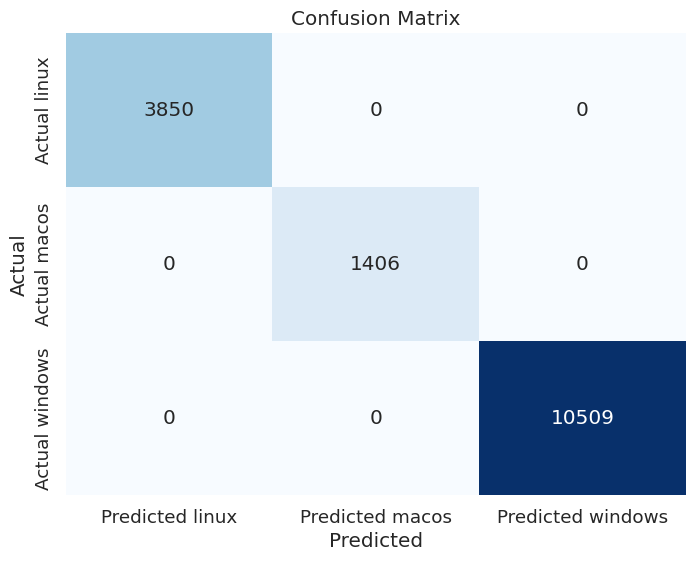

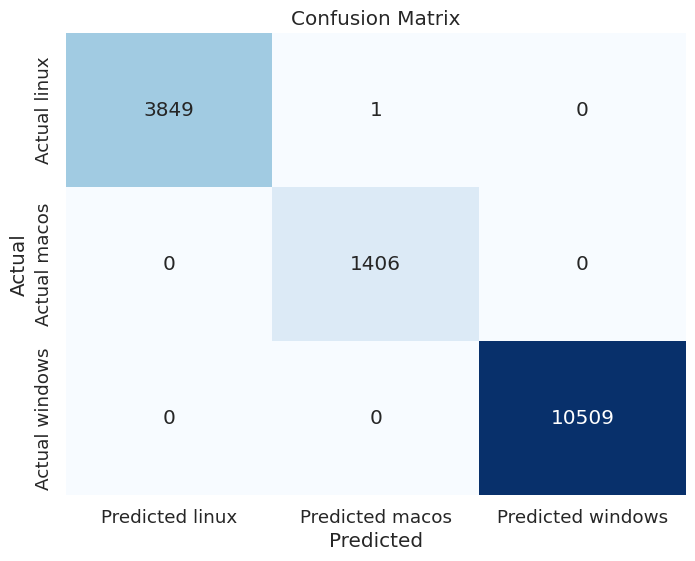

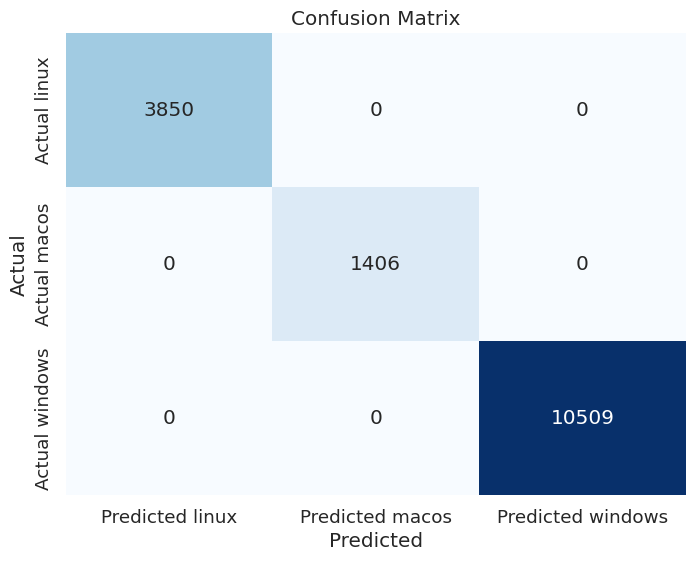

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_first, y_train)
rf_predictions = rf_classifier.predict(X_test_first)

# Gradient Boosting Machine
gbm_classifier = GradientBoostingClassifier()
gbm_classifier.fit(X_train_first, y_train)
gbm_predictions = gbm_classifier.predict(X_test_first)

# Support Vector Machine
svm_classifier = SVC()
svm_classifier.fit(X_train_first, y_train)
svm_predictions = svm_classifier.predict(X_test_first)

# Evaluation Metrics
def evaluate_model(predictions, model_name):
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')
    confusion = confusion_matrix(y_test, predictions)

    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:\n", confusion)
    print("\n")

    #Store performance
    graph_data['corr_features_no_tls.ja3'] = [accuracy, precision, recall, f1]    #Create heatmap for confusion matrix
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)  # Adjust the font size for clarity
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted linux', 'Predicted macos', 'Predicted windows'],
                yticklabels=['Actual linux', 'Actual macos', 'Actual windows'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
evaluate_model(rf_predictions, "Random Forest Classifier")
evaluate_model(svm_predictions, "Support Vector Machine")
evaluate_model(gbm_predictions, "Gradient Boosting Machine")

#####**Performing model training with second set of features (PCA components)**

--- Random Forest Classifier ---
Accuracy: 0.9999365683476055
Precision: 0.999936584819081
Recall: 0.9999365683476055
F1 Score: 0.9999365709569532
Confusion Matrix:
 [[ 3850     0     0]
 [    0  1406     0]
 [    1     0 10508]]


--- Support Vector Machine ---
Accuracy: 0.9998731366952109
Precision: 0.9998732025640089
Recall: 0.9998731366952109
F1 Score: 0.999873140374875
Confusion Matrix:
 [[ 3850     0     0]
 [    1  1405     0]
 [    1     0 10508]]


--- Gradient Boosting Machine ---
Accuracy: 0.9998097050428164
Precision: 0.9998098532091468
Recall: 0.9998097050428164
F1 Score: 0.9998097285160302
Confusion Matrix:
 [[ 3850     0     0]
 [    0  1406     0]
 [    3     0 10506]]




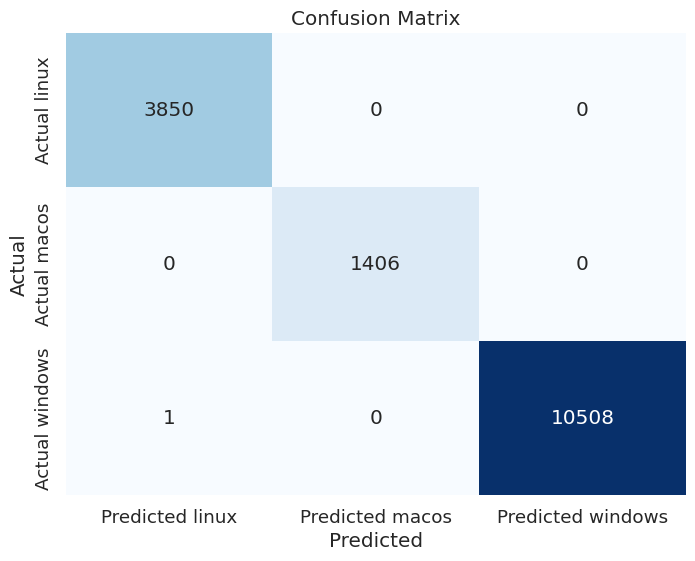

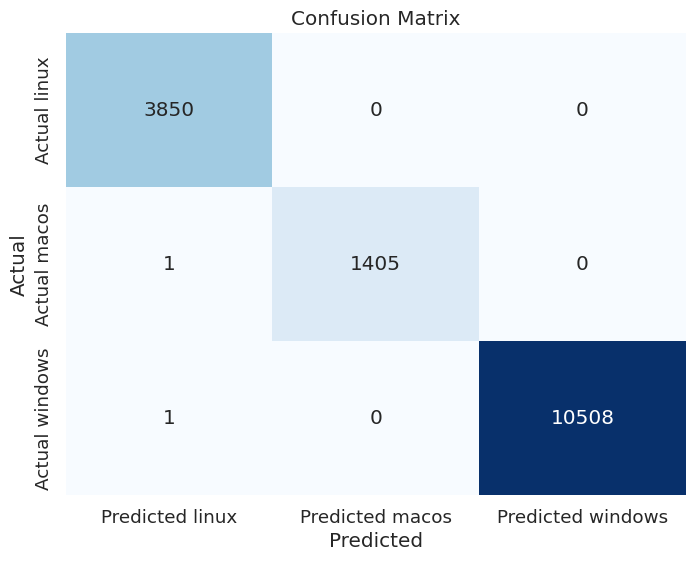

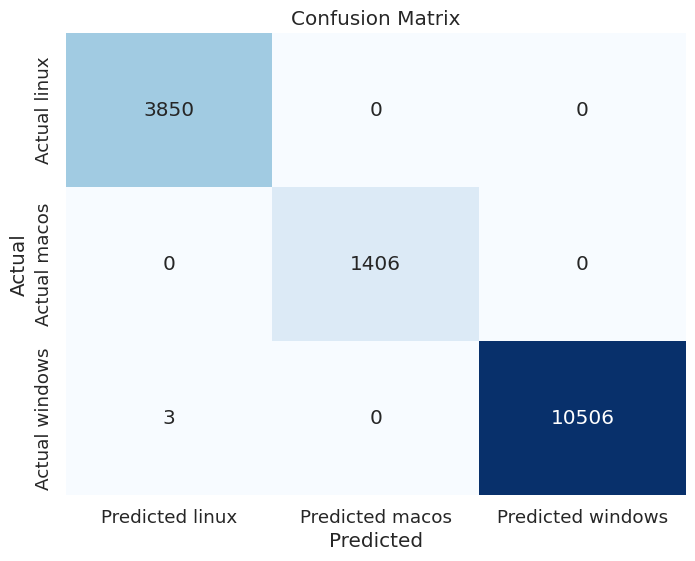

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_second, y_train)
rf_predictions = rf_classifier.predict(X_test_second)

# Gradient Boosting Machine
gbm_classifier = GradientBoostingClassifier()
gbm_classifier.fit(X_train_second, y_train)
gbm_predictions = gbm_classifier.predict(X_test_second)

# Support Vector Machine
svm_classifier = SVC()
svm_classifier.fit(X_train_second, y_train)
svm_predictions = svm_classifier.predict(X_test_second)

# Evaluation Metrics
def evaluate_model(predictions, model_name):
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')
    confusion = confusion_matrix(y_test, predictions)

    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:\n", confusion)
    print("\n")

    #Store performance
    graph_data['pca_features_no_tls.ja3'] = [accuracy, precision, recall, f1]
    #Create heatmap for confusion matrix
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)  # Adjust the font size for clarity
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted linux', 'Predicted macos', 'Predicted windows'],
                yticklabels=['Actual linux', 'Actual macos', 'Actual windows'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
evaluate_model(rf_predictions, "Random Forest Classifier")
evaluate_model(svm_predictions, "Support Vector Machine")
evaluate_model(gbm_predictions, "Gradient Boosting Machine")

#####From the steps above, we can see that removing tls.ja3 had no effect on the model overfitting. We still have very extreme performance values.

#### Next, let's remove all the selected features gotten from the correlation feature selection method we used earlier to see if the suspected overfitting is caused by one of those selected features.

In [ ]:
X_train.head()

tls.handshake.ciphersuite.ch  tcp.options.syn  tls.record.version.ch  \
0                             3                2                      1   
1                            25                3                      1   
2                            23                1                      1   
3                            23                1                      1   
4                             0                2                      1   

   tcp.options.mss_val.syn  ip.len.syn  tls.ja3sCnt  \
0                      0.0    2.042662          0.0   
1                      0.0    1.131769          0.0   
2                      0.0   -0.690017          0.0   
3                      0.0   -0.690017          0.0   
4                      0.0    2.042662          0.0   

   tcp.window_size_value.syn  tcp.options.sack_perm.syn  ip.ttl.syn  \
0                   1.733005                        0.0   -1.409612   
1                   0.136238                        0.0   -1.409612   
2                  -0.786974                        0.0    0.709415   
3                  -0.786974                        0.0    0.709415   
4                   1.733005                        0.0   -1.409612   

   ip.flags.df.syn  ipProtocol  tcp.options.wscale.shift.syn  \
0              0.0         0.0                     -1.200703   
1              0.0         0.0                     -0.038614   
2              0.0         0.0                      0.542430   
3              0.0         0.0                      0.542430   
4              0.0         0.0                     -2.362792   

   tcp_flag_fin_ratio  tcp_flag_syn_ratio  tcp_flag_rst_ratio  \
0           -1.101399           -0.128745           -0.443289   
1            0.663853           -0.128745           -0.443289   
2           -1.101399           -0.128745           -0.443289   
3            0.663853           -0.128745           -0.443289   
4           -1.101399           -0.128745           -0.443289   

   tcp_flag_psh_ratio  tcp_flag_ack_ratio  tcp_flag_urg_ratio  
0           -0.497730            1.058350                 0.0  
1           -1.047868           -1.289694                 0.0  
2           -0.635264            1.058350                 0.0  
3            0.465012            0.618091                 0.0  
4           -0.222661            1.058350                 0.0

In [ ]:
X_test.head()

tls.handshake.ciphersuite.ch  tcp.options.syn  tls.record.version.ch  \
46527                            16                1                      2   
41958                            19                3                      1   
47982                            23                1                      1   
10939                            26                1                      1   
35159                            12                1                      2   

       tcp.options.mss_val.syn  ip.len.syn  tls.ja3sCnt  \
46527                      0.0   -0.690017          0.0   
41958                      0.0    1.131769          0.0   
47982                      0.0   -0.690017          0.0   
10939                      0.0   -0.690017          0.0   
35159                      0.0   -0.690017          0.0   

       tcp.window_size_value.syn  tcp.options.sack_perm.syn  ip.ttl.syn  \
46527                   1.733005                        0.0    0.709415   
41958                   0.136238                        0.0   -1.409612   
47982                  -0.786974                        0.0    0.709415   
10939                  -0.786974                        0.0    0.709415   
35159                   1.733005                        0.0    0.709415   

       ip.flags.df.syn  ipProtocol  tcp.options.wscale.shift.syn  \
46527              0.0         0.0                      0.542430   
41958              0.0         0.0                     -0.038614   
47982              0.0         0.0                      0.542430   
10939              0.0         0.0                      0.542430   
35159              0.0         0.0                      0.542430   

       tcp_flag_fin_ratio  tcp_flag_syn_ratio  tcp_flag_rst_ratio  \
46527           -1.101399           -0.128745           -0.443289   
41958            0.663853           -0.128745           -0.443289   
47982            0.663853           -0.128745           -0.443289   
10939           -1.101399           -0.128745           -0.443289   
35159           -1.101399           -0.128745           -0.443289   

       tcp_flag_psh_ratio  tcp_flag_ack_ratio  tcp_flag_urg_ratio  
46527            1.565288            1.058350                 0.0  
41958           -0.085126            0.104457                 0.0  
47982           -0.085126            0.397962                 0.0  
10939            0.877616            1.058350                 0.0  
35159            2.115426            1.058350                 0.0

In [ ]:
# Dropping all selected_features
X_train_no_selected = X_train.drop(selected_features, axis=1)

In [ ]:
X_train_no_selected.head()

tls.handshake.ciphersuite.ch  tcp.options.mss_val.syn  tls.ja3sCnt  \
0                             3                      0.0          0.0   
1                            25                      0.0          0.0   
2                            23                      0.0          0.0   
3                            23                      0.0          0.0   
4                             0                      0.0          0.0   

   tcp.options.sack_perm.syn  ip.flags.df.syn  ipProtocol  tcp_flag_fin_ratio  \
0                        0.0              0.0         0.0           -1.101399   
1                        0.0              0.0         0.0            0.663853   
2                        0.0              0.0         0.0           -1.101399   
3                        0.0              0.0         0.0            0.663853   
4                        0.0              0.0         0.0           -1.101399   

   tcp_flag_rst_ratio  tcp_flag_psh_ratio  tcp_flag_ack_ratio  \
0           -0.443289           -0.497730            1.058350   
1           -0.443289           -1.047868           -1.289694   
2           -0.443289           -0.635264            1.058350   
3           -0.443289            0.465012            0.618091   
4           -0.443289           -0.222661            1.058350   

   tcp_flag_urg_ratio  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [ ]:
X_test_no_selected = X_test.drop(selected_features, axis=1)

In [ ]:
X_test_no_selected.head()

tls.handshake.ciphersuite.ch  tcp.options.mss_val.syn  tls.ja3sCnt  \
46527                            16                      0.0          0.0   
41958                            19                      0.0          0.0   
47982                            23                      0.0          0.0   
10939                            26                      0.0          0.0   
35159                            12                      0.0          0.0   

       tcp.options.sack_perm.syn  ip.flags.df.syn  ipProtocol  \
46527                        0.0              0.0         0.0   
41958                        0.0              0.0         0.0   
47982                        0.0              0.0         0.0   
10939                        0.0              0.0         0.0   
35159                        0.0              0.0         0.0   

       tcp_flag_fin_ratio  tcp_flag_rst_ratio  tcp_flag_psh_ratio  \
46527           -1.101399           -0.443289            1.565288   
41958            0.663853           -0.443289           -0.085126   
47982            0.663853           -0.443289           -0.085126   
10939           -1.101399           -0.443289            0.877616   
35159           -1.101399           -0.443289            2.115426   

       tcp_flag_ack_ratio  tcp_flag_urg_ratio  
46527            1.058350                 0.0  
41958            0.104457                 0.0  
47982            0.397962                 0.0  
10939            1.058350                 0.0  
35159            1.058350                 0.0

--- Random Forest Classifier ---
Accuracy: 0.8792261338407865
Precision: 0.8841221533024987
Recall: 0.8792261338407865
F1 Score: 0.8810162228916119
Confusion Matrix:
 [[3100    9  741]
 [  16 1386    4]
 [1127    7 9375]]


--- Support Vector Machine ---
Accuracy: 0.8617189977798921
Precision: 0.8565991350725578
Recall: 0.8617189977798921
F1 Score: 0.8567788367502838
Confusion Matrix:
 [[2412  226 1212]
 [  22 1384    0]
 [ 719    1 9789]]


--- Gradient Boosting Machine ---
Accuracy: 0.8896923564858864
Precision: 0.8886848684154167
Recall: 0.8896923564858864
F1 Score: 0.8890850634528219
Confusion Matrix:
 [[2911    0  939]
 [  21 1385    0]
 [ 779    0 9730]]




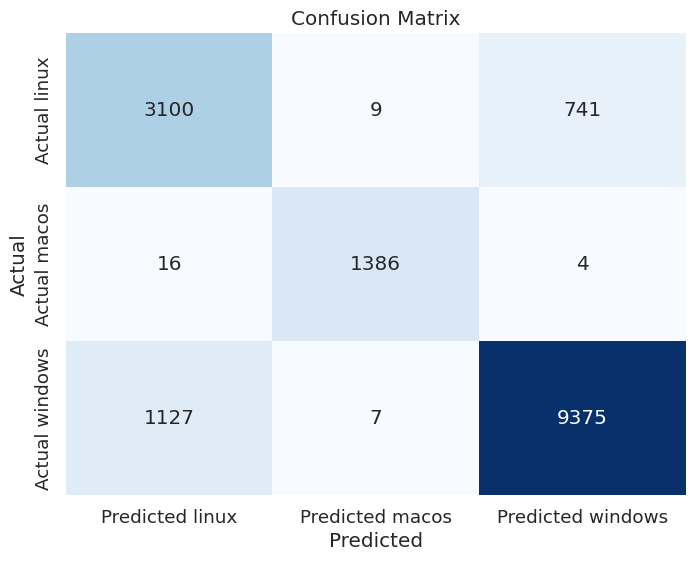

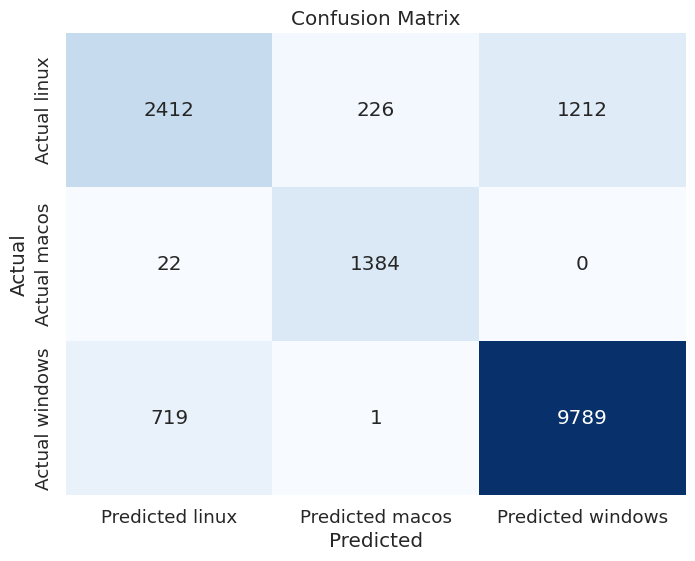

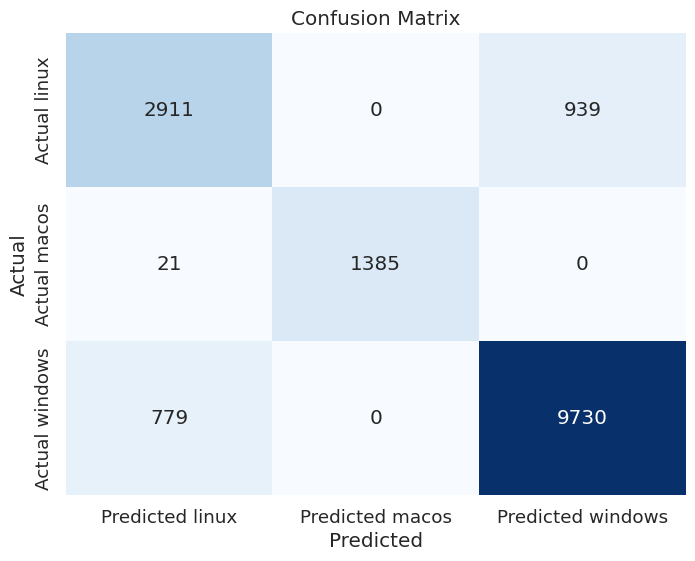

In [ ]:
# Performing model training
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_no_selected, y_train)
rf_predictions = rf_classifier.predict(X_test_no_selected)

# Gradient Boosting Machine
gbm_classifier = GradientBoostingClassifier()
gbm_classifier.fit(X_train_no_selected, y_train)
gbm_predictions = gbm_classifier.predict(X_test_no_selected)

# Support Vector Machine
svm_classifier = SVC()
svm_classifier.fit(X_train_no_selected, y_train)
svm_predictions = svm_classifier.predict(X_test_no_selected)

# Evaluation Metrics
def evaluate_model(predictions, model_name):
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')
    confusion = confusion_matrix(y_test, predictions)

    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:\n", confusion)
    print("\n")


    #Store performance
    graph_data['no_corr_features'] = [accuracy, precision, recall, f1]    #Create heatmap for confusion matrix
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)  # Adjust the font size for clarity
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted linux', 'Predicted macos', 'Predicted windows'],
                yticklabels=['Actual linux', 'Actual macos', 'Actual windows'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
evaluate_model(rf_predictions, "Random Forest Classifier")
evaluate_model(svm_predictions, "Support Vector Machine")
evaluate_model(gbm_predictions, "Gradient Boosting Machine")

The model performance has changed to more realistic values, this shows there exist among the selected features very highly correlated features. When we use the correlation method for feature selection, features that probably lead to overfitting are being picked.

To prevent that, we will combine a different feature selection technique called Recursive Feature Elimination (RFE) with cross-validation for our feature selection just to confirm that this suspected overfitting is not because of our feature selection technique.

####Let's try Recursive Feature Elimination (RFE) feature selection technique

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# Define the model
model = RandomForestClassifier()

# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the RFECV object
selector = RFECV(estimator=model, step=1, cv=cv, scoring='accuracy')

# Fit the selector to our training data
selector.fit(X_train, y_train)

# Get the selected features
selected_features_2 = X_train.columns[selector.support_]

In [ ]:
selected_features_2

Index(['tcp.options.syn'], dtype='object')

In [ ]:
# Transform our training and test data using the selected features
X_train_selected = X_train[selected_features_2]
X_test_selected = X_test[selected_features_2]

--- Random Forest Classifier ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[ 3850     0     0]
 [    0  1406     0]
 [    0     0 10509]]


--- Support Vector Machine ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[ 3850     0     0]
 [    0  1406     0]
 [    0     0 10509]]


--- Gradient Boosting Machine ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[ 3850     0     0]
 [    0  1406     0]
 [    0     0 10509]]




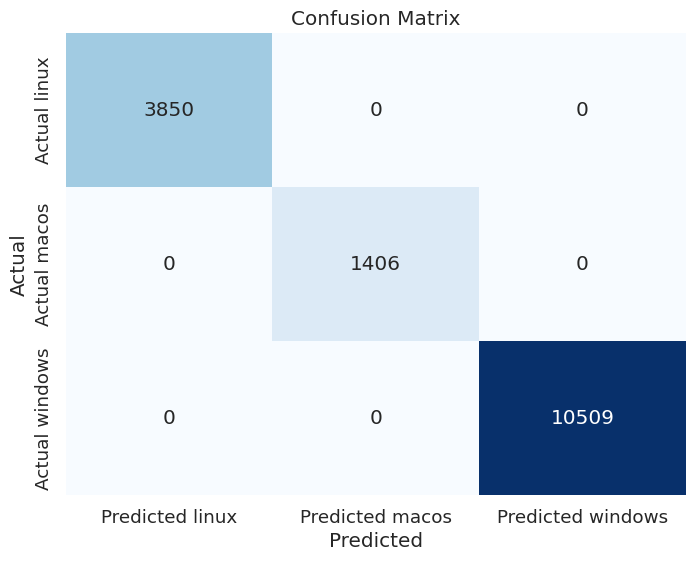

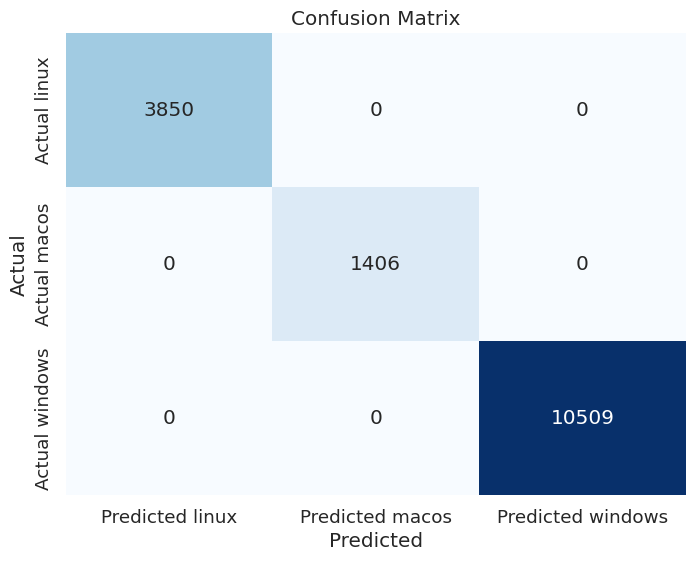

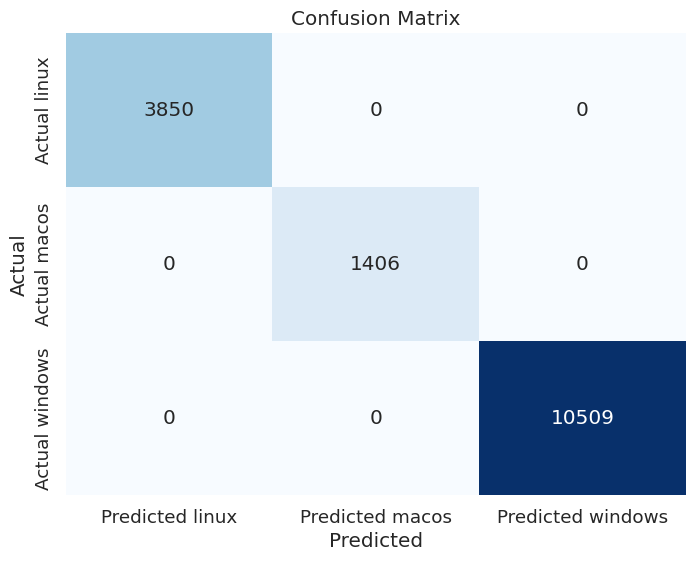

In [ ]:
#Training with newly selected RFE features
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_selected, y_train)
rf_predictions = rf_classifier.predict(X_test_selected)

# Gradient Boosting Machine
gbm_classifier = GradientBoostingClassifier()
gbm_classifier.fit(X_train_selected, y_train)
gbm_predictions = gbm_classifier.predict(X_test_selected)

# Support Vector Machine
svm_classifier = SVC()
svm_classifier.fit(X_train_selected, y_train)
svm_predictions = svm_classifier.predict(X_test_selected)

# Evaluation Metrics
def evaluate_model(predictions, model_name):
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')
    confusion = confusion_matrix(y_test, predictions)

    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:\n", confusion)
    print("\n")


    #Store performance
    graph_data['rfe_features'] = [accuracy, precision, recall, f1]

    #Create heatmap for confusion matrix
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)  # Adjust the font size for clarity
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted linux', 'Predicted macos', 'Predicted windows'],
                yticklabels=['Actual linux', 'Actual macos', 'Actual windows'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
evaluate_model(rf_predictions, "Random Forest Classifier")
evaluate_model(svm_predictions, "Support Vector Machine")
evaluate_model(gbm_predictions, "Gradient Boosting Machine")

--- Random Forest Classifier ---
Accuracy: 0.9998731366952109
Precision: 0.9998732025640089
Recall: 0.9998731366952109
F1 Score: 0.9998731471301759
Confusion Matrix:
 [[ 3850     0     0]
 [    0  1406     0]
 [    2     0 10507]]


--- Gradient Boosting Machine ---
Accuracy: 0.9998097050428164
Precision: 0.9998098532091468
Recall: 0.9998097050428164
F1 Score: 0.9998097285160302
Confusion Matrix:
 [[ 3850     0     0]
 [    0  1406     0]
 [    3     0 10506]]


--- Support Vector Machine ---
Accuracy: 0.9998731366952109
Precision: 0.9998732025640089
Recall: 0.9998731366952109
F1 Score: 0.999873140374875
Confusion Matrix:
 [[ 3850     0     0]
 [    1  1405     0]
 [    1     0 10508]]




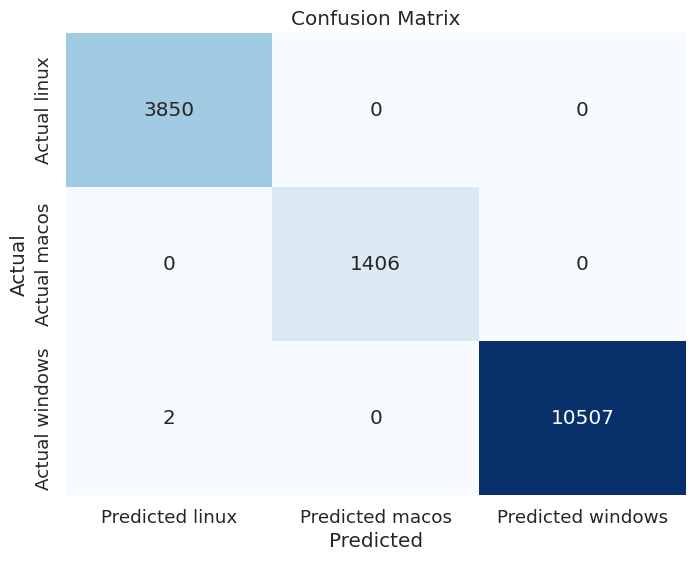

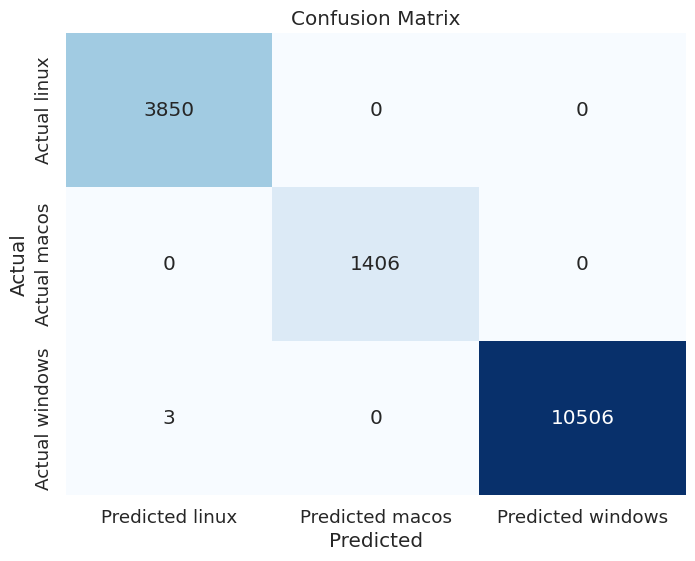

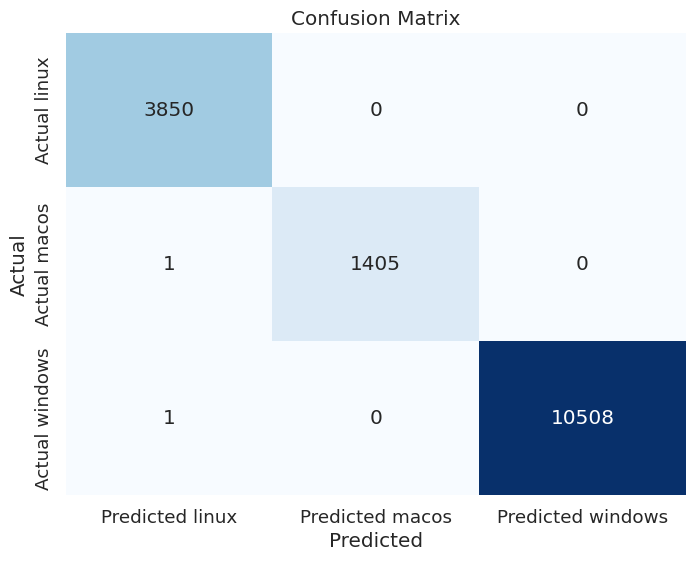

In [ ]:
# Let's check to confirm if it's a mistake (Not included in the report because PCA had been earlier tested. This was done to confirm that RFE and PCA results were close)

# Training with PCA selected features
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_second, y_train)
rf_predictions = rf_classifier.predict(X_test_second)

# Gradient Boosting Machine
gbm_classifier = GradientBoostingClassifier()
gbm_classifier.fit(X_train_second, y_train)
gbm_predictions = gbm_classifier.predict(X_test_second)

# Support Vector Machine
svm_classifier = SVC()
svm_classifier.fit(X_train_second, y_train)
svm_predictions = svm_classifier.predict(X_test_second)

# Evaluation Metrics
def evaluate_model(predictions, model_name):
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')
    confusion = confusion_matrix(y_test, predictions)

    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:\n", confusion)
    print("\n")

    #Create heatmap for confusion matrix
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)  # Adjust the font size for clarity
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted linux', 'Predicted macos', 'Predicted windows'],
                yticklabels=['Actual linux', 'Actual macos', 'Actual windows'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
evaluate_model(rf_predictions, "Random Forest Classifier")
evaluate_model(gbm_predictions, "Gradient Boosting Machine")
evaluate_model(svm_predictions, "Support Vector Machine")

The performance for all the models chosen is very impressive. To further ensure that this isn't overfitting happening due to the complex models we chose, we will adjust the default parameters used by our models during training.

####Readjusting the parameters of the complex models (Hyperparameter tuning)

--- Random Forest Classifier ---
Accuracy: 0.9737392959086584
Precision: 0.9753050732445816
Recall: 0.9737392959086584
F1 Score: 0.9737757084287008
Confusion Matrix:
 [[ 3497   226   127]
 [   22  1384     0]
 [   39     0 10470]]


--- Support Vector Machine ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[ 3850     0     0]
 [    0  1406     0]
 [    0     0 10509]]


--- Gradient Boosting Machine ---
Accuracy: 0.9613066920393276
Precision: 0.9634466425020887
Recall: 0.9613066920393276
F1 Score: 0.9618651664325546
Confusion Matrix:
 [[ 3581   226    43]
 [   22  1384     0]
 [  319     0 10190]]




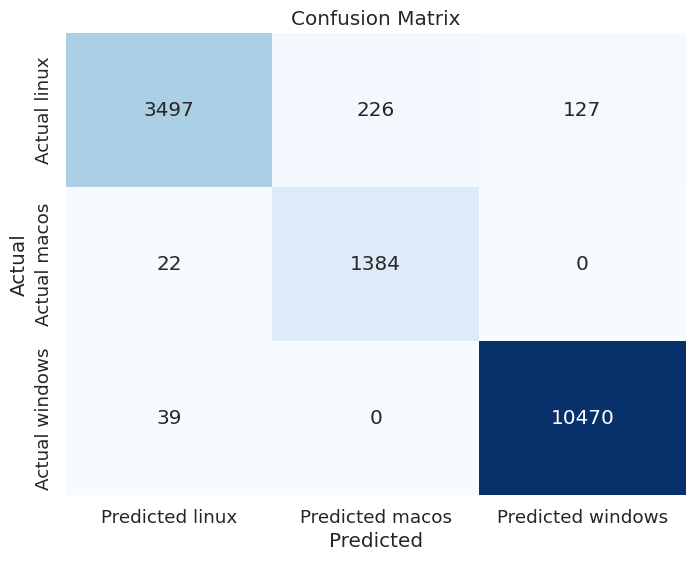

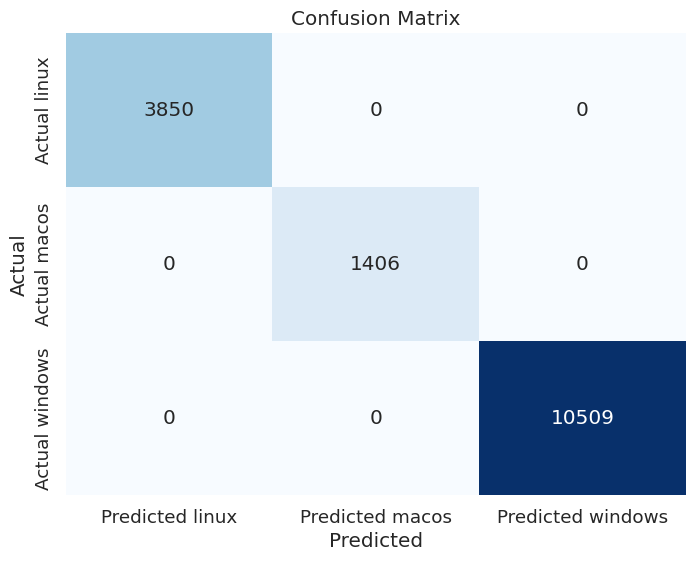

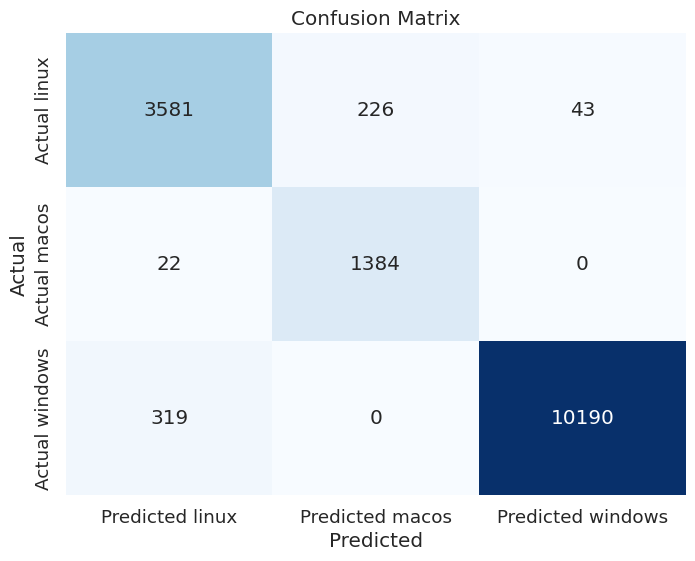

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Random Forest Classifier with tuned hyperparameters
rf_params = {
    # Reducing the number of trees
    'n_estimators': 10,
    # Shallow trees
    'max_depth': 1,
    'random_state': 42
}
rf_classifier = RandomForestClassifier(**rf_params)
rf_classifier.fit(X_train_second, y_train)
rf_predictions = rf_classifier.predict(X_test_second)

# Gradient Boosting Machine with tuned hyperparameters
gbm_params = {
    # Reducing the number of boosting stages
    'n_estimators': 10,
    # Shallow trees
    'max_depth': 1,
    # Smaller learning rate
    'learning_rate': 0.01,
    'random_state': 42
}
gbm_classifier = GradientBoostingClassifier(**gbm_params)
gbm_classifier.fit(X_train_second, y_train)
gbm_predictions = gbm_classifier.predict(X_test_second)

# Support Vector Machine with tuned hyperparameters
svm_params = {
    # Smaller regularisation parameter
    'C': 0.01,
    # Linear kernel
    'kernel': 'linear',
    'random_state': 42
}
svm_classifier = SVC(**svm_params)
svm_classifier.fit(X_train_second, y_train)
svm_predictions = svm_classifier.predict(X_test_second)

# Evaluation Metrics (same as before)
def evaluate_model(predictions, model_name):
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')
    confusion = confusion_matrix(y_test, predictions)

    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:\n", confusion)
    print("\n")


    #Store performance
    graph_data['reduce_model_complexity'] = [accuracy, precision, recall, f1]

    #Create heatmap for confusion matrix
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)  # Adjust the font size for clarity
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted linux', 'Predicted macos', 'Predicted windows'],
                yticklabels=['Actual linux', 'Actual macos', 'Actual windows'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
evaluate_model(rf_predictions, "Random Forest Classifier")
evaluate_model(svm_predictions, "Support Vector Machine")
evaluate_model(gbm_predictions, "Gradient Boosting Machine")

Even after adjusting the default parameters to the barest minimum to get very simplified model, the models still performs extremely well.

Next let's carryout cross validation training to confirm that our model is not overfitting but just really impressive. We will carryout cross validation on the train dataset to see how well our model generalises unseen data

#### Cross validation using the Random Forest Classifier

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Define the model
model = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=2, min_samples_leaf=1, random_state=42)

# Define a list of scoring metrics
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
scores = []

# Perform 5-fold cross-validation and append scores to the list
for item in scoring:
    scores_per_metric = cross_val_score(model, X_train_second, y_train, cv=5, scoring=item)
    scores.append(scores_per_metric)

# Print the metrics for each fold
for metric_name, scores_per_metric in zip(scoring, scores):
    for i, score in enumerate(scores_per_metric, 1):
        print(f"Fold {i} {metric_name}: {score:.4f}")

# Calculate and print the average metrics
for metric_name, scores_per_metric in zip(scoring, scores):
    average_score = scores_per_metric.mean()
    print(f"Average {metric_name}: {average_score:.4f}")

Fold 1 accuracy: 0.9998
Fold 2 accuracy: 1.0000
Fold 3 accuracy: 0.9998
Fold 4 accuracy: 1.0000
Fold 5 accuracy: 1.0000
Fold 1 precision_weighted: 0.9998
Fold 2 precision_weighted: 1.0000
Fold 3 precision_weighted: 0.9998
Fold 4 precision_weighted: 1.0000
Fold 5 precision_weighted: 1.0000
Fold 1 recall_weighted: 0.9998
Fold 2 recall_weighted: 1.0000
Fold 3 recall_weighted: 0.9998
Fold 4 recall_weighted: 1.0000
Fold 5 recall_weighted: 1.0000
Fold 1 f1_weighted: 0.9998
Fold 2 f1_weighted: 1.0000
Fold 3 f1_weighted: 0.9998
Fold 4 f1_weighted: 1.0000
Fold 5 f1_weighted: 1.0000
Average accuracy: 0.9999
Average precision_weighted: 0.9999
Average recall_weighted: 0.9999
Average f1_weighted: 0.9999


The model performance is still very impressive, this shows that the model can generalise very well and is not just memorising hence it is not overfitting like we suspected.

####**Carryout Sensitivity check to confirm that the model predictions are not over reliant on one specific features**

Sensitivity analysis is a technique used to assess the stability and reliability of a model's predictions when its inputs (features) are slightly changed. In the context of machine learning, it involves perturbing the feature values slightly and observing how the model's predictions change. The primary goal is to determine whether the model's predictions are consistent and robust across different variations of the input data.


The logic behind sensitivity analysis is rooted in assessing the impact of small changes input features on the model's output. If the model's predictions remain relatively stable even after perturbing the input features, it suggests that the model's decision boundaries and generalisation are less sensitive to small fluctuations in the data. On the other hand, if the model's predictions show significant changes in response to small perturbations, it might indicate that the model is too reliant on specific features or that its decisions are more susceptible to noise in the data.

We will focus majorly on 'tcp.options.syn' as this is the only feature that was chosen during feature selection using RFE technique. Let's check that our good model performance is not completely reliant on this one feature

In [ ]:

import numpy as np
from sklearn.metrics import accuracy_score

# Function for slight perturbation of a feature
def perturb_feature(feature_values, perturbation_factor=0.1):
    return feature_values + np.random.normal(0, perturbation_factor, len(feature_values))

# Choose a feature for sensitivity analysis
feature_to_analyze = 'tcp.options.syn'
original_feature_values = X_test[feature_to_analyze]

# Fit our model
# Using our preferred model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Perturb the feature values
perturbed_feature_values = perturb_feature(original_feature_values)

# Make predictions with the original and perturbed feature values
original_predictions = model.predict(X_test)
perturbed_predictions = model.predict(X_test.assign(**{feature_to_analyze: perturbed_feature_values}))

# Calculate accuracy for both predictions
original_accuracy = accuracy_score(y_test, original_predictions)
perturbed_accuracy = accuracy_score(y_test, perturbed_predictions)

print(f"Original Accuracy: {original_accuracy}")
print(f"Perturbed Accuracy: {perturbed_accuracy}")

Original Accuracy: 1.0
Perturbed Accuracy: 1.0


An accuracy of 1 for both the original and perturbed predictions indicates that the model is not sensitive to the perturbation of the selected feature. In other words, the model's predictions remain consistent even when the values of the selected feature are slightly changed.

The logic behind this sensitivity analysis is to test how robust our model is to changes in individual features. If a model's accuracy remains unchanged after perturbing a feature, it suggests that the model's decision-making process is not heavily influenced by that specific feature. This is a good sign, indicating that the model's predictions are not overly reliant on tcp.options.syn

####**Let's try the impact of training with each of the corelation based selected feature on our models.**

In [ ]:
selected_features

['tcp.options.syn',
 'tls.record.version.ch',
 'ip.len.syn',
 'tcp.window_size_value.syn',
 'ip.ttl.syn',
 'tcp.options.wscale.shift.syn',
 'tcp_flag_syn_ratio']

#####Start with 'tcp.options.syn'

In [ ]:
# Filter X_train to include just 'tcp.options.syn' as the only feature
# Reshape it to a form that scikitlearn models can accept; 2D (The models do not accept 1D)
X_train_tcp_opt = X_train['tcp.options.syn'].values.reshape(-1, 1)
X_test_tcp_opt = X_test['tcp.options.syn'].values.reshape(-1, 1)

--- Random Forest Classifier ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[ 3850     0     0]
 [    0  1406     0]
 [    0     0 10509]]


--- Support Vector Machine ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[ 3850     0     0]
 [    0  1406     0]
 [    0     0 10509]]


--- Gradient Boosting Machine ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[ 3850     0     0]
 [    0  1406     0]
 [    0     0 10509]]




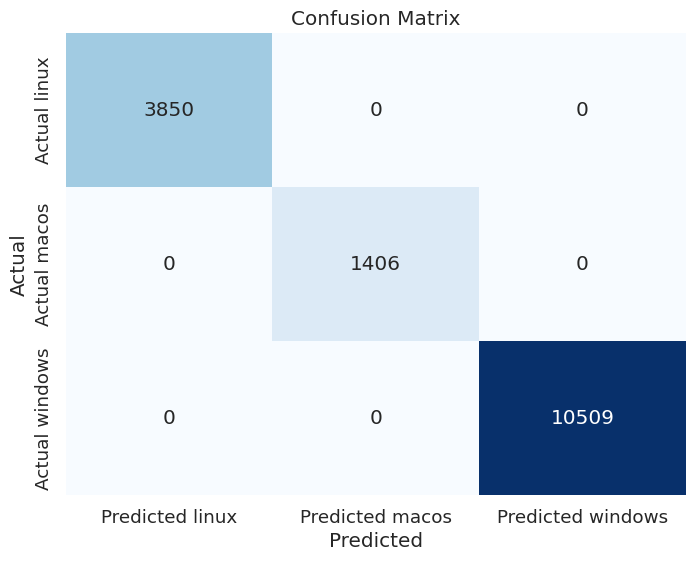

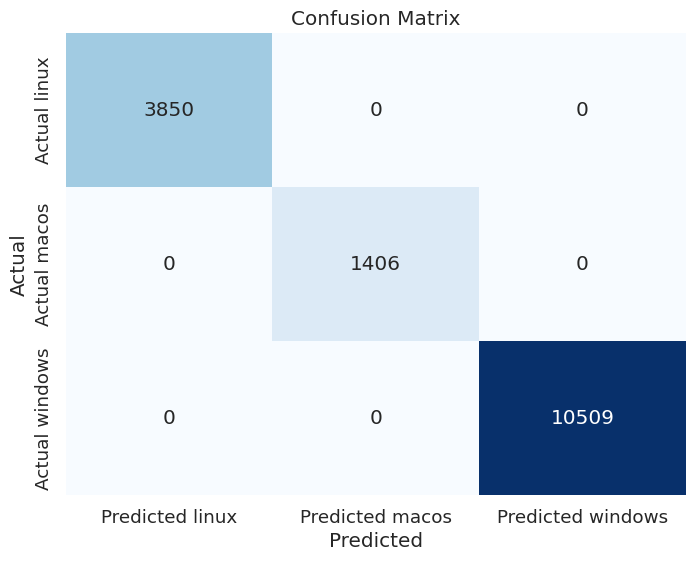

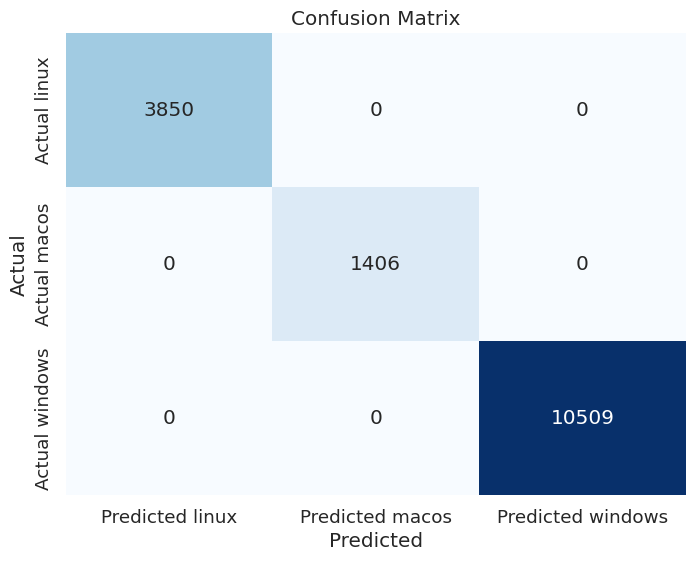

In [ ]:
# Performing model training with 'tcp.options.syn' as the only feature
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_tcp_opt, y_train)
rf_predictions = rf_classifier.predict(X_test_tcp_opt)

# Gradient Boosting Machine
gbm_classifier = GradientBoostingClassifier()
gbm_classifier.fit(X_train_tcp_opt, y_train)
gbm_predictions = gbm_classifier.predict(X_test_tcp_opt)

# Support Vector Machine
svm_classifier = SVC()
svm_classifier.fit(X_train_tcp_opt, y_train)
svm_predictions = svm_classifier.predict(X_test_tcp_opt)

# Evaluation Metrics
def evaluate_model(predictions, model_name):
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')
    confusion = confusion_matrix(y_test, predictions)

    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:\n", confusion)
    print("\n")


    #Store performance
    graph_data['tcp.options.syn'] = [accuracy, precision, recall, f1]

    #Create heatmap for confusion matrix
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)  # Adjust the font size for clarity
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted linux', 'Predicted macos', 'Predicted windows'],
                yticklabels=['Actual linux', 'Actual macos', 'Actual windows'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
evaluate_model(rf_predictions, "Random Forest Classifier")
evaluate_model(svm_predictions, "Support Vector Machine")
evaluate_model(gbm_predictions, "Gradient Boosting Machine")

We can see that introducing only 'tcp.options.syn' leads to accuracy, precision, recall and F1 score of 1 for all the models.

This could also be linked to the correlation heatmap, where 'tcp.options.syn' has a highly negative correlation of -1. RFE also chose this feature; it is proof that this feature alone has a good performance and can help identify the operating system.

#####Next, we move to 'tls.record.version.ch'



In [ ]:
# Filter X_train to include just 'tls.record.version.ch' as the only feature
# Reshape it to a form that scikitlearn models can accept; 2D (The models do not accept 1D)
X_train_tls_rec = X_train['tls.record.version.ch'].values.reshape(-1, 1)
X_test_tls_rec = X_test['tls.record.version.ch'].values.reshape(-1, 1)

--- Random Forest Classifier ---
Accuracy: 0.2752933713923248
Precision: 0.9200973980379735
Recall: 0.2752933713923248
F1 Score: 0.31781529860665786
Confusion Matrix:
 [[ 226 3622    2]
 [   0 1406    0]
 [   0 7801 2708]]


--- Support Vector Machine ---
Accuracy: 0.2752933713923248
Precision: 0.9200973980379735
Recall: 0.2752933713923248
F1 Score: 0.31781529860665786
Confusion Matrix:
 [[ 226 3622    2]
 [   0 1406    0]
 [   0 7801 2708]]


--- Gradient Boosting Machine ---
Accuracy: 0.2752933713923248
Precision: 0.9200973980379735
Recall: 0.2752933713923248
F1 Score: 0.31781529860665786
Confusion Matrix:
 [[ 226 3622    2]
 [   0 1406    0]
 [   0 7801 2708]]




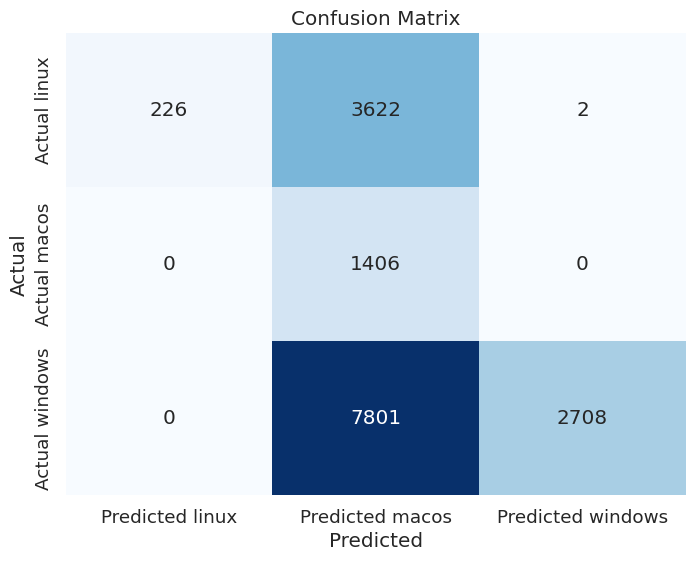

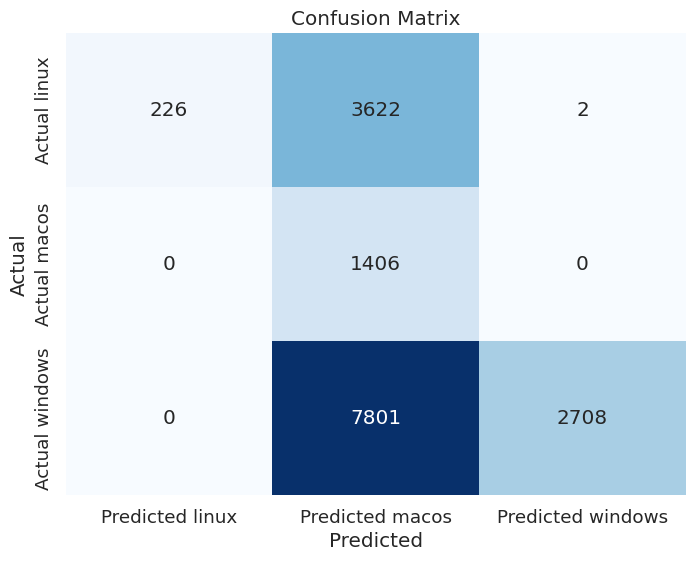

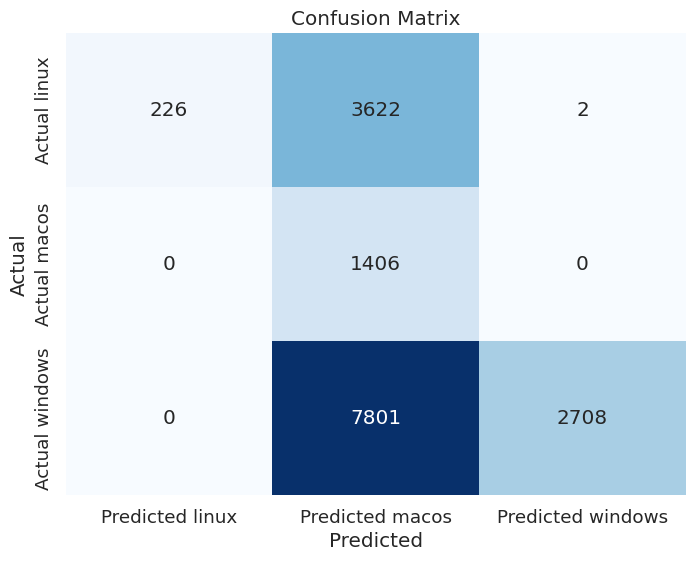

In [ ]:
# Performing model training with 'tls.record.version.ch' as the only feature
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_tls_rec, y_train)
rf_predictions = rf_classifier.predict(X_test_tls_rec)

# Gradient Boosting Machine
gbm_classifier = GradientBoostingClassifier()
gbm_classifier.fit(X_train_tls_rec, y_train)
gbm_predictions = gbm_classifier.predict(X_test_tls_rec)

# Support Vector Machine
svm_classifier = SVC()
svm_classifier.fit(X_train_tls_rec, y_train)
svm_predictions = svm_classifier.predict(X_test_tls_rec)

# Evaluation Metrics
def evaluate_model(predictions, model_name):
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')
    confusion = confusion_matrix(y_test, predictions)

    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:\n", confusion)
    print("\n")


    #Store performance
    graph_data['tls.record.version.ch'] = [accuracy, precision, recall, f1]
    #Create heatmap for confusion matrix
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)  # Adjust the font size for clarity
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted linux', 'Predicted macos', 'Predicted windows'],
                yticklabels=['Actual linux', 'Actual macos', 'Actual windows'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
evaluate_model(rf_predictions, "Random Forest Classifier")
evaluate_model(svm_predictions, "Support Vector Machine")
evaluate_model(gbm_predictions, "Gradient Boosting Machine")

We can see that introducing only 'tls.record.version.ch' leads to low accuracy, recall and F1 score for all the models.

This could also be linked to the correlation heatmap, where 'tls.record.version.ch' has a positive correlation of 0.4.

#####Next, we move to 'ip.ttl.syn'



In [ ]:
# Filter X_train to include just 'ip.ttl.syn' as the only feature
# Reshape it to a form that scikitlearn models can accept; 2D (The models do not accept 1D)
X_train_ip_ttl = X_train['ip.ttl.syn'].values.reshape(-1, 1)
X_test_ip_ttl = X_test['ip.ttl.syn'].values.reshape(-1, 1)

--- Random Forest Classifier ---
Accuracy: 0.9108150967332699
Precision: 0.8454874944545578
Recall: 0.9108150967332699
F1 Score: 0.8731078841726603
Confusion Matrix:
 [[ 3850     0     0]
 [ 1406     0     0]
 [    0     0 10509]]


--- Support Vector Machine ---
Accuracy: 0.7557881382810022
Precision: 0.6904605360022901
Recall: 0.7557881382810022
F1 Score: 0.7042477783925436
Confusion Matrix:
 [[    0  3850     0]
 [    0  1406     0]
 [    0     0 10509]]


--- Gradient Boosting Machine ---
Accuracy: 0.9108150967332699
Precision: 0.8454874944545578
Recall: 0.9108150967332699
F1 Score: 0.8731078841726603
Confusion Matrix:
 [[ 3850     0     0]
 [ 1406     0     0]
 [    0     0 10509]]




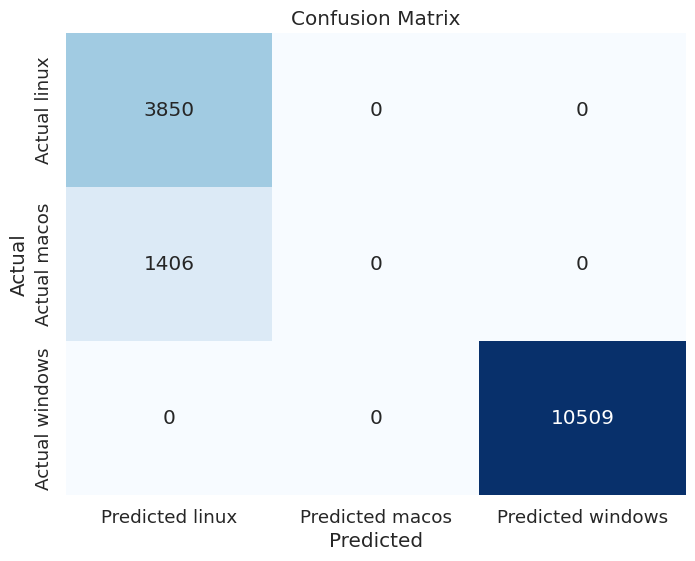

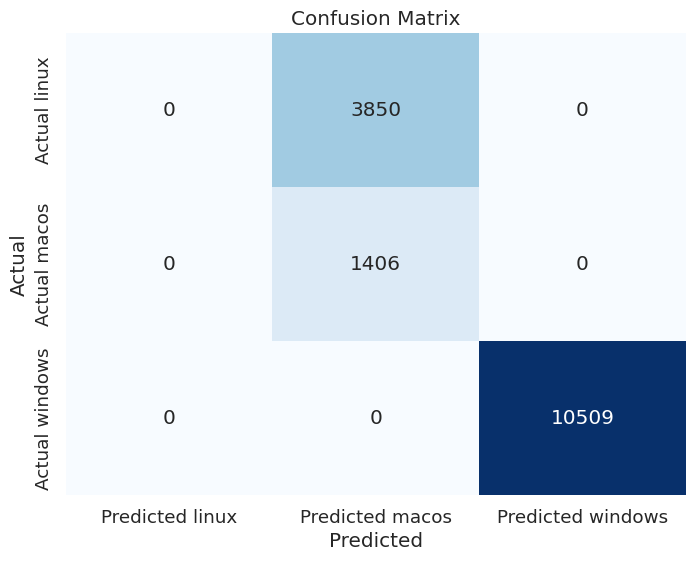

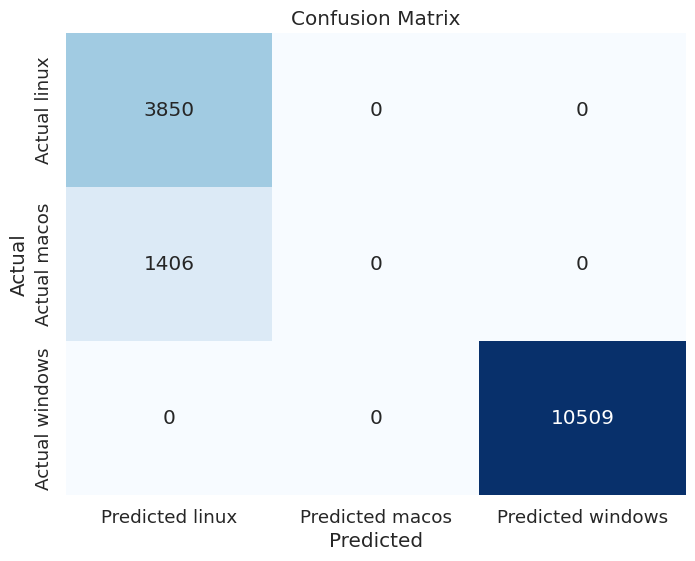

In [ ]:
# Performing model training with 'ip.ttl.syn' as the only feature
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_ip_ttl, y_train)
rf_predictions = rf_classifier.predict(X_test_ip_ttl)

# Gradient Boosting Machine
gbm_classifier = GradientBoostingClassifier()
gbm_classifier.fit(X_train_ip_ttl, y_train)
gbm_predictions = gbm_classifier.predict(X_test_ip_ttl)

# Support Vector Machine
svm_classifier = SVC()
svm_classifier.fit(X_train_ip_ttl, y_train)
svm_predictions = svm_classifier.predict(X_test_ip_ttl)

# Evaluation Metrics
def evaluate_model(predictions, model_name):
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted', zero_division=0)
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')
    confusion = confusion_matrix(y_test, predictions)

    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:\n", confusion)
    print("\n")

    #Store performance
    graph_data['ip.ttl.syn'] = [accuracy, precision, recall, f1]

    #Create heatmap for confusion matrix
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)  # Adjust the font size for clarity
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted linux', 'Predicted macos', 'Predicted windows'],
                yticklabels=['Actual linux', 'Actual macos', 'Actual windows'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
evaluate_model(rf_predictions, "Random Forest Classifier")
evaluate_model(svm_predictions, "Support Vector Machine")
evaluate_model(gbm_predictions, "Gradient Boosting Machine")

We can see that introducing only 'ip.ttl.syn' leads to good accuracy, recall and F1 score for all the models.

This could also be linked to the correlation heatmap, where 'ip.ttl.syn' has a high positive correlation of 0.87.

#####Next, we move to 'tcp.options.wscale.shift.syn'


In [ ]:
# Filter X_train to include just 'tcp.options.wscale.shift.syn' as the only feature
# Reshape it to a form that scikitlearn models can accept; 2D (The models do not accept 1D)
X_train_tcp_wscale = X_train['tcp.options.wscale.shift.syn'].values.reshape(-1, 1)
X_test_tcp_wscale = X_test['tcp.options.wscale.shift.syn'].values.reshape(-1, 1)

--- Random Forest Classifier ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[ 3850     0     0]
 [    0  1406     0]
 [    0     0 10509]]


--- Support Vector Machine ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[ 3850     0     0]
 [    0  1406     0]
 [    0     0 10509]]


--- Gradient Boosting Machine ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[ 3850     0     0]
 [    0  1406     0]
 [    0     0 10509]]




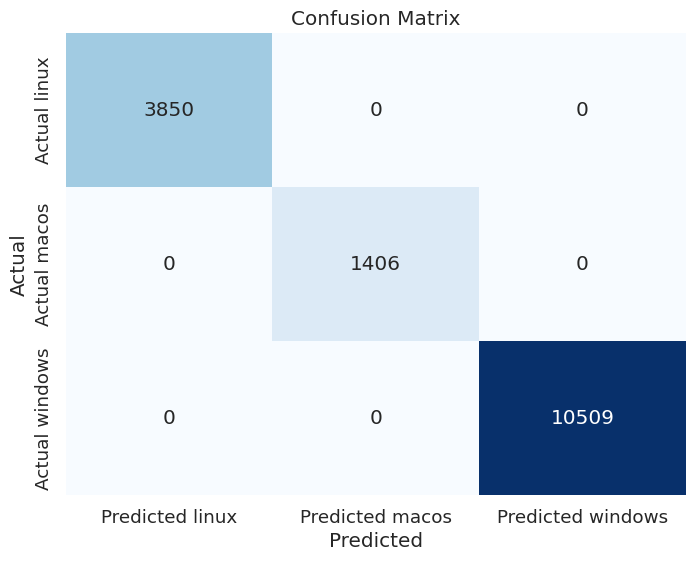

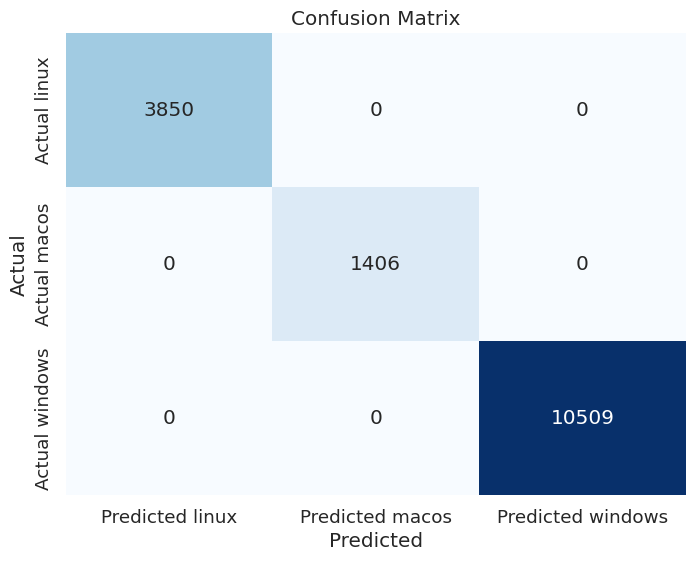

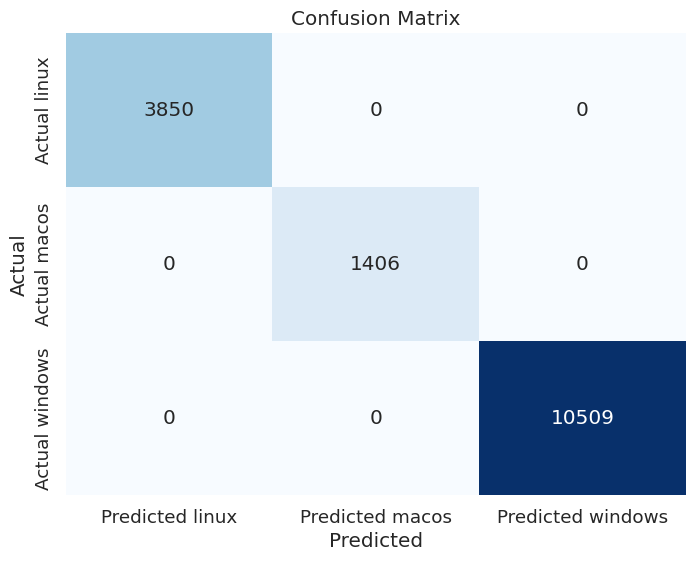

In [ ]:
# Performing model training with 'tcp.options.wscale.shift.syn' as the only feature
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_tcp_wscale, y_train)
rf_predictions = rf_classifier.predict(X_test_tcp_wscale)

# Gradient Boosting Machine
gbm_classifier = GradientBoostingClassifier()
gbm_classifier.fit(X_train_tcp_wscale, y_train)
gbm_predictions = gbm_classifier.predict(X_test_tcp_wscale)

# Support Vector Machine
svm_classifier = SVC()
svm_classifier.fit(X_train_tcp_wscale, y_train)
svm_predictions = svm_classifier.predict(X_test_tcp_wscale)

# Evaluation Metrics
def evaluate_model(predictions, model_name):
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')
    confusion = confusion_matrix(y_test, predictions)

    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:\n", confusion)
    print("\n")


    #Store performance
    graph_data['tcp.options.wscale.shift.syc'] = [accuracy, precision, recall, f1]
    #Create heatmap for confusion matrix
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)  # Adjust the font size for clarity
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted linux', 'Predicted macos', 'Predicted windows'],
                yticklabels=['Actual linux', 'Actual macos', 'Actual windows'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
evaluate_model(rf_predictions, "Random Forest Classifier")
evaluate_model(svm_predictions, "Support Vector Machine")
evaluate_model(gbm_predictions, "Gradient Boosting Machine")

We can see that introducing only  'tcp.options.wscale.shift.syn' leads to high accuracy, recall and F1 score for all the models.

This could also be linked to the correlation heatmap, where  'tcp.options.wscale.shift.syn' has a positive correlation of 0.11.

#####Next, we move to 'ip.len.syn'


In [ ]:
# Filter X_train to include just 'ip.len.syn' as the only feature
# Reshape it to a form that scikitlearn models can accept; 2D (The models do not accept 1D)
X_train_ip_len = X_train['ip.len.syn'].values.reshape(-1, 1)
X_test_ip_len = X_test['ip.len.syn'].values.reshape(-1, 1)

--- Random Forest Classifier ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[ 3850     0     0]
 [    0  1406     0]
 [    0     0 10509]]


--- Support Vector Machine ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[ 3850     0     0]
 [    0  1406     0]
 [    0     0 10509]]


--- Gradient Boosting Machine ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[ 3850     0     0]
 [    0  1406     0]
 [    0     0 10509]]




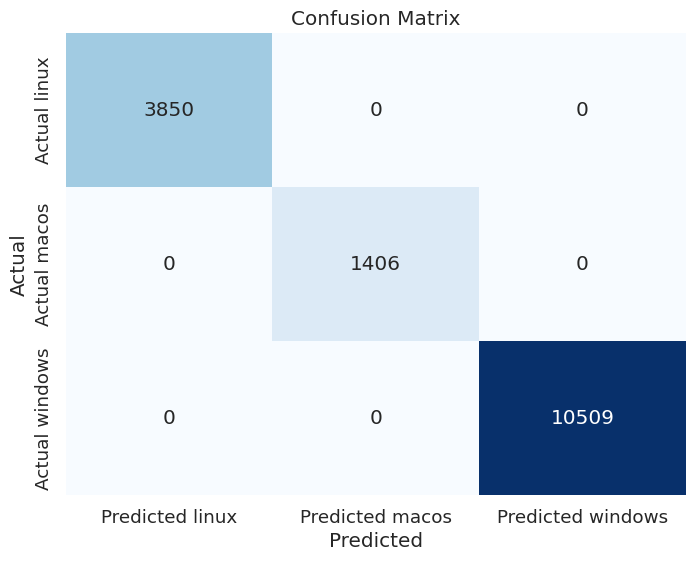

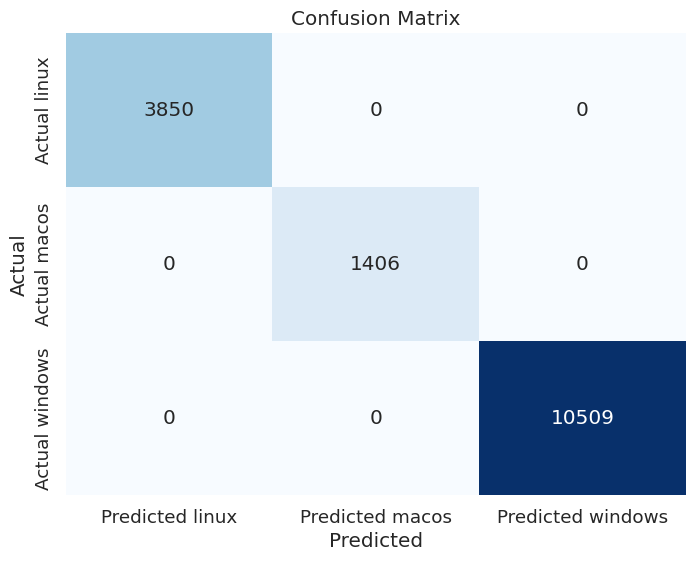

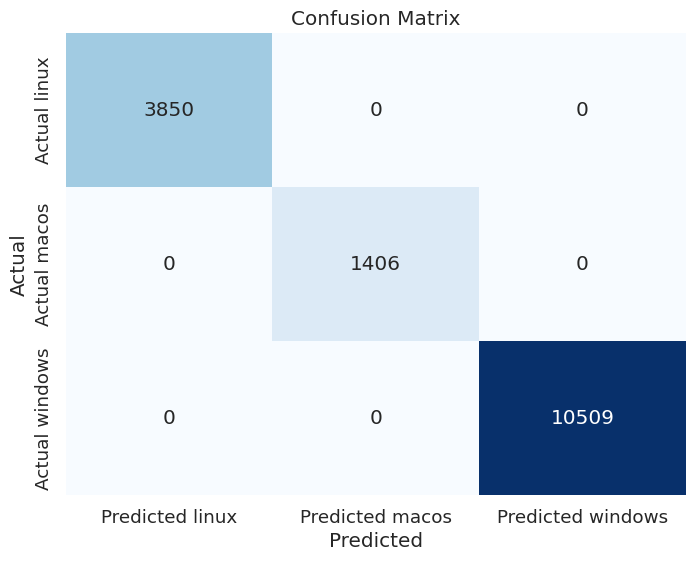

In [ ]:
# Performing model training with 'ip.len.syn' as the only feature
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_ip_len, y_train)
rf_predictions = rf_classifier.predict(X_test_ip_len)

# Gradient Boosting Machine
gbm_classifier = GradientBoostingClassifier()
gbm_classifier.fit(X_train_ip_len, y_train)
gbm_predictions = gbm_classifier.predict(X_test_ip_len)

# Support Vector Machine
svm_classifier = SVC()
svm_classifier.fit(X_train_ip_len, y_train)
svm_predictions = svm_classifier.predict(X_test_ip_len)

# Evaluation Metrics
def evaluate_model(predictions, model_name):
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')
    confusion = confusion_matrix(y_test, predictions)

    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:\n", confusion)
    print("\n")


    #Store performance
    graph_data['ip.len.syn'] = [accuracy, precision, recall, f1]
    #Create heatmap for confusion matrix
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)  # Adjust the font size for clarity
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted linux', 'Predicted macos', 'Predicted windows'],
                yticklabels=['Actual linux', 'Actual macos', 'Actual windows'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
evaluate_model(rf_predictions, "Random Forest Classifier")
evaluate_model(svm_predictions, "Support Vector Machine")
evaluate_model(gbm_predictions, "Gradient Boosting Machine")

We can see that introducing only 'ip.len.syn' leads to high accuracy, recall and F1 score for all the models.

This could also be linked to the correlation heatmap, where  'ip.len.syn' has a negative correlation of -0.65.

#####Next, we move to 'tcp.window_size_value.syn'


In [ ]:
# Filter X_train to include just 'tcp.window_size_value.syn' as the only feature
# Reshape it to a form that scikitlearn models can accept; 2D (The models do not accept 1D)
X_train_tcp_win = X_train['tcp.window_size_value.syn'].values.reshape(-1, 1)
X_test_tcp_win = X_test['tcp.window_size_value.syn'].values.reshape(-1, 1)

--- Random Forest Classifier ---
Accuracy: 0.864256263875674
Precision: 0.9461771875378447
Recall: 0.864256263875674
F1 Score: 0.8858930797352602
Confusion Matrix:
 [[3850    0    0]
 [   0 1406    0]
 [   0 2140 8369]]


--- Support Vector Machine ---
Accuracy: 0.864256263875674
Precision: 0.9461771875378447
Recall: 0.864256263875674
F1 Score: 0.8858930797352602
Confusion Matrix:
 [[3850    0    0]
 [   0 1406    0]
 [   0 2140 8369]]


--- Gradient Boosting Machine ---
Accuracy: 0.864256263875674
Precision: 0.9461771875378447
Recall: 0.864256263875674
F1 Score: 0.8858930797352602
Confusion Matrix:
 [[3850    0    0]
 [   0 1406    0]
 [   0 2140 8369]]




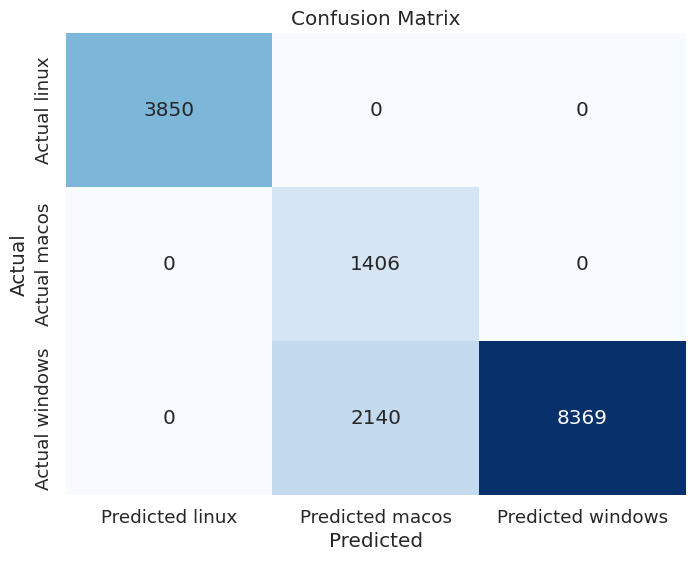

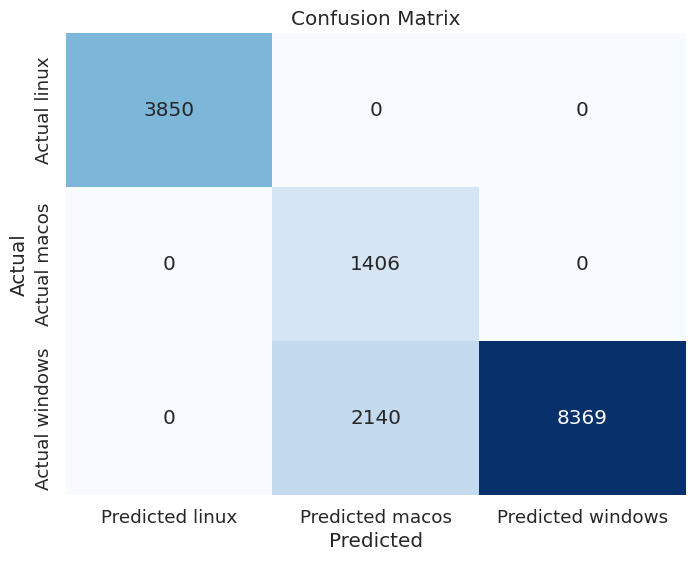

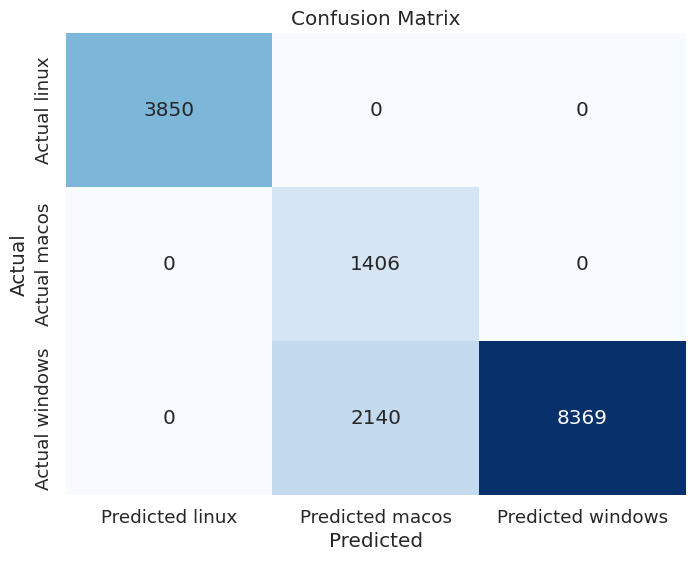

In [ ]:
# Performing model training with 'tcp.window_size_value.syn' as the only feature
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_tcp_win, y_train)
rf_predictions = rf_classifier.predict(X_test_tcp_win)

# Gradient Boosting Machine
gbm_classifier = GradientBoostingClassifier()
gbm_classifier.fit(X_train_tcp_win, y_train)
gbm_predictions = gbm_classifier.predict(X_test_tcp_win)

# Support Vector Machine
svm_classifier = SVC()
svm_classifier.fit(X_train_tcp_win, y_train)
svm_predictions = svm_classifier.predict(X_test_tcp_win)

# Evaluation Metrics
def evaluate_model(predictions, model_name):
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')
    confusion = confusion_matrix(y_test, predictions)

    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:\n", confusion)
    print("\n")


    #Store performance
    graph_data['tcp.window_size_value.syn'] = [accuracy, precision, recall, f1]

    #Create heatmap for confusion matrix
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)  # Adjust the font size for clarity
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted linux', 'Predicted macos', 'Predicted windows'],
                yticklabels=['Actual linux', 'Actual macos', 'Actual windows'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
evaluate_model(rf_predictions, "Random Forest Classifier")
evaluate_model(svm_predictions, "Support Vector Machine")
evaluate_model(gbm_predictions, "Gradient Boosting Machine")

We can see that introducing only 'tcp.window_size_value.syn' leads to a good accuracy, recall and F1 score for all the models.

This could also be linked to the correlation heatmap, where   'tcp.window_size_value.syn' has a negative correlation of -0.16.

#####Finally, we move to 'tcp_flag_syn_ratio'




In [ ]:
# Filter X_train to include just 'tcp_flag_syn_ratio' as the only feature
# Reshape it to a form that scikitlearn models can accept; 2D (The models do not accept 1D)
X_train_tcp_flag = X_train['tcp_flag_syn_ratio'].values.reshape(-1, 1)
X_test_tcp_flag = X_test['tcp_flag_syn_ratio'].values.reshape(-1, 1)

--- Random Forest Classifier ---
Accuracy: 0.6778940691405011
Precision: 0.6904613549991935
Recall: 0.6778940691405011
F1 Score: 0.5626050737108632
Confusion Matrix:
 [[  215     2  3633]
 [    7     3  1396]
 [   38     2 10469]]


--- Support Vector Machine ---
Accuracy: 0.6778940691405011
Precision: 0.6904613549991935
Recall: 0.6778940691405011
F1 Score: 0.5626050737108632
Confusion Matrix:
 [[  215     2  3633]
 [    7     3  1396]
 [   38     2 10469]]


--- Gradient Boosting Machine ---
Accuracy: 0.6778940691405011
Precision: 0.6904613549991935
Recall: 0.6778940691405011
F1 Score: 0.5626050737108632
Confusion Matrix:
 [[  215     2  3633]
 [    7     3  1396]
 [   38     2 10469]]




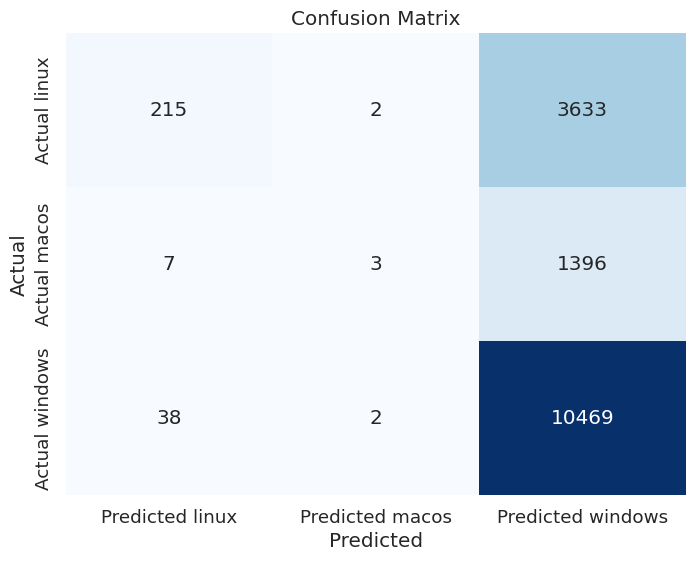

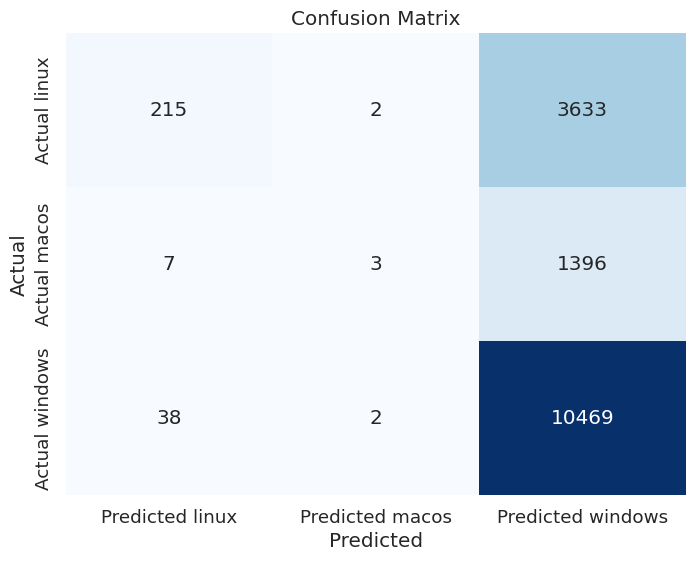

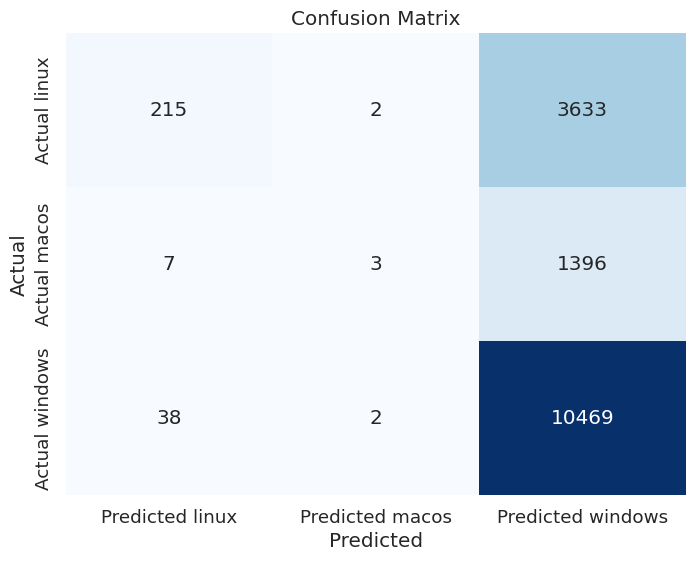

In [ ]:
# Performing model training with 'tcp_flag_syn_ratio' as the only feature
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_tcp_flag, y_train)
rf_predictions = rf_classifier.predict(X_test_tcp_flag)

# Gradient Boosting Machine
gbm_classifier = GradientBoostingClassifier()
gbm_classifier.fit(X_train_tcp_flag, y_train)
gbm_predictions = gbm_classifier.predict(X_test_tcp_flag)

# Support Vector Machine
svm_classifier = SVC()
svm_classifier.fit(X_train_tcp_flag, y_train)
svm_predictions = svm_classifier.predict(X_test_tcp_flag)

# Evaluation Metrics
def evaluate_model(predictions, model_name):
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')
    confusion = confusion_matrix(y_test, predictions)

    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:\n", confusion)
    print("\n")

    #Store performance
    graph_data['tcp_flag_syn_ratio'] = [accuracy, precision, recall, f1]

    #Create heatmap for confusion matrix
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)  # Adjust the font size for clarity
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted linux', 'Predicted macos', 'Predicted windows'],
                yticklabels=['Actual linux', 'Actual macos', 'Actual windows'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
evaluate_model(rf_predictions, "Random Forest Classifier")
evaluate_model(svm_predictions, "Support Vector Machine")
evaluate_model(gbm_predictions, "Gradient Boosting Machine")

We can see that introducing only 'tcp_flag_syn_ratio' leads to a good accuracy, recall and F1 score for all the models.

This could also be linked to the correlation heatmap, where   'tcp_flag_syn_ratio' has a negative correlation of -0.15.

####**Next let's remove the flag ratios to see if they have any significant impact on the model performance**

In [ ]:
# Get all flag ratios names
# List of flag ratio columns
tcp_flags = ['FIN', 'SYN', 'RST', 'PSH', 'ACK', 'URG']

flag_ratio_columns = [f'tcp_flag_{flag.lower()}_ratio' for flag in tcp_flags]

In [ ]:
flag_ratio_columns

['tcp_flag_fin_ratio',
 'tcp_flag_syn_ratio',
 'tcp_flag_rst_ratio',
 'tcp_flag_psh_ratio',
 'tcp_flag_ack_ratio',
 'tcp_flag_urg_ratio']

In [ ]:
#Remove all flag ratios from train dataset

X_train_no_flags = X_train.drop(flag_ratio_columns, axis=1)

# Remove all flag ratios from test dataset
X_test_no_flags = X_test.drop(flag_ratio_columns, axis=1)

--- Random Forest Classifier ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[ 3850     0     0]
 [    0  1406     0]
 [    0     0 10509]]


--- Support Vector Machine ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[ 3850     0     0]
 [    0  1406     0]
 [    0     0 10509]]


--- Gradient Boosting Machine ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[ 3850     0     0]
 [    0  1406     0]
 [    0     0 10509]]




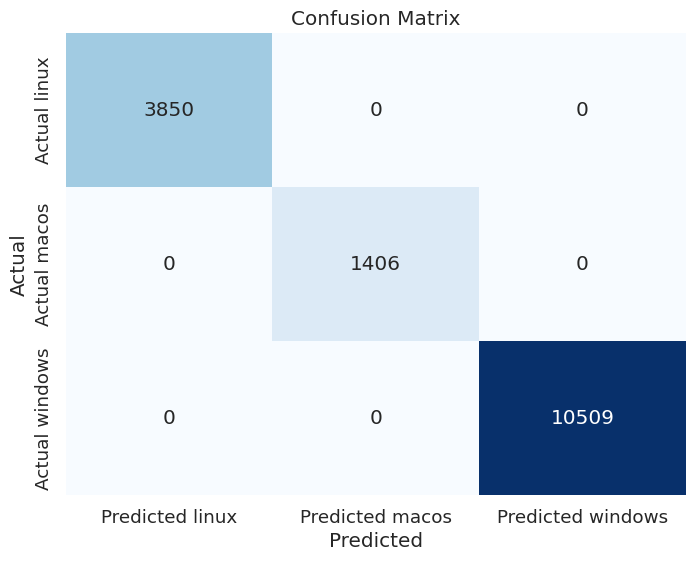

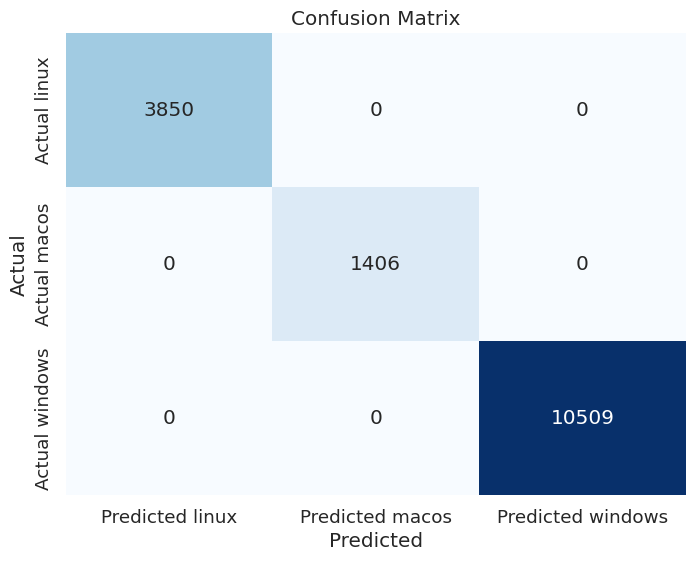

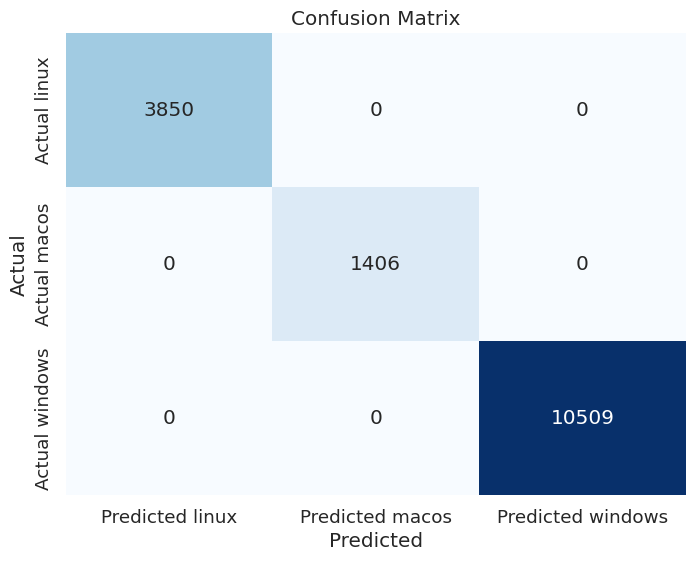

In [ ]:
# Retrain models
# Training with PCA selected features

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_no_flags, y_train)
rf_predictions = rf_classifier.predict(X_test_no_flags)

# Gradient Boosting Machine
gbm_classifier = GradientBoostingClassifier()
gbm_classifier.fit(X_train_no_flags, y_train)
gbm_predictions = gbm_classifier.predict(X_test_no_flags)

# Support Vector Machine
svm_classifier = SVC()
svm_classifier.fit(X_train_no_flags, y_train)
svm_predictions = svm_classifier.predict(X_test_no_flags)

# Evaluation Metrics
def evaluate_model(predictions, model_name):
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    specificity = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')
    confusion = confusion_matrix(y_test, predictions)

    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:\n", confusion)
    print("\n")


    #Store performance
    graph_data['pca_no_flag_ratios'] = [accuracy, precision, recall, f1]
    #Create heatmap for confusion matrix
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)  # Adjust the font size for clarity
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted linux', 'Predicted macos', 'Predicted windows'],
                yticklabels=['Actual linux', 'Actual macos', 'Actual windows'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
evaluate_model(rf_predictions, "Random Forest Classifier")
evaluate_model(svm_predictions, "Support Vector Machine")
evaluate_model(gbm_predictions, "Gradient Boosting Machine")

The models still perform extremely well without the flags. This shows that we can do without the flag we originally added. However flags like tcp_flag_syn_ratio are very significant. We can observe that that flag was chosen in our model selection steps as one among the 7 most important features. Let's check the selected features list below.

In [ ]:
selected_features

['tcp.options.syn',
 'tls.record.version.ch',
 'ip.len.syn',
 'tcp.window_size_value.syn',
 'ip.ttl.syn',
 'tcp.options.wscale.shift.syn',
 'tcp_flag_syn_ratio']

An explanation for why tcp_flag_syn_ratio is  a good feature to generate for predicting operating system

This feature captures the ratio of TCP (Transmission Control Protocol) packets with the SYN flag, which plays a crucial role in establishing connections between network devices.
The SYN (Synchronize) flag is used to initiate a connection between two devices in a TCP/IP network. It's the first step in the TCP three-way handshake process, where one device requests to establish a connection by sending a SYN packet to the other device. In the case of network-based operating system prediction, the frequency and proportion of SYN packets can indicate how different operating systems initiate connections.
Different operating systems exhibit distinct patterns in how they initialize connections using the SYN flag. Some OSs favor frequent connection establishment, resulting in a higher SYN ratio, while others use a more conservative approach. Higher values of this ratio can indicate a more active initiation of connections, while lower values can suggest a conservative connection approach. This behavior could be due to factors like default settings, network stack implementation, or security features. Therefore, the TCP SYN behavior can help differentiate between operating systems.

####**Now, let's focus on just the TCP features to see what impact they have on the training when used alone**

In [ ]:
X_train.columns

Index(['tls.handshake.ciphersuite.ch', 'tcp.options.syn',
       'tls.record.version.ch', 'tcp.options.mss_val.syn', 'ip.len.syn',
       'tls.ja3sCnt', 'tcp.window_size_value.syn', 'tcp.options.sack_perm.syn',
       'ip.ttl.syn', 'ip.flags.df.syn', 'ipProtocol',
       'tcp.options.wscale.shift.syn', 'tcp_flag_fin_ratio',
       'tcp_flag_syn_ratio', 'tcp_flag_rst_ratio', 'tcp_flag_psh_ratio',
       'tcp_flag_ack_ratio', 'tcp_flag_urg_ratio'],
      dtype='object')

In [ ]:
# Select all TCP features
# Initialise an empty list to store the selected feature names
tcp_selected_features = []

# Iterate through the column names and select those with 'tcp' in their names
for column_name in X_train.columns:
    if 'tcp' in column_name:
        tcp_selected_features.append(column_name)

# Now, 'tcp_selected_features' contains the names of features with 'tcp' in their names
tcp_selected_features

['tcp.options.syn',
 'tcp.options.mss_val.syn',
 'tcp.window_size_value.syn',
 'tcp.options.sack_perm.syn',
 'tcp.options.wscale.shift.syn',
 'tcp_flag_fin_ratio',
 'tcp_flag_syn_ratio',
 'tcp_flag_rst_ratio',
 'tcp_flag_psh_ratio',
 'tcp_flag_ack_ratio',
 'tcp_flag_urg_ratio']

As observed from printing all the tcp related features, only tcp.options.syn and tcp_flag_syn_ratio are the important features as this were the only two that have been selected before by our feature selection techniques. However we will train with all the features to see what impact the tcp related features have on the model performance

In [ ]:
X_train_tcp_selected = X_train[tcp_selected_features]
X_test_tcp_selected = X_test[tcp_selected_features]

--- Random Forest Classifier ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[ 3850     0     0]
 [    0  1406     0]
 [    0     0 10509]]


--- Support Vector Machine ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[ 3850     0     0]
 [    0  1406     0]
 [    0     0 10509]]


--- Gradient Boosting Machine ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[ 3850     0     0]
 [    0  1406     0]
 [    0     0 10509]]




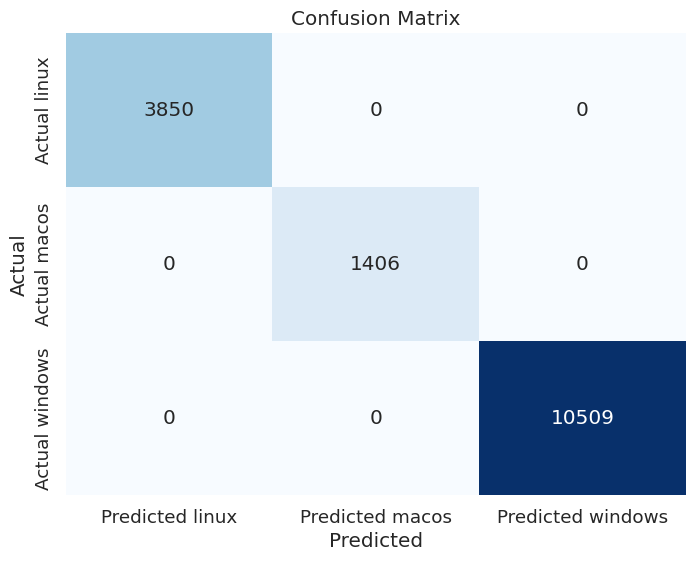

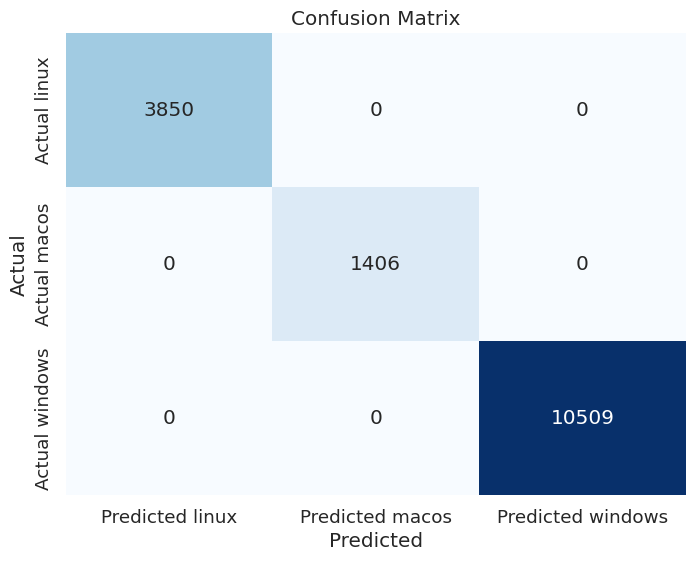

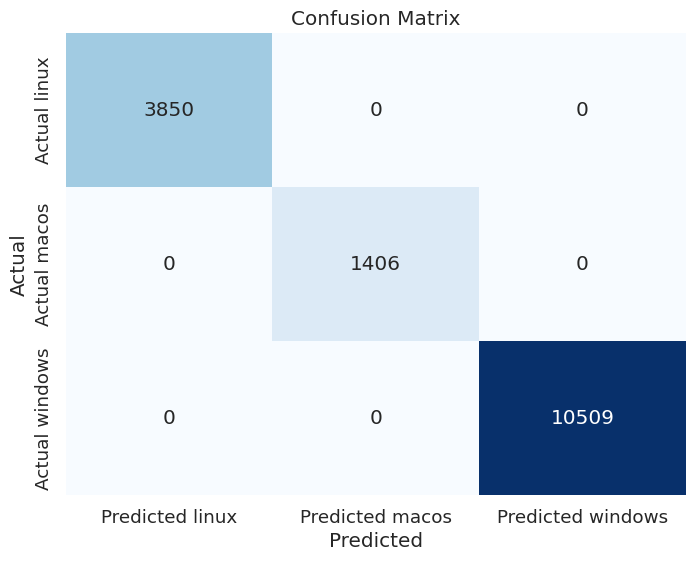

In [ ]:
# Performing model training with TCP features
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Random Forest Classifier
rf_classifier_tcp = RandomForestClassifier()
rf_classifier_tcp.fit(X_train_tcp_selected, y_train)
rf_predictions_tcp = rf_classifier_tcp.predict(X_test_tcp_selected)

# Gradient Boosting Machine
gbm_classifier_tcp = GradientBoostingClassifier()
gbm_classifier_tcp.fit(X_train_tcp_selected, y_train)
gbm_predictions_tcp = gbm_classifier_tcp.predict(X_test_tcp_selected)

# Support Vector Machine
svm_classifier_tcp = SVC()
svm_classifier_tcp.fit(X_train_tcp_selected, y_train)
svm_predictions_tcp = svm_classifier_tcp.predict(X_test_tcp_selected)

# Evaluation Metrics
def evaluate_model(predictions, model_name):
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')
    confusion = confusion_matrix(y_test, predictions)

    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:\n", confusion)
    print("\n")

    #Store performance
    graph_data['tcp_features'] = [accuracy, precision, recall, f1]

    #Create heatmap for confusion matrix
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)  # Adjust the font size for clarity
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted linux', 'Predicted macos', 'Predicted windows'],
                yticklabels=['Actual linux', 'Actual macos', 'Actual windows'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
evaluate_model(rf_predictions, "Random Forest Classifier")
evaluate_model(svm_predictions, "Support Vector Machine")
evaluate_model(gbm_predictions, "Gradient Boosting Machine")

Model was still impressive, but we suspect it's because of the tcp_option_syn there which is very highly correlated. Let's drop that and observe what happens

In [ ]:
X_train_tcp_selected = X_train_tcp_selected.drop('tcp.options.syn', axis=1)
X_test_tcp_selected = X_test_tcp_selected.drop('tcp.options.syn', axis=1)

--- Random Forest Classifier ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[ 3850     0     0]
 [    0  1406     0]
 [    0     0 10509]]


--- Gradient Boosting Machine ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[ 3850     0     0]
 [    0  1406     0]
 [    0     0 10509]]


--- Support Vector Machine ---
Accuracy: 0.9995559784332382
Precision: 0.9995567842800018
Recall: 0.9995559784332382
F1 Score: 0.999556054312469
Confusion Matrix:
 [[ 3850     0     0]
 [    3  1403     0]
 [    4     0 10505]]




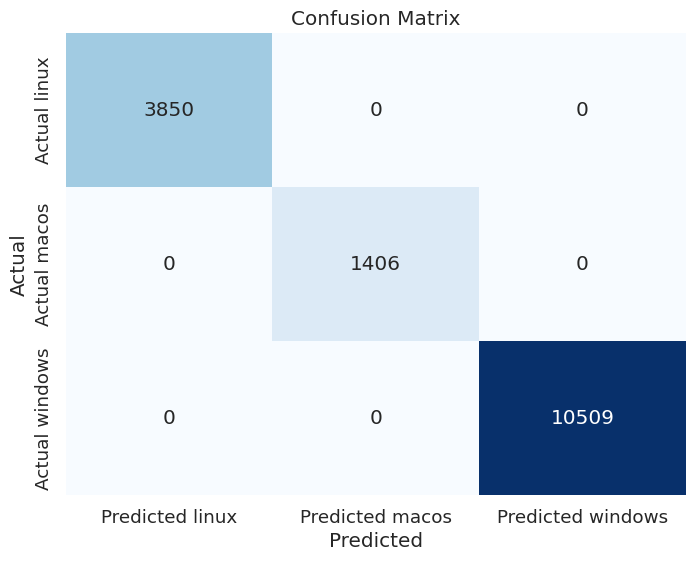

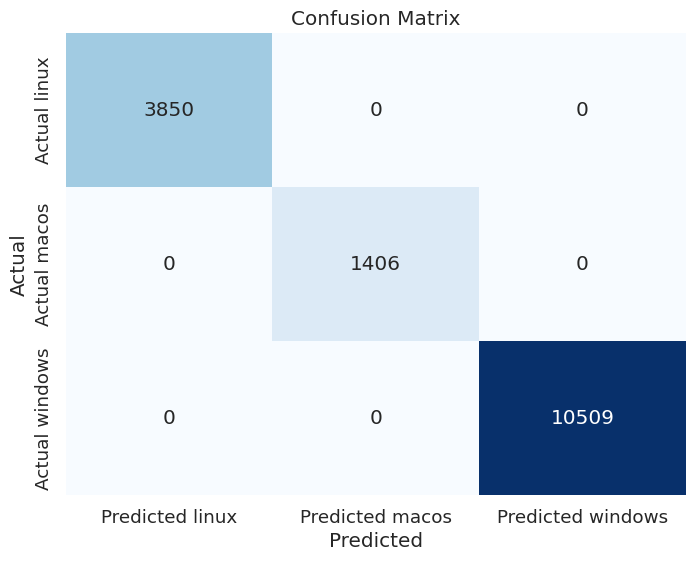

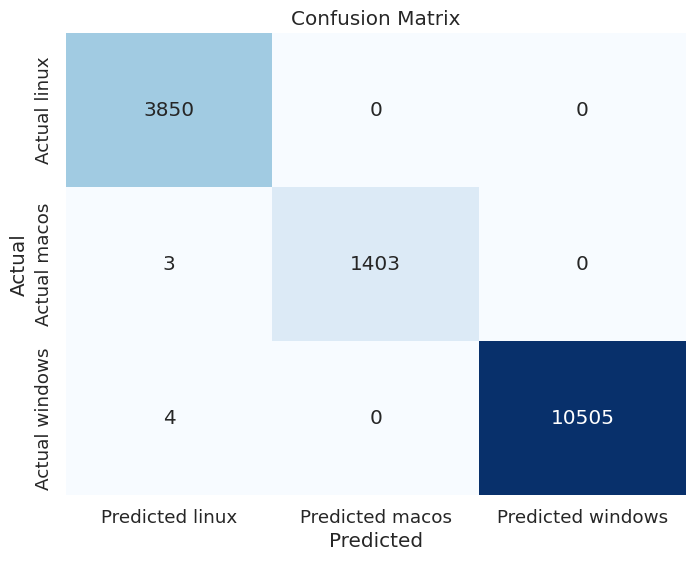

In [ ]:
# Performing model training with TCP features except tcp.options.syn
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Random Forest Classifier
rf_classifier_tcp = RandomForestClassifier()
rf_classifier_tcp.fit(X_train_tcp_selected, y_train)
rf_predictions_tcp = rf_classifier_tcp.predict(X_test_tcp_selected)

# Gradient Boosting Machine
gbm_classifier_tcp = GradientBoostingClassifier()
gbm_classifier_tcp.fit(X_train_tcp_selected, y_train)
gbm_predictions_tcp = gbm_classifier_tcp.predict(X_test_tcp_selected)

# Support Vector Machine
svm_classifier_tcp = SVC()
svm_classifier_tcp.fit(X_train_tcp_selected, y_train)
svm_predictions_tcp = svm_classifier_tcp.predict(X_test_tcp_selected)

# Evaluation Metrics
def evaluate_model(predictions, model_name):
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')
    confusion = confusion_matrix(y_test, predictions)

    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:\n", confusion)
    print("\n")



    #Store performance
    graph_data['corr_features'] = [accuracy, precision, recall, f1]

    #Create heatmap for confusion matrix
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)  # Adjust the font size for clarity
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted linux', 'Predicted macos', 'Predicted windows'],
            yticklabels=['Actual linux', 'Actual macos', 'Actual windows'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
evaluate_model(rf_predictions_tcp, "Random Forest Classifier")
evaluate_model(gbm_predictions_tcp, "Gradient Boosting Machine")
evaluate_model(svm_predictions_tcp, "Support Vector Machine")

The models are still impressive regardless, and that's because of the models we used are very good and complex models

####**Now, let's train using only TLS features**

In [ ]:
# Select all TLS features
# Initialise an empty list to store the selected feature names
tls_selected_features = []

# Iterate through the column names and select those with 'tls' in their names
for column_name in X_train.columns:
    if 'tls' in column_name:
        tls_selected_features.append(column_name)

# Now, 'tls_selected_features' contains the names of features with 'tls' in their names
tls_selected_features

['tls.handshake.ciphersuite.ch', 'tls.record.version.ch', 'tls.ja3sCnt']

In [ ]:
X_train_tls_selected = X_train[tls_selected_features]
X_test_tls_selected = X_test[tls_selected_features]

--- Random Forest Classifier ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[ 3850     0     0]
 [    0  1406     0]
 [    0     0 10509]]


--- Support Vector Machine ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[ 3850     0     0]
 [    0  1406     0]
 [    0     0 10509]]


--- Gradient Boosting Machine ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[ 3850     0     0]
 [    0  1406     0]
 [    0     0 10509]]




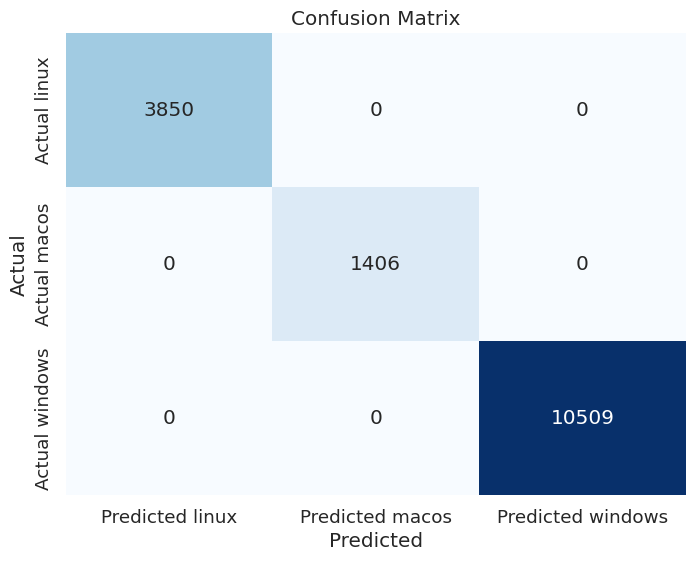

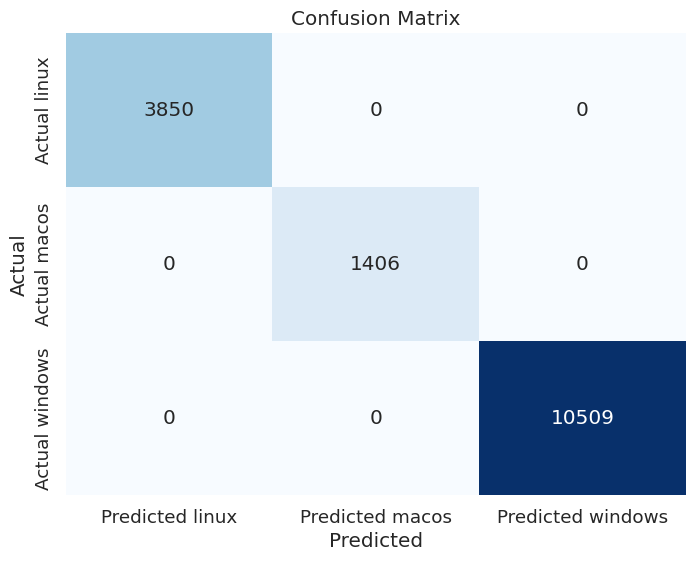

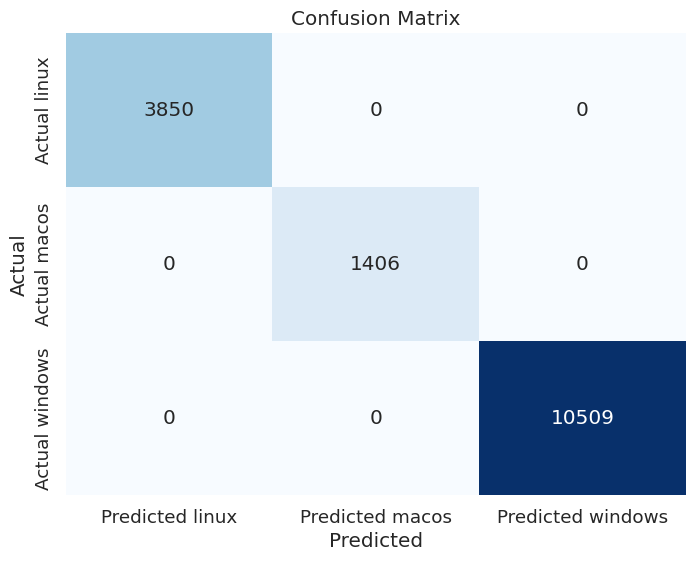

In [ ]:
# Performing model training with Tls features
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Random Forest Classifier
rf_classifier_tls = RandomForestClassifier()
rf_classifier_tls.fit(X_train_tls_selected, y_train)
rf_predictions_tls = rf_classifier_tls.predict(X_test_tls_selected)

# Gradient Boosting Machine
gbm_classifier_tls = GradientBoostingClassifier()
gbm_classifier_tls.fit(X_train_tls_selected, y_train)
gbm_predictions_tls = gbm_classifier_tls.predict(X_test_tls_selected)

# Support Vector Machine
svm_classifier_tls = SVC()
svm_classifier_tls.fit(X_train_tls_selected, y_train)
svm_predictions_tls = svm_classifier_tls.predict(X_test_tls_selected)

# Evaluation Metrics
def evaluate_model(predictions, model_name):
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')
    confusion = confusion_matrix(y_test, predictions)

    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:\n", confusion)
    print("\n")


    #Store performance
    graph_data['tls_features'] = [accuracy, precision, recall, f1]
    #Create heatmap for confusion matrix
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)  # Adjust the font size for clarity
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted linux', 'Predicted macos', 'Predicted windows'],
            yticklabels=['Actual linux', 'Actual macos', 'Actual windows'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')

evaluate_model(rf_predictions, "Random Forest Classifier")
evaluate_model(svm_predictions, "Support Vector Machine")
evaluate_model(gbm_predictions, "Gradient Boosting Machine")

The performance of our models when trained using Tls based features isn't as perfect as when we use TCP based features(which are highly correlated with the label) however this performance is workable and good enough.

Comparing both sets of models using a bar chat we have

####Checking the label of our predictions

In [ ]:
svm_predictions

array([2, 0, 2, ..., 2, 0, 2])

In [ ]:
label_encoder.inverse_transform(svm_predictions)

array(['windows', 'linux', 'windows', ..., 'windows', 'linux', 'windows'],
      dtype=object)

In [ ]:
gbm_predictions

array([2, 0, 2, ..., 2, 0, 2])

In [ ]:
label_encoder.inverse_transform(gbm_predictions)

array(['windows', 'linux', 'windows', ..., 'windows', 'linux', 'windows'],
      dtype=object)

In [ ]:
rf_predictions

array([2, 0, 2, ..., 2, 0, 2])

In [ ]:
label_encoder.inverse_transform(rf_predictions)

array(['windows', 'linux', 'windows', ..., 'windows', 'linux', 'windows'],
      dtype=object)

In [ ]:
label_encoder.classes_

array(['linux', 'macos', 'windows'], dtype=object)

In [ ]:
# Check to see the mapping of the classes and the number assigned
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(class_mapping)

{'linux': 0, 'macos': 1, 'windows': 2}


###Results Visualisation

In [ ]:
# View dictionary containing performances
graph_data

{'corr_features': [0.9995559784332382,
  0.9995567842800018,
  0.9995559784332382,
  0.999556054312469],
 'pca_features': [0.9597843323818586,
  0.9654704905598027,
  0.9597843323818586,
  0.955460769451204],
 'corr_features_no_tls.ja3': [1.0, 1.0, 1.0, 1.0],
 'pca_features_no_tls.ja3': [0.9998097050428164,
  0.9998098532091468,
  0.9998097050428164,
  0.9998097285160302],
 'no_corr_features': [0.8896923564858864,
  0.8886848684154167,
  0.8896923564858864,
  0.8890850634528219],
 'rfe_features': [1.0, 1.0, 1.0, 1.0],
 'reduce_model_complexity': [0.9613066920393276,
  0.9634466425020887,
  0.9613066920393276,
  0.9618651664325546],
 'tcp.options.syn': [1.0, 1.0, 1.0, 1.0],
 'tls.record.version.ch': [0.2752933713923248,
  0.9200973980379735,
  0.2752933713923248,
  0.31781529860665786],
 'ip.ttl.syn': [0.9108150967332699,
  0.8454874944545578,
  0.9108150967332699,
  0.8731078841726603],
 'tcp.options.wscale.shift.syc': [1.0, 1.0, 1.0, 1.0],
 'ip.len.syn': [1.0, 1.0, 1.0, 1.0],
 'tcp.wi

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'corr_features'),
  Text(1, 0, 'pca_features'),
  Text(2, 0, 'corr_features_no_tls.ja3'),
  Text(3, 0, 'pca_features_no_tls.ja3'),
  Text(4, 0, 'no_corr_features'),
  Text(5, 0, 'rfe_features'),
  Text(6, 0, 'reduce_model_complexity'),
  Text(7, 0, 'tcp.options.syn'),
  Text(8, 0, 'tls.record.version.ch'),
  Text(9, 0, 'ip.ttl.syn'),
  Text(10, 0, 'tcp.options.wscale.shift.syc'),
  Text(11, 0, 'ip.len.syn'),
  Text(12, 0, 'tcp.window_size_value.syn'),
  Text(13, 0, 'tcp_flag_syn_ratio'),
  Text(14, 0, 'pca_no_flag_ratios'),
  Text(15, 0, 'tcp_features'),
  Text(16, 0, 'tls_features')])

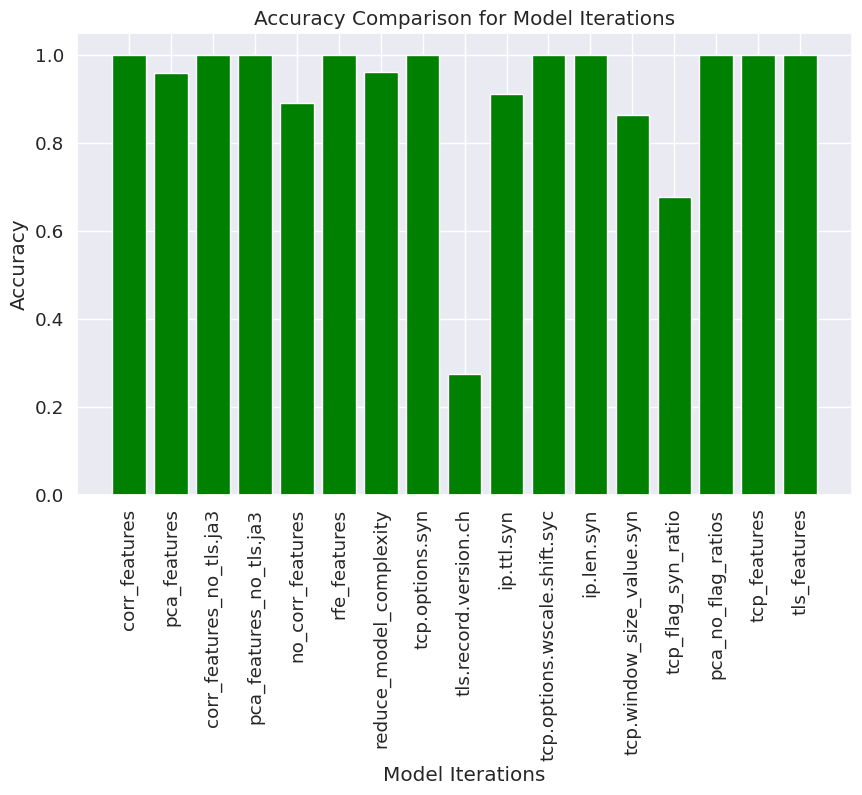

In [ ]:
# Extract Accuracy for each iteration
accuracy = [data[0] for data in graph_data.values()]

# Names of the iterations
iterations = list(graph_data.keys())

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(iterations, accuracy, color='green')
plt.xlabel('Model Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison for Model Iterations')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'corr_features'),
  Text(1, 0, 'pca_features'),
  Text(2, 0, 'corr_features_no_tls.ja3'),
  Text(3, 0, 'pca_features_no_tls.ja3'),
  Text(4, 0, 'no_corr_features'),
  Text(5, 0, 'rfe_features'),
  Text(6, 0, 'reduce_model_complexity'),
  Text(7, 0, 'tcp.options.syn'),
  Text(8, 0, 'tls.record.version.ch'),
  Text(9, 0, 'ip.ttl.syn'),
  Text(10, 0, 'tcp.options.wscale.shift.syc'),
  Text(11, 0, 'ip.len.syn'),
  Text(12, 0, 'tcp.window_size_value.syn'),
  Text(13, 0, 'tcp_flag_syn_ratio'),
  Text(14, 0, 'pca_no_flag_ratios'),
  Text(15, 0, 'tcp_features'),
  Text(16, 0, 'tls_features')])

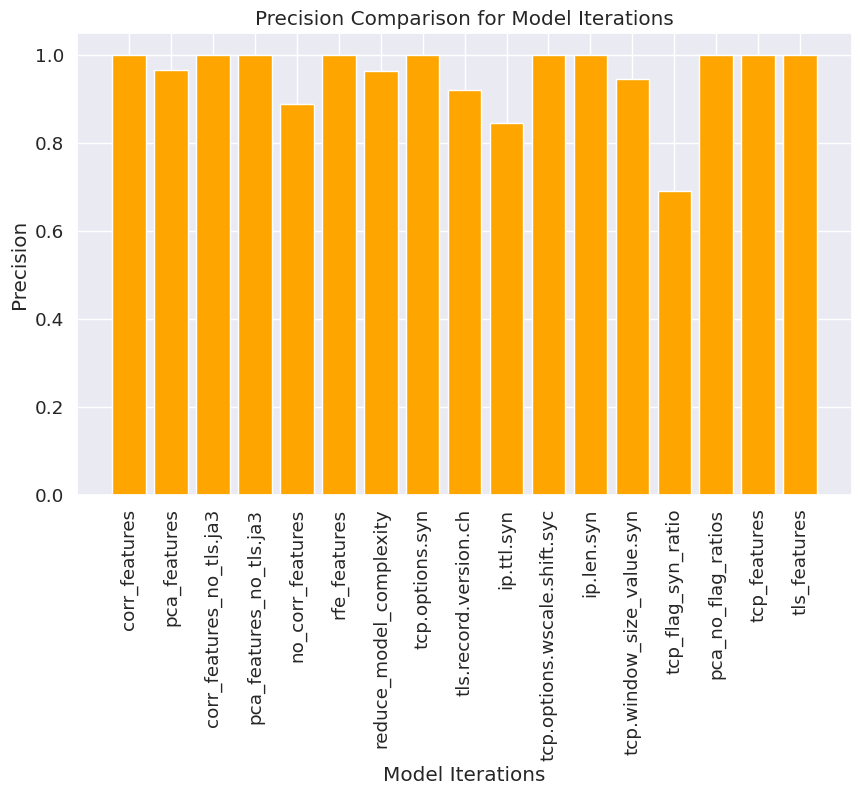

In [ ]:
# Extract Precision for each iteration
precision = [data[1] for data in graph_data.values()]

# Names of the iterations
iterations = list(graph_data.keys())

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(iterations, precision, color='orange')
plt.xlabel('Model Iterations')
plt.ylabel('Precision')
plt.title('Precision Comparison for Model Iterations')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'corr_features'),
  Text(1, 0, 'pca_features'),
  Text(2, 0, 'corr_features_no_tls.ja3'),
  Text(3, 0, 'pca_features_no_tls.ja3'),
  Text(4, 0, 'no_corr_features'),
  Text(5, 0, 'rfe_features'),
  Text(6, 0, 'reduce_model_complexity'),
  Text(7, 0, 'tcp.options.syn'),
  Text(8, 0, 'tls.record.version.ch'),
  Text(9, 0, 'ip.ttl.syn'),
  Text(10, 0, 'tcp.options.wscale.shift.syc'),
  Text(11, 0, 'ip.len.syn'),
  Text(12, 0, 'tcp.window_size_value.syn'),
  Text(13, 0, 'tcp_flag_syn_ratio'),
  Text(14, 0, 'pca_no_flag_ratios'),
  Text(15, 0, 'tcp_features'),
  Text(16, 0, 'tls_features')])

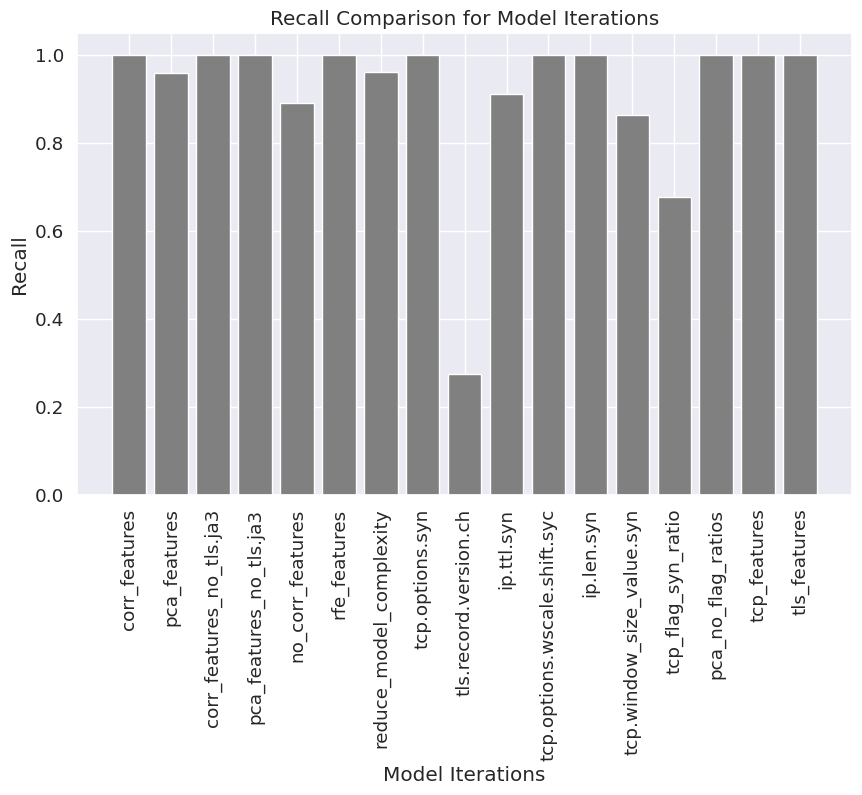

In [ ]:
# Extract Recall for each iteration
recall = [data[2] for data in graph_data.values()]

# Names of the iterations
iterations = list(graph_data.keys())

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(iterations, recall, color='grey')
plt.xlabel('Model Iterations')
plt.ylabel('Recall')
plt.title('Recall Comparison for Model Iterations')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'corr_features'),
  Text(1, 0, 'pca_features'),
  Text(2, 0, 'corr_features_no_tls.ja3'),
  Text(3, 0, 'pca_features_no_tls.ja3'),
  Text(4, 0, 'no_corr_features'),
  Text(5, 0, 'rfe_features'),
  Text(6, 0, 'reduce_model_complexity'),
  Text(7, 0, 'tcp.options.syn'),
  Text(8, 0, 'tls.record.version.ch'),
  Text(9, 0, 'ip.ttl.syn'),
  Text(10, 0, 'tcp.options.wscale.shift.syc'),
  Text(11, 0, 'ip.len.syn'),
  Text(12, 0, 'tcp.window_size_value.syn'),
  Text(13, 0, 'tcp_flag_syn_ratio'),
  Text(14, 0, 'pca_no_flag_ratios'),
  Text(15, 0, 'tcp_features'),
  Text(16, 0, 'tls_features')])

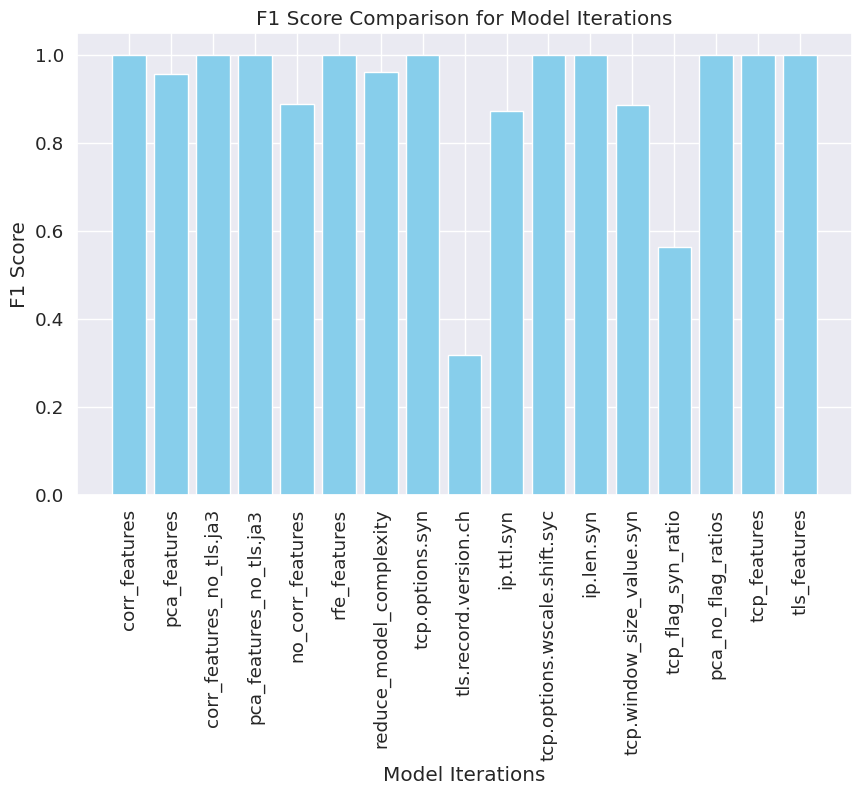

In [ ]:
# Extract F1 scores for each iteration
f1_scores = [data[3] for data in graph_data.values()]

# Names of the iterations
iterations = list(graph_data.keys())

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(iterations, f1_scores, color='skyblue')
plt.xlabel('Model Iterations')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison for Model Iterations')
plt.xticks(rotation=90)